В цьому ноутбуці ми проведемо дослідницький аналіз даних про історичні платежі по кредитам клієнтами.

[Опис колонок в даних тут.](https://drive.google.com/file/d/1Yp2aOdC33QFAVfTyxav_gKGwi4M9VN1Z/view?usp=sharing)

Цільова змінна TARGET тут має наступне значення: 1 – клієнт із труднощами з оплатою: він/вона прострочив платіж понад X днів принаймні одного з перших Y платежів кредиту в нашій вибірці, 0 – усі інші випадки

Задача - виявити, яким клієнтам видавати кредит, а яким - не варто, бо вони з високою імовірністю його не повернуть.

Дані взяті з [Kaggle](https://www.kaggle.com/datasets/gauravduttakiit/loan-defaulter). Прошу використовувати саме ті, які надані в нашому курсі, аби нам бути впевненими, що ми точно працюємо з одними і тими ж даними.

# Імпорт необхідних бібліотек

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.rows',130)
pd.set_option('display.max.columns',130)
pd.set_option('float_format', '{:.2f}'.format)

# Імпорт даних

Вмонтуємо наш диск, якщо Ви працюєте в Google Colab. Якщо працюєте локально, пропустіть наступну клітинку.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Знайдемо, де лежать наші файли з даними. В мене вони знаходяться тут:

In [5]:
!ls '/content/drive/MyDrive/Data Science/application_data.csv.zip'

'/content/drive/MyDrive/Data Science/application_data.csv.zip'


Якщо треба зчитати опис, то робимо це аналогічно.

In [6]:
descr = pd.read_csv("/content/drive/MyDrive/Data Science/application_data.csv.zip")

Зчитуємо дані.

In [7]:
df = pd.read_csv("/content/drive/MyDrive/Data Science/application_data.csv.zip")

In [8]:
# Огляд декількох записів з датафрейму
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0         202500.00   406597.50     24700.50   
1               N             0         270000.00  1293502.50     35698.50   
2               Y             0          67500.00   135000.00      6750.00   
3               Y             0         135000.00   312682.50     29686.50   
4               Y             0         121500.00   513000.00     21865.50   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        351000.00   Unaccompanied          Working   
1       1129500.00          Family    State servant   
2        135000.00   Unaccompanied          Working   
3        297000.00   Unaccompanied          Working   
4        513000.00   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                        0.02       -9461           -637           -3648.00   
1                        0.00      -16765          -1188           -1186.00   
2                        0.01      -19046           -225           -4260.00   
3                        0.01      -19005          -3039           -9833.00   
4                        0.03      -19932          -3038           -4311.00   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531        26.00           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers             1.00   
1                 1           1           0      Core staff             2.00   
2                 1           1           0        Laborers             1.00   
3                 1           0           0        Laborers             2.00   
4                 1           0           0      Core staff             1.00   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

# Перевірка структури даних

In [9]:
df.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [10]:
df.shape

(307511, 122)

Маємо ~307k рядків та 122 колонки.

## Статистичний звіт для числових змінних

In [11]:
df.describe()

SK_ID_CURR    TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
count   307511.00 307511.00     307511.00         307511.00   307511.00   
mean    278180.52      0.08          0.42         168797.92   599026.00   
std     102790.18      0.27          0.72         237123.15   402490.78   
min     100002.00      0.00          0.00          25650.00    45000.00   
25%     189145.50      0.00          0.00         112500.00   270000.00   
50%     278202.00      0.00          0.00         147150.00   513531.00   
75%     367142.50      0.00          1.00         202500.00   808650.00   
max     456255.00      1.00         19.00      117000000.00  4050000.00   

       AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
count    307499.00        307233.00                   307511.00   307511.00   
mean      27108.57        538396.21                        0.02   -16037.00   
std       14493.74        369446.46                        0.01     4363.99   
min        1615.50         40500.00                        0.00   -25229.00   
25%       16524.00        238500.00                        0.01   -19682.00   
50%       24903.00        450000.00                        0.02   -15750.00   
75%       34596.00        679500.00                        0.03   -12413.00   
max      258025.50       4050000.00                        0.07    -7489.00   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
count      307511.00          307511.00        307511.00    104582.00   
mean        63815.05           -4986.12         -2994.20        12.06   
std        141275.77            3522.89          1509.45        11.94   
min        -17912.00          -24672.00         -7197.00         0.00   
25%         -2760.00           -7479.50         -4299.00         5.00   
50%         -1213.00           -4504.00         -3254.00         9.00   
75%          -289.00           -2010.00         -1720.00        15.00   
max        365243.00               0.00             0.00        91.00   

       FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
count   307511.00       307511.00        307511.00         307511.00   
mean         1.00            0.82             0.20              1.00   
std          0.00            0.38             0.40              0.04   
min          0.00            0.00             0.00              0.00   
25%          1.00            1.00             0.00              1.00   
50%          1.00            1.00             0.00              1.00   
75%          1.00            1.00             0.00              1.00   
max          1.00            1.00             1.00              1.00   

       FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count   307511.00   307511.00        307509.00             307511.00   
mean         0.28        0.06             2.15                  2.05   
std          0.45        0.23             0.91                  0.51   
min          0.00        0.00             1.00                  1.00   
25%          0.00        0.00             2.00                  2.00   
50%          0.00        0.00             2.00                  2.00   
75%          1.00        0.00             3.00                  2.00   
max          1.00        1.00            20.00                  3.00   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                    307511.00                307511.00   
mean                          2.03                    12.06   
std                           0.50                     3.27   
min                           1.00                     0.00   
25%                           2.00                    10.00   
50%                           2.00                    12.00   
75%                           2.00                    14.00   
max                           3.00                    23.00   

       REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
count                   307511

# Аналіз категоріальних змінних

In [12]:
df.select_dtypes(include = "object").columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [13]:
# Перевірка кількості категоріальних змінних
len(df.select_dtypes(include = "object").columns)

16

Дані містять 16 `categorical` змінних

# Аналіз числових змінних

In [14]:
number_df = df.select_dtypes(include="number")

In [15]:
number_df.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)

In [16]:
# Перевірка кількості числових змінних
len(number_df.columns)

106

Дані міятять 106 `numerical` змінних

In [17]:
number_df.head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100002       1             0         202500.00   406597.50   
1      100003       0             0         270000.00  1293502.50   
2      100004       0             0          67500.00   135000.00   
3      100006       0             0         135000.00   312682.50   
4      100007       0             0         121500.00   513000.00   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0     24700.50        351000.00                        0.02       -9461   
1     35698.50       1129500.00                        0.00      -16765   
2      6750.00        135000.00                        0.01      -19046   
3     29686.50        297000.00                        0.01      -19005   
4     21865.50        513000.00                        0.03      -19932   

   DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0           -637           -3648.00            -2120          NaN           1   
1          -1188           -1186.00             -291          NaN           1   
2           -225           -4260.00            -2531        26.00           1   
3          -3039           -9833.00            -2437          NaN           1   
4          -3038           -4311.00            -3458          NaN           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   
3               1                0                 1           0           0   
4               1                0                 1           0           0   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0             1.00                     2                            2   
1             2.00                     1                            1   
2             1.00                     2                            2   
3             2.00                     2                            2   
4             1.00                     2                            2   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0          0.08          0.26          0.14            0.02              0.04   
1          0.31          0.62           NaN            0.10              0.05   
2           NaN          0.56          0.73             NaN               NaN   
3           NaN          0.65           NaN             NaN               NaN   
4           NaN          0.32           NaN             NaN               NaN   

   YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COM

# Робота з некоректними типами даних

Перевірка, чи немає у нас стовпця з неправильним типом даних

In [18]:
df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


Дивлячись на дані та відповідні їм типи даних, можна змінити тип стовпчика SKU.

In [19]:
df['SK_ID_CURR'] = df['SK_ID_CURR'].astype("str")

Також ми можемо змінити всі стовпці `flag` на тип даних, який є більш економний для зберігання.

Ось скільки пам'яті в Мб займають наші дані зараз.

In [20]:
df.memory_usage().sum()/1024/1024

286.2270965576172

In [21]:
'flag' in 'SK_ID_CURR'.lower()

False

In [22]:
flag_cols = ['flag' in col.lower() for col in df.columns]

In [23]:
df[df.columns[flag_cols]].head()

FLAG_OWN_CAR FLAG_OWN_REALTY  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            N               Y           1               1                0   
1            N               N           1               1                0   
2            Y               Y           1               1                1   
3            N               Y           1               1                0   
4            N               Y           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
0                 1           1           0                0                1   
1                 1           1           0                0                1   
2                 1           1           0                0                0   
3                 1           0           0                0                1   
4                 1           0           0                0                0   

   FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
0                0                0                 0                 0   
1                0                0                 0                 0   
2                0                0                 0                 0   
3                0                0                 0                 0   
4                1                0                 0                 0   

   FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  
0                 0                 0  
1                 0                 0  
2                 0                 0  
3                 0                 0  
4                 0                 0

In [24]:
df[df.columns[flag_cols]].nunique()

FLAG_OWN_CAR        2
FLAG_OWN_REALTY     2
FLAG_MOBIL          2
FLAG_EMP_PHONE      2
FLAG_WORK_PHONE     2
FLAG_CONT_MOBILE    2
FLAG_PHONE          2
FLAG_EMAIL          2
FLAG_DOCUMENT_2     2
FLAG_DOCUMENT_3     2
FLAG_DOCUMENT_4     2
FLAG_DOCUMENT_5     2
FLAG_DOCUMENT_6     2
FLAG_DOCUMENT_7     2
FLAG_DOCUMENT_8     2
FLAG_DOCUMENT_9     2
FLAG_DOCUMENT_10    2
FLAG_DOCUMENT_11    2
FLAG_DOCUMENT_12    2
FLAG_DOCUMENT_13    2
FLAG_DOCUMENT_14    2
FLAG_DOCUMENT_15    2
FLAG_DOCUMENT_16    2
FLAG_DOCUMENT_17    2
FLAG_DOCUMENT_18    2
FLAG_DOCUMENT_19    2
FLAG_DOCUMENT_20    2
FLAG_DOCUMENT_21    2
dtype: int64

Типи даних в pandas взяті з numpy, і ось тут список всіх типів даних в numpy:

https://numpy.org/doc/stable/user/basics.types.html

Кожен тип даних займає певну кількість байт у пам'яті. Давайте з'ясуємо, скільки займає 1 тип int8 та 1 тип int64 і скільки пам'яті ми заощадимо, якщо змінимо тип.

In [25]:
import numpy as np
from sys import getsizeof

In [26]:
getsizeof(np.int64(1))

32

In [27]:
getsizeof(np.int8(1))

25

In [28]:
7 * df.shape[0] * sum(flag_cols) / 1024 / 1024

57.48000717163086

Отже, ми можемо потенційно заощадити 57 Мб пам'яті! І трансформувати наш фрейм даних буде простіше. Давайте змінимо тип.


In [29]:
str_flag_cols = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

In [30]:
for col in str_flag_cols:
  df[col] = np.where(df[col]=='Y', 1, 0)

In [31]:
df[str_flag_cols].nunique()

FLAG_OWN_CAR       2
FLAG_OWN_REALTY    2
dtype: int64

In [32]:
df.columns[flag_cols]

Index(['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'],
      dtype='object')

In [33]:
df[df.columns[flag_cols]] = df[df.columns[flag_cols]].astype('int8')

In [34]:
df.memory_usage().sum()/1024/1024

228.74708938598633

# Робота з пропущеними значеннями

Найпростіше емпіричне правило для опрацювання пропущених значень: якщо пропущених значень більше за 40% - видаляємо колонку, якщо менше за 40% - аналізуємо, як можна заповнити і чи треба.

Зазвичай, якщо відсоток пропущених даних більший за 10 і немає чіткої (яка значно виділяється) моди (найчастішого) значення в даних, то лишаємо дані як є до використання методів машинного навчання. Далі якщо метод вимагає заповення пропущених значень, можемо експериментувати із заповеннями. Також хорошою практикою є створити окрему колонку-флаг (0/1), яка вказує, де були пропущені значення - це буде додаткова ознака для моделі.


Перевіримо, чи немає null-значень в нашому наборі даних

In [35]:
df.isnull().values.any()

True

Порахуємо загальну кількість null-значень в наборі даних

In [36]:
df.isnull().values.sum()

9152465

Сформуємо список із стовпців з null-значеннями

In [37]:
df.columns[df.isnull().any()]

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMI

In [38]:
len(df.columns[df.isnull().any()])

67

Усього `67` стовпців мають одне або більше NULL-значень в даних

## Кількість та відсоток пропущених значень у стовпцях

In [39]:
null_count = df.isnull().sum()
null_percentage = round((df.isnull().sum()/df.shape[0])*100, 2)

In [40]:
df.shape[0]

307511

In [41]:
null_df = pd.DataFrame({'column_name' : df.columns,'null_count' : null_count,'null_percentage': null_percentage})
null_df.reset_index(drop = True, inplace = True)

In [42]:
null_df.sort_values(by = 'null_percentage', ascending = False)

column_name  null_count  null_percentage
76                COMMONAREA_MEDI      214865            69.87
48                 COMMONAREA_AVG      214865            69.87
62                COMMONAREA_MODE      214865            69.87
70       NONLIVINGAPARTMENTS_MODE      213514            69.43
56        NONLIVINGAPARTMENTS_AVG      213514            69.43
84       NONLIVINGAPARTMENTS_MEDI      213514            69.43
86             FONDKAPREMONT_MODE      210295            68.39
68          LIVINGAPARTMENTS_MODE      210199            68.35
54           LIVINGAPARTMENTS_AVG      210199            68.35
82          LIVINGAPARTMENTS_MEDI      210199            68.35
52                  FLOORSMIN_AVG      208642            67.85
66                 FLOORSMIN_MODE      208642            67.85
80                 FLOORSMIN_MEDI      208642            67.85
75               YEARS_BUILD_MEDI      204488            66.50
61               YEARS_BUILD_MODE      204488            66.50
47                YEARS_BUILD_AVG      204488            66.50
21                    OWN_CAR_AGE      202929            65.99
81                  LANDAREA_MEDI      182590            59.38
67                  LANDAREA_MODE      182590            59.38
53                   LANDAREA_AVG      182590            59.38
73              BASEMENTAREA_MEDI      179943            58.52
45               BASEMENTAREA_AVG      179943            58.52
59              BASEMENTAREA_MODE      179943            58.52
41                   EXT_SOURCE_1      173378            56.38
71             NONLIVINGAREA_MODE      169682            55.18
57              NONLIVINGAREA_AVG      169682            55.18
85             NONLIVINGAREA_MEDI      169682            55.18
77                 ELEVATORS_MEDI      163891            53.30
49                  ELEVATORS_AVG      163891            53.30
63                 ELEVATORS_MODE      163891            53.30
89             WALLSMATERIAL_MODE      156341            50.84
72                APARTMENTS_MEDI      156061            50.75
44                 APARTMENTS_AVG      156061            50.75
58                APARTMENTS_MODE      156061            50.75
78                 ENTRANCES_MEDI      154828            50.35
50                  ENTRANCES_AVG      154828            50.35
64                 ENTRANCES_MODE      154828            50.35
55                 LIVINGAREA_AVG      154350            50.19
69                LIVINGAREA_MODE      154350            50.19
83                LIVINGAREA_MEDI      154350            50.19
87                 HOUSETYPE_MODE      154297            50.18
65                 FLOORSMAX_MODE      153020            49.76
79                 FLOORSMAX_MEDI      153020            49.76
51                  FLOORSMAX_AVG      153020            49.76
60   YEARS_BEGINEXPLUATATION_MODE      150007            48.78
74   YEARS_BEGINEXPLUATATION_MEDI      150007            48.78
46    YEARS_BEGINEXPLUATATION_AVG      150007            48.78
88                 TOTALAREA_MODE      148431            48.27
90            EMERGENCYSTATE_MODE      145755            47.40
28                OCCUPATION_TYPE       96391            31.35
43                   EXT_SOURCE_3       60965            19.83
116    AMT_REQ_CREDIT_BUREAU_HOUR       41519            13.50
117     AMT_REQ_CREDIT_BUREAU_DAY       41519            13.50
118    AMT_REQ_CREDIT_BUREAU_WEEK       41519            13.50
119     AMT_REQ_CREDIT_BUREAU_MON       41519            13.50
120     AMT_REQ_CREDIT_BUREAU_QRT       41519            13.50
121    AMT_REQ_CREDIT_BUREAU_YEAR       41519            13.50
11                NAME_TYPE_SUITE        1292             0.42
92       DEF_30_CNT_SOCIAL_CIRCLE        1021             0.33
91       OBS_30_CNT_SOCIAL_CIRCLE        1021             0.33
93       OBS_60_CNT_SOCIAL_CIRCLE        1021             0.33
94       DEF_60_CNT_SOCIAL_CIRCLE        1021             0.33
42                   EXT_SOURCE_2         660        

## Видалення стовпців з NULL значеннями > 40%

Сформуємо список стовпців з NULL значеннями > 40% у список. Ми видалимо ці стовпці з датафрейму, оскільки в них занадто багато пропущених значень.

In [43]:
columns_to_be_deleted = null_df[null_df['null_percentage'] > 40].column_name.to_list()

In [44]:
len(columns_to_be_deleted)

49

Всього потрібно видалити `49` стовпців. Видалення їх з основного датафрейму **`df`**

In [45]:
df.drop(columns = columns_to_be_deleted, inplace = True)

Перевірка підрахунку стовпців після видалення. Мало б залишитись лише `73` стовпці

In [46]:
df.shape

(307511, 73)

## Перевірка стовпців з NULL значеннями < 40%

Створення датафрейму `null_df_under40` зі стовпцями, де відсоток пропущених значеннь менше 40%

In [47]:
null_df_under40 = null_df[null_df['null_percentage'] < 40]

In [48]:
null_df_under40.sort_values(by = 'null_percentage', ascending = False)

column_name  null_count  null_percentage
28               OCCUPATION_TYPE       96391            31.35
43                  EXT_SOURCE_3       60965            19.83
121   AMT_REQ_CREDIT_BUREAU_YEAR       41519            13.50
120    AMT_REQ_CREDIT_BUREAU_QRT       41519            13.50
119    AMT_REQ_CREDIT_BUREAU_MON       41519            13.50
118   AMT_REQ_CREDIT_BUREAU_WEEK       41519            13.50
117    AMT_REQ_CREDIT_BUREAU_DAY       41519            13.50
116   AMT_REQ_CREDIT_BUREAU_HOUR       41519            13.50
11               NAME_TYPE_SUITE        1292             0.42
91      OBS_30_CNT_SOCIAL_CIRCLE        1021             0.33
92      DEF_30_CNT_SOCIAL_CIRCLE        1021             0.33
93      OBS_60_CNT_SOCIAL_CIRCLE        1021             0.33
94      DEF_60_CNT_SOCIAL_CIRCLE        1021             0.33
42                  EXT_SOURCE_2         660             0.21
10               AMT_GOODS_PRICE         278             0.09
101              FLAG_DOCUMENT_7           0             0.00
95        DAYS_LAST_PHONE_CHANGE           1             0.00
96               FLAG_DOCUMENT_2           0             0.00
97               FLAG_DOCUMENT_3           0             0.00
98               FLAG_DOCUMENT_4           0             0.00
99               FLAG_DOCUMENT_5           0             0.00
100              FLAG_DOCUMENT_6           0             0.00
105             FLAG_DOCUMENT_11           0             0.00
102              FLAG_DOCUMENT_8           0             0.00
103              FLAG_DOCUMENT_9           0             0.00
104             FLAG_DOCUMENT_10           0             0.00
39       LIVE_CITY_NOT_WORK_CITY           0             0.00
106             FLAG_DOCUMENT_12           0             0.00
107             FLAG_DOCUMENT_13           0             0.00
108             FLAG_DOCUMENT_14           0             0.00
109             FLAG_DOCUMENT_15           0             0.00
110             FLAG_DOCUMENT_16           0             0.00
111             FLAG_DOCUMENT_17           0             0.00
112             FLAG_DOCUMENT_18           0             0.00
113             FLAG_DOCUMENT_19           0             0.00
114             FLAG_DOCUMENT_20           0             0.00
115             FLAG_DOCUMENT_21           0             0.00
40             ORGANIZATION_TYPE           0             0.00
0                     SK_ID_CURR           0             0.00
38        REG_CITY_NOT_WORK_CITY           0             0.00
9                    AMT_ANNUITY          12             0.00
17                    DAYS_BIRTH           0             0.00
16    REGION_POPULATION_RELATIVE           0             0.00
15             NAME_HOUSING_TYPE           0             0.00
14            NAME_FAMILY_STATUS           0             0.00
13           NAME_EDUCATION_TYPE           0             0.00
12              NAME_INCOME_TYPE           0             0.00
8                     AMT_CREDIT           0             0.00
1                         TARGET           0             0.00
7               AMT_INCOME_TOTAL           0             0.00
6                   CNT_CHILDREN           0             0.00
5                FLAG_OWN_REALTY           0             0.00
4                   FLAG_OWN_CAR           0             0.00
3                    CODE_GENDER           0             0.00
2             NAME_CONTRACT_TYPE           0             0.00
18                 DAYS_EMPLOYED           0             0.00
19             DAYS_REGISTRATION           0             0.00
20               DAYS_ID_PUBLISH           0             0.00
22                    FLAG_MOBIL           0             0.00
23                FLAG_EMP_PHONE           0             0.00
24               FLAG_WORK_PHONE           0             0.00
25              FLAG_CONT_MOBILE           0             0.00
26                    FLAG_PHONE           0             0.00
27                    FLAG_EMAIL           0         

Опрацюємо кожну з колонок.

### Аналіз стовпця `OCCUPATION_TYPE`

- нульові значення = 31.35%

In [49]:
df['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

Заміна NULL-значень на категорією `Unknown`

In [50]:
df['OCCUPATION_TYPE'].fillna(value = 'Unknown', inplace = True)

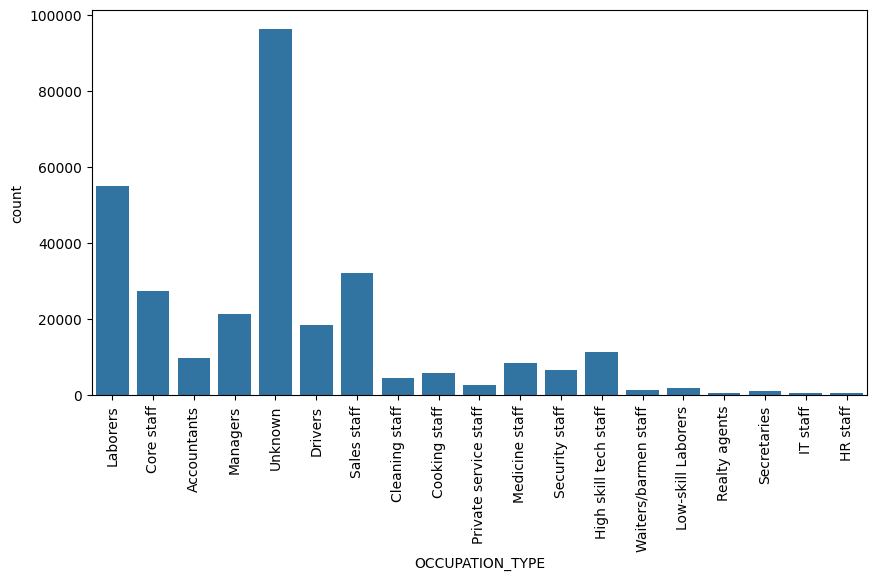

In [51]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = "OCCUPATION_TYPE")
plt.xticks(rotation = 90)
plt.show()

**Спостереження**
- Якщо поглянути на графік, то найбільшу кількість заявників на кредит мають `Laborers`
- Для імпутації краще залишити дані як є (пропущені значення становлять 31,35%) і не проводити імпутацію за якоюсь константою, як-от мода або мін/макс медіана, якщо це числовий стовпчик, оскільки це може викривити дані в подальших розрахунках.

Існує також можливість імпутації за допомогою більш "розумних" методів, але ми вивчимо їх пізніше, а зараз ми робимо те, що можемо, за допомогою деяких найпростіших перетворень.

### Аналіз стовпця `EXT_SOURCE_3`

- пропущені значення = 19.83%

In [52]:
df.EXT_SOURCE_3.value_counts().head()

EXT_SOURCE_3
0.75    1460
0.71    1315
0.69    1276
0.67    1191
0.65    1154
Name: count, dtype: int64

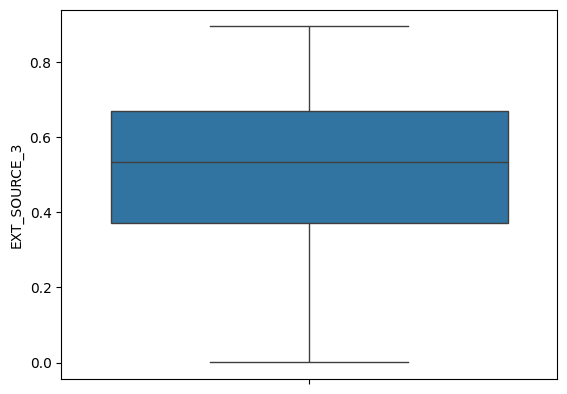

In [53]:
sns.boxplot(df.EXT_SOURCE_3)
plt.show()

Отримання процентильних значень для `EXT_SOURCE_3`

In [54]:
df.EXT_SOURCE_3.quantile(q = [0.25,0.5,0.75,1])

0.25   0.37
0.50   0.54
0.75   0.67
1.00   0.90
Name: EXT_SOURCE_3, dtype: float64

Найбільш повторюване значення в `EXT_SOURCE_3

In [55]:
df.EXT_SOURCE_3.mode()[0]

0.746300213050371

Перевірка середнього значення `EXT_SOURCE_3`

In [56]:
df.EXT_SOURCE_3.mean()

0.5108529061799658

**Спостереження**
-  Дивлячись на діагараму розмаху, медіана становить 0,535276
-  Найчастіше повторюване значення - 0,74630
-  Середнє значення - 0,51085
-  Хоча середнє та медіана є ближчими і можуть бути використані для імплікації, оскільки відсутнє відсоткове значення є більшим (19,83%), краще залишити дані як є і не проводити імплікації. Якщо метод вимагає імплікації, ми можемо імплікувати дані за допомогою медіани і створити ще один стовпчик, в якому буде позначено, які значення були імпліковані.

# ДЗ 1. Аналіз стовпців `AMT_REQ_CREDIT_BUREAU` з пропущеними значеннями

Виведіть середнє, моду, медіану та відсоток відсутніх даних для настуних колонок:

-  `AMT_REQ_CREDIT_BUREAU_YEAR`
-	`AMT_REQ_CREDIT_BUREAU_QRT`
-	`AMT_REQ_CREDIT_BUREAU_MON`
-	`AMT_REQ_CREDIT_BUREAU_WEEK`
-	`AMT_REQ_CREDIT_BUREAU_DAY`
-	`AMT_REQ_CREDIT_BUREAU_HOUR`

На основі виведених даних напишіть висновок про те, чи варто заповнювати пусті значення і якщо так, то яким чином?

**Аналіз стовпця "AMT_REQ_CREDIT_BUREAU_YEAR" - 13.5% пропущених значень**

In [57]:
null_df_under40[null_df_under40.column_name=='AMT_REQ_CREDIT_BUREAU_YEAR']


column_name  null_count  null_percentage
121  AMT_REQ_CREDIT_BUREAU_YEAR       41519            13.50

In [58]:
df.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts(normalize=True)

AMT_REQ_CREDIT_BUREAU_YEAR
0.00    0.27
1.00    0.24
2.00    0.19
3.00    0.13
4.00    0.08
5.00    0.05
6.00    0.03
7.00    0.01
8.00    0.01
9.00    0.00
11.00   0.00
12.00   0.00
10.00   0.00
13.00   0.00
14.00   0.00
17.00   0.00
15.00   0.00
19.00   0.00
18.00   0.00
16.00   0.00
25.00   0.00
23.00   0.00
22.00   0.00
21.00   0.00
20.00   0.00
Name: proportion, dtype: float64

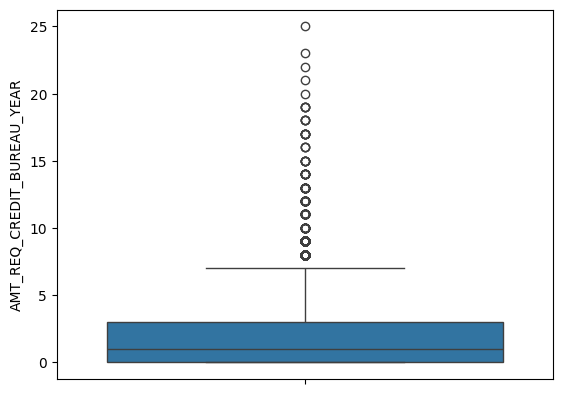

In [59]:
sns.boxplot(df.AMT_REQ_CREDIT_BUREAU_YEAR)
plt.show()

In [60]:
df.AMT_REQ_CREDIT_BUREAU_YEAR.quantile(q = [0.25,0.5,0.75,1])

0.25    0.00
0.50    1.00
0.75    3.00
1.00   25.00
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [61]:
df.AMT_REQ_CREDIT_BUREAU_YEAR.mode()

0   0.00
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [62]:
df.AMT_REQ_CREDIT_BUREAU_YEAR.mean()

1.899974435321363

Спостереження:
- медіана становить 1.00
- Найчастіше повторюване значення  0.00
- Середнє значення 1.899
- з огляду візуалізації цього стовпчика видно що є велика кількість аутлаєрів

Відсоткове значення пропущенних даних більше 10% та відсутня чітко виражена  мода ( 27% порівняно з найближчими значеннями 24% та 19%), тому краще не проводити імлікацію, а залишити дані так як є.

**Аналіз стовпчика AMT_REQ_CREDIT_BUREAU_QRT, відсоток пропущених значень 13.5%**

In [63]:
null_df_under40[null_df_under40.column_name=='AMT_REQ_CREDIT_BUREAU_QRT']

column_name  null_count  null_percentage
120  AMT_REQ_CREDIT_BUREAU_QRT       41519            13.50

In [64]:
df.AMT_REQ_CREDIT_BUREAU_QRT.value_counts()

AMT_REQ_CREDIT_BUREAU_QRT
0.00      215417
1.00       33862
2.00       14412
3.00        1717
4.00         476
5.00          64
6.00          28
8.00           7
7.00           7
261.00         1
19.00          1
Name: count, dtype: int64

In [65]:
df.AMT_REQ_CREDIT_BUREAU_QRT.value_counts(normalize=True)

AMT_REQ_CREDIT_BUREAU_QRT
0.00     0.81
1.00     0.13
2.00     0.05
3.00     0.01
4.00     0.00
5.00     0.00
6.00     0.00
8.00     0.00
7.00     0.00
261.00   0.00
19.00    0.00
Name: proportion, dtype: float64

In [66]:
df.AMT_REQ_CREDIT_BUREAU_QRT.mode()


0   0.00
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [67]:
df.AMT_REQ_CREDIT_BUREAU_QRT.median()


0.0

In [68]:
df.AMT_REQ_CREDIT_BUREAU_QRT.mean()

0.26547414959848414

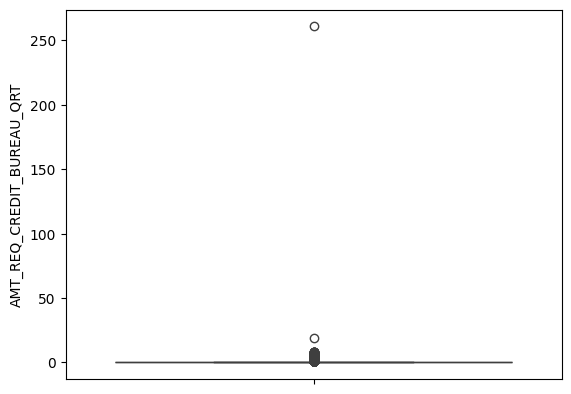

In [69]:
sns.boxplot(df.AMT_REQ_CREDIT_BUREAU_QRT)
plt.show()

**Спостереження:**
- медіана становить 0.00
- Найчастіше повторюване значення  0.00
- Середнє значення 0.265
- з огляду візуалізації цього стовпчика видно що два аутлаєра : одне значеня що, дорівнює 19, а інше 261.
-  Так як відсоткове значення пропущенних даних більше 10% дані не будуть піддаватись імпутації.
- Присутня чітко виражена мода (відсоток 81%), а також мода повністю співпадає з медіаною, тому якщо метод вимагатиме імплікації, ми можемо імплікувати дані за допомогою медіани і створити ще один стовпчик, в якому буде позначено, які значення були імпліковані.


**Аналіз стовпчика AMT_REQ_CREDIT_BUREAU_MON, відсоток пропущених значень 13.5%**

In [70]:
null_df_under40[null_df_under40.column_name=='AMT_REQ_CREDIT_BUREAU_MON']

column_name  null_count  null_percentage
119  AMT_REQ_CREDIT_BUREAU_MON       41519            13.50

In [71]:
df.AMT_REQ_CREDIT_BUREAU_MON.value_counts()

AMT_REQ_CREDIT_BUREAU_MON
0.00     222233
1.00      33147
2.00       5386
3.00       1991
4.00       1076
5.00        602
6.00        343
7.00        298
9.00        206
8.00        185
10.00       132
11.00       119
12.00        77
13.00        72
14.00        40
15.00        35
16.00        23
17.00        14
18.00         6
19.00         3
24.00         1
23.00         1
27.00         1
22.00         1
Name: count, dtype: int64

In [72]:
df.AMT_REQ_CREDIT_BUREAU_MON.value_counts(normalize=True)

AMT_REQ_CREDIT_BUREAU_MON
0.00    0.84
1.00    0.12
2.00    0.02
3.00    0.01
4.00    0.00
5.00    0.00
6.00    0.00
7.00    0.00
9.00    0.00
8.00    0.00
10.00   0.00
11.00   0.00
12.00   0.00
13.00   0.00
14.00   0.00
15.00   0.00
16.00   0.00
17.00   0.00
18.00   0.00
19.00   0.00
24.00   0.00
23.00   0.00
27.00   0.00
22.00   0.00
Name: proportion, dtype: float64

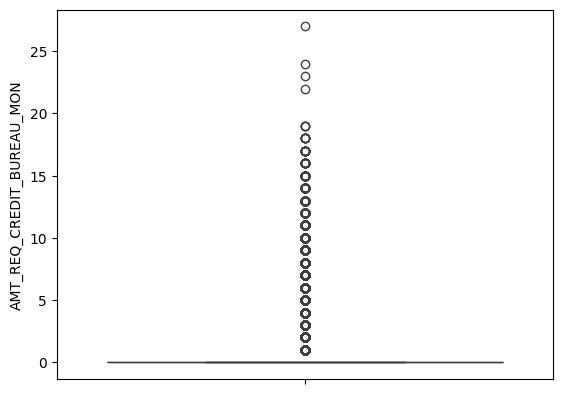

In [73]:
sns.boxplot(df.AMT_REQ_CREDIT_BUREAU_MON)
plt.show()

In [74]:
df.AMT_REQ_CREDIT_BUREAU_MON.median()

0.0

In [75]:
df.AMT_REQ_CREDIT_BUREAU_MON.mode()

0   0.00
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [76]:
df.AMT_REQ_CREDIT_BUREAU_MON.mean()

0.26739526000781977

**Спостереження:**
- медіана становить 0.00
- Найчастіше повторюване значення  0.00
- Середнє значення 0.267
- З огляду візуалізації цього стовпчика видно що є багато аутлаєрів
- Так як відсоткове значення пропущенних даних більше 10% дані не будуть піддаватись імпутації.
- присутня чітко виражена  мода (відсоток 84%) а також мода повністю співпадає з медіаною, тому якщо метод вимагатиме імплікації, ми можемо імплікувати дані за допомогою медіани і створити ще один стовпчик, в якому буде позначено, які значення були імпліковані.

**Аналіз стовпця "AMT_REQ_CREDIT_BUREAU_WEEK" - 13.5% пропущених значень**

In [77]:
null_df_under40[null_df_under40.column_name=='AMT_REQ_CREDIT_BUREAU_WEEK']

column_name  null_count  null_percentage
118  AMT_REQ_CREDIT_BUREAU_WEEK       41519            13.50

In [78]:
df.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts(normalize=True)

AMT_REQ_CREDIT_BUREAU_WEEK
0.00   0.97
1.00   0.03
2.00   0.00
3.00   0.00
4.00   0.00
6.00   0.00
5.00   0.00
8.00   0.00
7.00   0.00
Name: proportion, dtype: float64

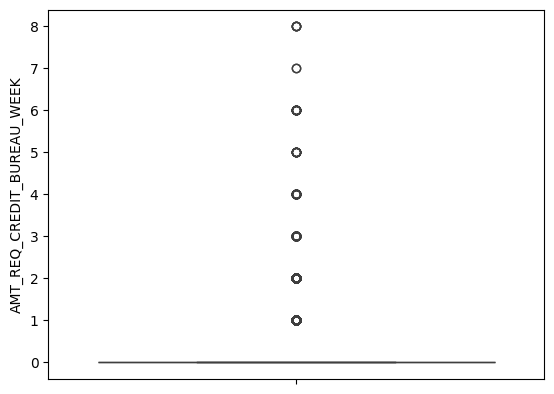

In [79]:
sns.boxplot(df.AMT_REQ_CREDIT_BUREAU_WEEK)
plt.show()

In [80]:
df.AMT_REQ_CREDIT_BUREAU_WEEK.median()

0.0

In [81]:
df.AMT_REQ_CREDIT_BUREAU_WEEK.mode()

0   0.00
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [82]:
df.AMT_REQ_CREDIT_BUREAU_WEEK.mean()

0.0343619356973142

**Спостереження:**
- медіана становить 0.00
- Найчастіше повторюване значення  0.00
- Середнє значення 0.034
- з огляду візуалізації цього стовпчика видно що є декілька аутлаєрів
- Відсоткове значення пропущенних даних більше 10% тому такі дані залишаємо як є
-  Присутня чітко виражена  мода (відсоток 97%) а також мода повністю співпадає з медіаною, тому якщо нам все-таки буде необхідно провести імпутацію -  можна провести імлікацію за допомогою моди чи медіани.

**Аналіз стовпця "AMT_REQ_CREDIT_BUREAU_DAY" з кількістю пропущених значень 13,5%**

In [83]:
null_df_under40[null_df_under40.column_name=='AMT_REQ_CREDIT_BUREAU_DAY']

column_name  null_count  null_percentage
117  AMT_REQ_CREDIT_BUREAU_DAY       41519            13.50

In [84]:
df.AMT_REQ_CREDIT_BUREAU_DAY.value_counts(normalize=True)

AMT_REQ_CREDIT_BUREAU_DAY
0.00   0.99
1.00   0.00
2.00   0.00
3.00   0.00
4.00   0.00
5.00   0.00
6.00   0.00
9.00   0.00
8.00   0.00
Name: proportion, dtype: float64

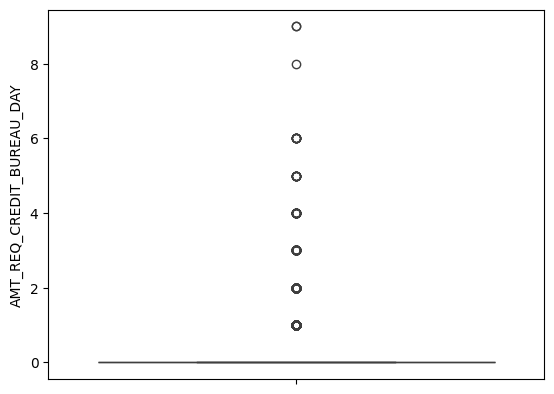

In [85]:
sns.boxplot(df.AMT_REQ_CREDIT_BUREAU_DAY)
plt.show()

In [86]:
df.AMT_REQ_CREDIT_BUREAU_DAY.median()

0.0

In [87]:
df.AMT_REQ_CREDIT_BUREAU_DAY.mode()

0   0.00
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [88]:
df.AMT_REQ_CREDIT_BUREAU_DAY.mean()

0.0070002105326475985

**Спостереження:**
- медіана становить 0.00
- Найчастіше повторюване значення  0.00
- Середнє значення 0.007
- з огляду візуалізації цього стовпчика видно що є декілька  аутлаєрів

Відсоткове значення пропущенних даних більше 10% тому такі дані залишаємо як є.
Присутня чітко виражена мода (відсоток 99%), яка повністю співпадає з медіаною, тому якщо нам все-таки буде необхідно провести імпутацію - можна провести імлікацію за допомогою моди чи медіани.

**Аналіз стовпчика "AMT_REQ_CREDIT_BUREAU_HOUR" з кількістю попущених значень 13,5%**

In [89]:
null_df_under40[null_df_under40.column_name=='AMT_REQ_CREDIT_BUREAU_HOUR']

column_name  null_count  null_percentage
116  AMT_REQ_CREDIT_BUREAU_HOUR       41519            13.50

In [90]:
df.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts(normalize=True)

AMT_REQ_CREDIT_BUREAU_HOUR
0.00   0.99
1.00   0.01
2.00   0.00
3.00   0.00
4.00   0.00
Name: proportion, dtype: float64

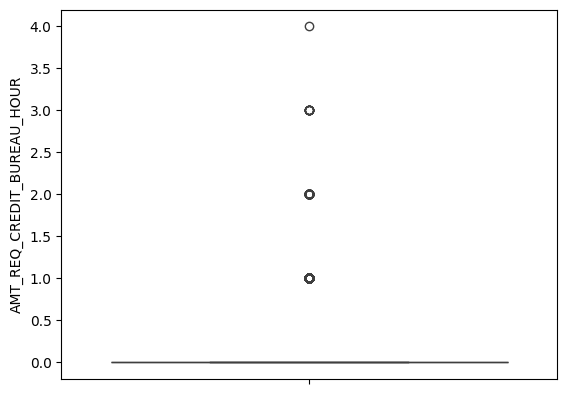

In [91]:
sns.boxplot(df.AMT_REQ_CREDIT_BUREAU_HOUR)
plt.show()

In [92]:
df.AMT_REQ_CREDIT_BUREAU_HOUR.mode()

0   0.00
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [93]:
df.AMT_REQ_CREDIT_BUREAU_HOUR.median()

0.0

In [94]:
df.AMT_REQ_CREDIT_BUREAU_HOUR.mean()

0.006402448193930645

**Спостереження:**

- медіана становить 0.00;
- Найчастіше повторюване значення 0.00;
- Середнє значення 0.007;
- З огляду візуалізації цього стовпчика видно що є  аутлаєри

Відсоткове значення пропущенних даних більше 10% тому такі дані залишаємо як є. Присутня чітко виражена мода (відсоток 99%), яка повністю співпадає з медіаною, тому якщо нам все-таки буде необхідно провести імпутацію - можна провести імлікацію за допомогою моди чи медіани.

## Перевірка стовпців зі значеннями NULL > 0% та < 1%

Створення датафрейму `null_df_under1` з відсотком пропущених значень > 0% та < 1% у кожному стовпці

In [95]:
null_df_under1 = null_df[(null_df['null_percentage'] > 0) & (null_df['null_percentage'] < 1)]

In [96]:
null_df_under1.sort_values(by = 'null_percentage', ascending = False)

column_name  null_count  null_percentage
11           NAME_TYPE_SUITE        1292             0.42
91  OBS_30_CNT_SOCIAL_CIRCLE        1021             0.33
92  DEF_30_CNT_SOCIAL_CIRCLE        1021             0.33
93  OBS_60_CNT_SOCIAL_CIRCLE        1021             0.33
94  DEF_60_CNT_SOCIAL_CIRCLE        1021             0.33
42              EXT_SOURCE_2         660             0.21
10           AMT_GOODS_PRICE         278             0.09

### Аналіз стовпця `NAME_TYPE_SUITE`

In [97]:
null_df_under1[null_df_under1.column_name == 'NAME_TYPE_SUITE']

column_name  null_count  null_percentage
11  NAME_TYPE_SUITE        1292             0.42

In [98]:
df['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

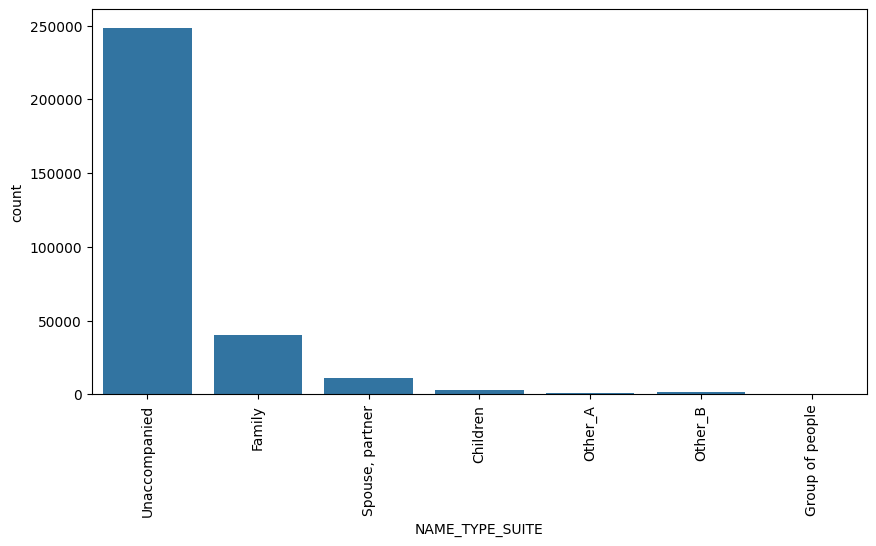

In [99]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = "NAME_TYPE_SUITE")
plt.xticks(rotation = 90)
plt.show()

**Спостереження**
-   Дивлячись на графік, категорія `Unaccompanied` має найбільшу кількість заявників на отримання кредиту. Отже, більшість позичальників наважуються звертатися за кредитом без супроводу.
- Ми можемо продовжити і вказати `Unaccompanied` у датафреймі, але я б віддала перевагу другому варіанту.
- Ми також могли заповнити дані зі значенням "NA", оскільки цей стовпець є категоріальним.
- Так само, якщо в стовпці відсутні менше 1% даних, ми можемо видалити відсутні значення. Але якщо ми видалимо всі дані в усіх стовпцях, які мають <=1% відсутніх даних, ми можемо видалити забагато даних. Тому я переважно зберігаю дані, наскільки можу.

In [100]:
df['NAME_TYPE_SUITE'].fillna('NA', inplace=True)

### Analysis of `OBS_30_CNT_SOCIAL_CIRCLE` column

In [101]:
null_df_under1[null_df_under1.column_name == 'OBS_30_CNT_SOCIAL_CIRCLE']

column_name  null_count  null_percentage
91  OBS_30_CNT_SOCIAL_CIRCLE        1021             0.33

In [102]:
df.OBS_30_CNT_SOCIAL_CIRCLE.value_counts().head(10)

OBS_30_CNT_SOCIAL_CIRCLE
0.00    163910
1.00     48783
2.00     29808
3.00     20322
4.00     14143
5.00      9553
6.00      6453
7.00      4390
8.00      2967
9.00      2003
Name: count, dtype: int64

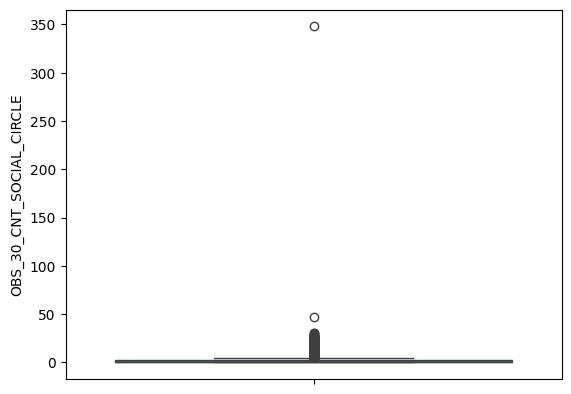

In [103]:
sns.boxplot(df.OBS_30_CNT_SOCIAL_CIRCLE)
plt.show()

Getting percentile values for `OBS_30_CNT_SOCIAL_CIRCLE`

In [104]:
df.OBS_30_CNT_SOCIAL_CIRCLE.quantile(q = [0.25,0.5,0.75,1])

0.25     0.00
0.50     0.00
0.75     2.00
1.00   348.00
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

Most recurring value in `OBS_30_CNT_SOCIAL_CIRCLE`

In [105]:
df.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0]

0.0

Checking the average value of `OBS_30_CNT_SOCIAL_CIRCLE`

In [106]:
df.OBS_30_CNT_SOCIAL_CIRCLE.mean()

1.4222454239942575

**Спостереження**
- Дивлячись на боксплот, медіана становить 0,0
- Найчастіше повторюване значення становить 0,0
- Середнє значення 1,4222
- Є два виброси: 50 і 350.
- Середнє значення та мода близькі (відносно рангу даних у цьому стовпці) і можуть бути використані для імпутації. Це не призведе до зміщення, оскільки відсоток відсутнього значення невеликий (0,33%)

In [107]:
df['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(df['OBS_30_CNT_SOCIAL_CIRCLE'].median(), inplace=True)

# ДЗ 2. Аналіз і заповнення пустих значень у колонках з малим відсотком пропущених

За прикладом вище проведіть аналіз пропущених значень в колонках
- DEF_30_CNT_SOCIAL_CIRCLE
- EXT_SOURCE_2
- OBS_60_CNT_SOCIAL_CIRCLE
- DEF_60_CNT_SOCIAL_CIRCLE
- AMT_GOODS_PRICE

Для швидшого аналізу рекомендую написати фукнцію, яку Ви зможете викликати для кожної з колонок.

Зробіть висновок, що робити з пропущеними значеннями в кожному випадку і виконанайте ту дію, яку зазначили.

In [108]:
def compute_stats(column):
    mean_value = column.mean()
    mode_value = column.mode()[0]
    median_value = column.median()
    print( "Mean_value:", mean_value)
    print( "Mode_value:",mode_value)
    print( "Median_value:", median_value)

**Аналіз стовпця "DEF_30_CNT_SOCIAL_CIRCLE"**

In [109]:
null_df_under1[null_df_under1.column_name == 'DEF_30_CNT_SOCIAL_CIRCLE']

column_name  null_count  null_percentage
92  DEF_30_CNT_SOCIAL_CIRCLE        1021             0.33

In [110]:
df.DEF_30_CNT_SOCIAL_CIRCLE.value_counts(normalize=True)

DEF_30_CNT_SOCIAL_CIRCLE
0.00    0.89
1.00    0.09
2.00    0.02
3.00    0.00
4.00    0.00
5.00    0.00
6.00    0.00
7.00    0.00
34.00   0.00
8.00    0.00
Name: proportion, dtype: float64

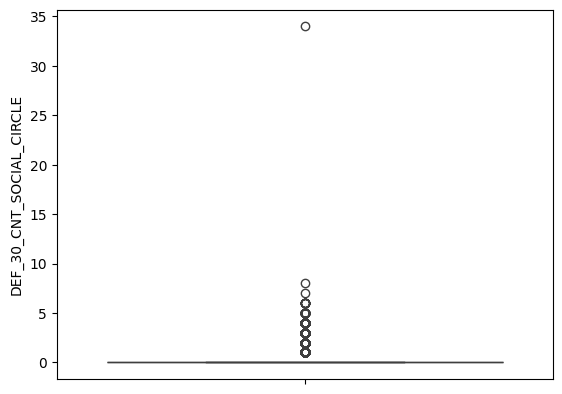

In [111]:
sns.boxplot(df.DEF_30_CNT_SOCIAL_CIRCLE)
plt.show()

In [112]:
compute_stats(df['DEF_30_CNT_SOCIAL_CIRCLE'])

Mean_value: 0.1434206662533851
Mode_value: 0.0
Median_value: 0.0


**Спостереження**:

1. Середнє значення 0.14
2. Мода 0.0
3. Медіана 0.0
4. Аутлаєри: наявні, особливо яскраво виражений зі значенням 34
Медіана та мода однакові за значенням та близькі з середнім,  мода або медіана можуть бути використані для імпутації. Це не призведе до зміщення, оскільки відсоток відсутнього значення невеликий (0,33%)



In [113]:
df['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(df['DEF_30_CNT_SOCIAL_CIRCLE'].median(), inplace=True)

**Аналіз стовпця "EXT_SOURCE_2"**

In [114]:
null_df_under1[null_df_under1.column_name == 'EXT_SOURCE_2']

column_name  null_count  null_percentage
42  EXT_SOURCE_2         660             0.21

In [115]:
df.EXT_SOURCE_2.value_counts()

EXT_SOURCE_2
0.29    721
0.26    417
0.27    343
0.16    322
0.27    306
       ... 
0.00      1
0.26      1
0.28      1
0.18      1
0.27      1
Name: count, Length: 119831, dtype: int64

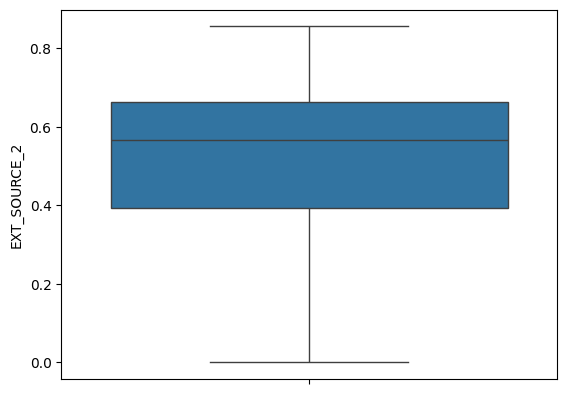

In [116]:
sns.boxplot(df.EXT_SOURCE_2)
plt.show()

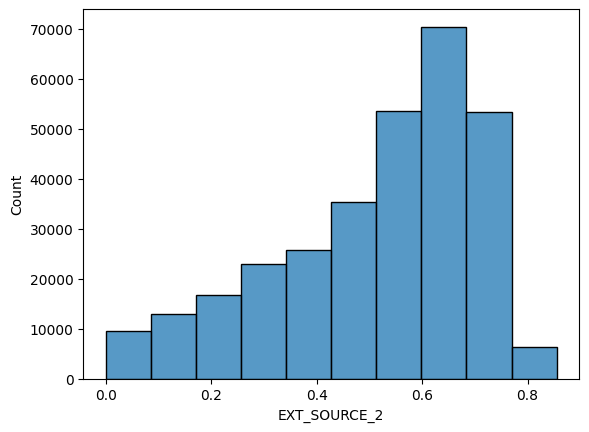

In [117]:
sns.histplot(df['EXT_SOURCE_2'], bins=10)
plt.show()

In [118]:
compute_stats(df['EXT_SOURCE_2'])

Mean_value: 0.5143926741308462
Mode_value: 0.2858978721410488
Median_value: 0.5659614260608526


**Спостереження**:

1. Середнє значення 0.51
2. Мода 0.28
3. Медіана 0.56
4. Аутлаєри: відсутні
Медіана та cереднє близькі один до одного та можуть бути використані для імпутації, що не призведе до викривлення даних. Це не призведе до зміщення, оскільки відсоток відсутнього значення невеликий (0,33%)

In [119]:
df['EXT_SOURCE_2'].fillna(df['EXT_SOURCE_2'].mean(), inplace=True)

Візуально переконаємось що розподіл даних не змінився:

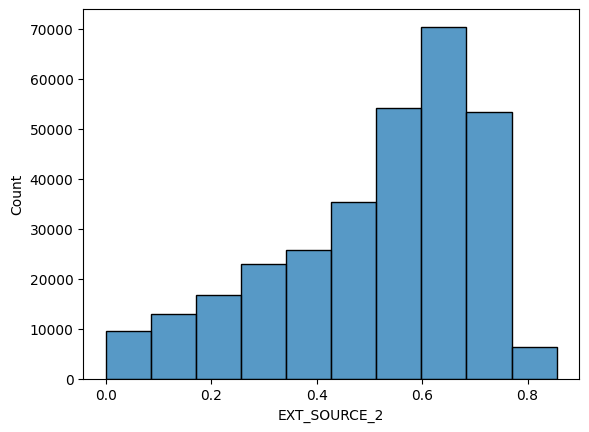

In [120]:
sns.histplot(df['EXT_SOURCE_2'], bins=10)
plt.show()

**Аналіз стовпчика "OBS_60_CNT_SOCIAL_CIRCLE"**

In [121]:
null_df_under1[null_df_under1.column_name == 'OBS_60_CNT_SOCIAL_CIRCLE']

column_name  null_count  null_percentage
93  OBS_60_CNT_SOCIAL_CIRCLE        1021             0.33

In [122]:
df.OBS_60_CNT_SOCIAL_CIRCLE.value_counts(normalize=True)

OBS_60_CNT_SOCIAL_CIRCLE
0.00     0.54
1.00     0.16
2.00     0.10
3.00     0.07
4.00     0.05
5.00     0.03
6.00     0.02
7.00     0.01
8.00     0.01
9.00     0.01
10.00    0.00
11.00    0.00
12.00    0.00
13.00    0.00
14.00    0.00
15.00    0.00
16.00    0.00
17.00    0.00
18.00    0.00
19.00    0.00
20.00    0.00
21.00    0.00
22.00    0.00
23.00    0.00
24.00    0.00
25.00    0.00
27.00    0.00
29.00    0.00
28.00    0.00
47.00    0.00
344.00   0.00
30.00    0.00
26.00    0.00
Name: proportion, dtype: float64

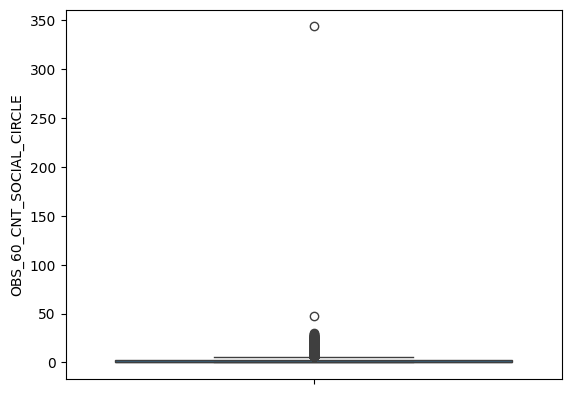

In [123]:
sns.boxplot(df.OBS_60_CNT_SOCIAL_CIRCLE)
plt.show()

In [124]:
compute_stats(df.OBS_60_CNT_SOCIAL_CIRCLE)

Mean_value: 1.4052921791901856
Mode_value: 0.0
Median_value: 0.0


**Спостереження**:

- Середнє значення 1.4
- Мода 0.0
- Медіана 0.0
- Аутлаєри: наявні, що впливають на значення середнього

Наявна виражена мода, медіана та мода однакові та можуть бути використані для імпутації, що не призведе до викривлення даних.

In [125]:
df['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(df['OBS_60_CNT_SOCIAL_CIRCLE'].median(), inplace=True)

**Аналіз стовпчика "DEF_60_CNT_SOCIAL_CIRCLE"**

In [126]:
null_df_under1[null_df_under1.column_name == 'DEF_60_CNT_SOCIAL_CIRCLE']

column_name  null_count  null_percentage
94  DEF_60_CNT_SOCIAL_CIRCLE        1021             0.33

In [127]:
df.DEF_60_CNT_SOCIAL_CIRCLE.value_counts()

DEF_60_CNT_SOCIAL_CIRCLE
0.00     280721
1.00      21841
2.00       3170
3.00        598
4.00        135
5.00         20
6.00          3
7.00          1
24.00         1
Name: count, dtype: int64

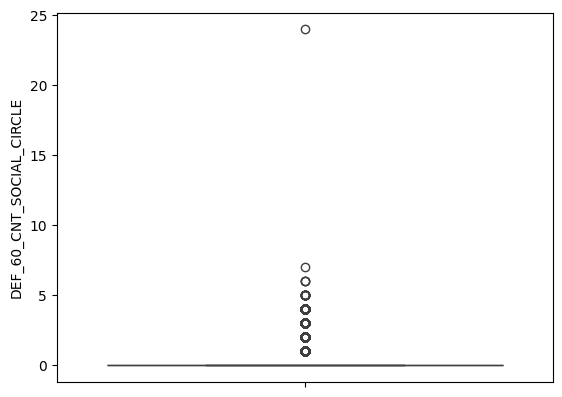

In [128]:
sns.boxplot(df.DEF_60_CNT_SOCIAL_CIRCLE)
plt.show()

In [129]:
compute_stats(df.DEF_60_CNT_SOCIAL_CIRCLE)

Mean_value: 0.10004894123788705
Mode_value: 0.0
Median_value: 0.0


**Спостереження**:

- Середнє значення 0.1
- Мода 0.0
- Медіана 0.0
- Аутлаєри: наявні, що впливають на значення середнього

Наявна виражена мода; медіана та мода однакові;середнє значення 0.1 також близьке до медіани та моди. Пропущені дані замінюємо значенням медіани, оскільки їх відсоток менший 1% і значення медіани,моди та середнього дозволяє зробити імпутацію без зміщення дних та порушення їх розподілу.

In [130]:
df['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(df['DEF_60_CNT_SOCIAL_CIRCLE'].median(), inplace=True)

**Аналіз стовпчика "AMT_GOODS_PRICE"**

In [131]:
null_df_under1[null_df_under1.column_name == 'AMT_GOODS_PRICE']

column_name  null_count  null_percentage
10  AMT_GOODS_PRICE         278             0.09

In [132]:
df.AMT_GOODS_PRICE.value_counts()

AMT_GOODS_PRICE
450000.00     26022
225000.00     25282
675000.00     24962
900000.00     15416
270000.00     11428
              ...  
1265751.00        1
503266.50         1
810778.50         1
666090.00         1
743863.50         1
Name: count, Length: 1002, dtype: int64

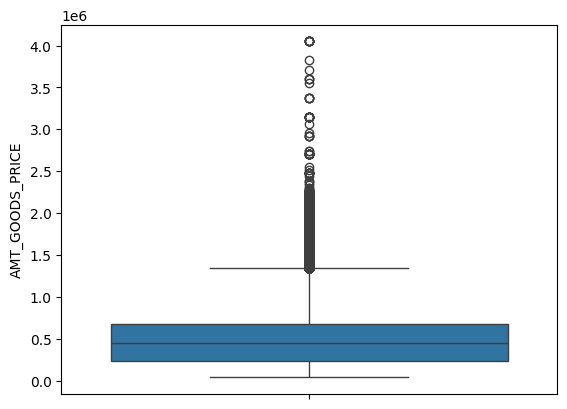

In [133]:
sns.boxplot(df.AMT_GOODS_PRICE)
plt.show()

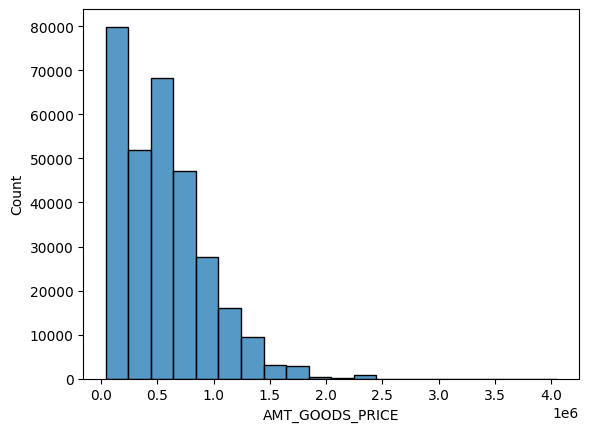

In [134]:
sns.histplot(df.AMT_GOODS_PRICE, bins=20)
plt.show()

In [135]:
compute_stats(df.AMT_GOODS_PRICE)

Mean_value: 538396.2074288895
Mode_value: 450000.0
Median_value: 450000.0


**Спостереження**:

- Середнє значення 538396.2
- Мода 450000
- Медіана 450000
- Аутлаєри: наявні, що впливають на значення середнього

Немає вираженої моди, проте медіана та мода однаков. Пропущені дані замінюємо значенням медіани, оскільки їх відсоток менший 1% та ця імпутацію не вплине на  зміщення даних та порушення їх розподілу.

In [136]:
df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].median(), inplace=True)

# Робота з неправильними/невідомими значеннями даних

### Аналіз стовпця `CODE_GENDER`

Перевірка діапазону значень

In [137]:
df['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

Стать має бути тільки чоловіча або жіноча. Значення `XNA` може вказувати на те, що значення не було надано заявником або пропущено кредитним спеціалістом, який перевіряє заявку

In [138]:
df[df['CODE_GENDER'] == 'XNA']

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
35657      141289       0    Revolving loans         XNA             1   
38566      144669       0    Revolving loans         XNA             0   
83382      196708       0    Revolving loans         XNA             0   
189640     319880       0    Revolving loans         XNA             1   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
35657                 1             0         207000.00   382500.00   
38566                 1             2         157500.00   270000.00   
83382                 1             1         135000.00   405000.00   
189640                1             0         247500.00   540000.00   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
35657      19125.00        337500.00   Unaccompanied               Working   
38566      13500.00        225000.00          Family               Working   
83382      20250.00        225000.00   Unaccompanied               Working   
189640     27000.00        900000.00   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
35657   Secondary / secondary special            Married  Municipal apartment   
38566   Secondary / secondary special            Married    House / apartment   
83382                Higher education            Married    House / apartment   
189640              Incomplete higher     Civil marriage    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
35657                         0.02      -20232         -10044   
38566                         0.03      -13717          -2797   
83382                         0.04      -10647          -1228   
189640                        0.04       -9649          -2293   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
35657           -10024.00            -3537           1               1   
38566            -2241.00            -4659           1               1   
83382             -183.00            -1671           1               1   
189640           -4099.00            -2326           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
35657                 1                 1           1           0   
38566                 1                 1           1           0   
83382                 1                 1           1           0   
189640                1                 1           1           0   

           OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
35657              Unknown             2.00                     3   
38566   Low-skill Laborers             4.00                     2   
83382           Core staff             3.00                     2   
189640             Unknown             2.00                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
35657                             3                    TUESDAY   
38566                             2                     FRIDAY   
83382                             2                   THURSDAY   
189640                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
35657                        10                           0   
38566                        16                           0   
83382                        15                           0   
189640                       15                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
35657                            0                            0   
38566                            0                            0   
83382                            0                            0   
189640                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
35657                        0                       

Оскільки дані виглядають достовірними, ми перевіримо можливість застосування методу імпутації.
- Заявників-жінок удвічі більше, ніж заявників-чоловіків
- Отже, ми прирівняємо `CODE_GENDER` до 'F'

In [139]:
df['CODE_GENDER_CHANGED'] = df['CODE_GENDER'].apply(lambda x: 1 if x == 'XNA' else 0)

In [140]:
df['CODE_GENDER'] = df['CODE_GENDER'].apply(lambda x: 'F' if x == 'XNA' else x)

Перевірка, чи вилучено `XNA

In [141]:
df['CODE_GENDER'].value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

### Аналіз стовпця `DAYS_BIRTH`

In [142]:
df['DAYS_BIRTH'].value_counts().head()

DAYS_BIRTH
-13749    43
-13481    42
-18248    41
-10020    41
-15771    40
Name: count, dtype: int64

Існує ~17K+ унікальних записів, всі з яких, схоже, мають від'ємні значення

In [143]:
df['DAYS_BIRTH'].unique()

array([ -9461, -16765, -19046, ...,  -7951,  -7857, -25061])

In [144]:
df['DAYS_BIRTH'].nunique()

17460

In [145]:
df['DAYS_BIRTH'].describe()

count   307511.00
mean    -16037.00
std       4363.99
min     -25229.00
25%     -19682.00
50%     -15750.00
75%     -12413.00
max      -7489.00
Name: DAYS_BIRTH, dtype: float64

Перетворення `Days Birth` на додатні дні

In [146]:
df['DAYS_BIRTH'] = df['DAYS_BIRTH'].apply(lambda x: -x if x < 0 else x)

In [147]:
df['DAYS_BIRTH'].describe()

count   307511.00
mean     16037.00
std       4363.99
min       7489.00
25%      12413.00
50%      15750.00
75%      19682.00
max      25229.00
Name: DAYS_BIRTH, dtype: float64

Всі дні в `DAYS_BIRTH` мають додатні значення - це може бути зручніше для аналізу.

#### Створимо нову колонку `YEARS_BIRTH` для зручності аналізу

In [148]:
df['YEARS_BIRTH'] = df['DAYS_BIRTH'].apply(lambda x: round(x/365))

### Аналіз стовпця `NAME_FAMILY_STATUS`

Перевірка діапазону значень

In [149]:
df['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

Стать має бути тільки чоловіча або жіноча. Значення `Unknown` може означати, що значення не було вказане заявником або пропущене кредитним спеціалістом, який перевіряє заявку

In [150]:
df[df['NAME_FAMILY_STATUS'] == 'Unknown']

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
41982      148605       0    Revolving loans           M             0   
187348     317181       0    Revolving loans           F             0   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
41982                 1             0         450000.00   675000.00   
187348                1             0         202500.00   585000.00   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
41982      33750.00        450000.00              NA  Commercial associate   
187348     29250.00        450000.00              NA  Commercial associate   

       NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
41982      Lower secondary            Unknown  Municipal apartment   
187348    Higher education            Unknown    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
41982                         0.02       12396          -1161   
187348                        0.03       12844           -232   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
41982            -3265.00            -4489           1               1   
187348           -1597.00            -1571           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
41982                 1                 1           1           0   
187348                0                 1           0           0   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
41982         Managers              NaN                     2   
187348     Accountants              NaN                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
41982                             2                   THURSDAY   
187348                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
41982                        15                           0   
187348                       14                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
41982                            1                            1   
187348                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
41982                        0                       1   
187348                       0                       0   

        LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  \
41982                         1               Insurance          0.70   
187348                        0  Business Entity Type 2          0.65   

        EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
41982            NaN                      3.00                      0.00   
187348          0.67                      1.00                      0.00   

        OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
41982                       3.00                      0.00   
187348                      1.00                      0.00   

        DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
41982                  -876.00                0                0   
187348                 -654.00                0                0   

        FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
41982                 0                1                0                0   
187348                0                0                0                1   

        FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
41982                 0                0                 0                 0   
187348                0                0                 0                 0   

        FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
41982                  0                 0                 0   
187348                 0                 0                 0   

        FLAG_DOCUMENT_15 

In [151]:
df['NAME_FAMILY_STATUS'].value_counts(normalize = True) * 100

NAME_FAMILY_STATUS
Married                63.88
Single / not married   14.78
Civil marriage          9.68
Separated               6.43
Widow                   5.23
Unknown                 0.00
Name: proportion, dtype: float64

Оскільки дані виглядають достовірними, ми продовжимо перевірку методу імплікації.
- Одружені заявники складають понад 63% заявників.
- Отже, ми прирівняємо `NAME_FAMILY_STATUS` до `Married`.

In [152]:
df['NAME_FAMILY_STATUS'] = df['NAME_FAMILY_STATUS'].apply(lambda x: 'Married' if x == 'Unknown' else x)

Перевірка чи вилучено `Unknown`

In [153]:
df['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 196434
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: count, dtype: int64

### Аналіз стовпця`DAYS_EMPLOYED`

In [154]:
df['DAYS_EMPLOYED'].value_counts().head()

DAYS_EMPLOYED
 365243    55374
-200         156
-224         152
-230         151
-199         151
Name: count, dtype: int64

In [155]:
df['DAYS_EMPLOYED'].value_counts(normalize = True) * 100

DAYS_EMPLOYED
 365243   18.01
-200       0.05
-224       0.05
-230       0.05
-199       0.05
           ... 
-13961     0.00
-11827     0.00
-10176     0.00
-9459      0.00
-8694      0.00
Name: proportion, Length: 12574, dtype: float64

In [156]:
len(df[df['DAYS_EMPLOYED'] < 365243])

252137

In [157]:
df[df['DAYS_EMPLOYED'] < 365243].DAYS_EMPLOYED.value_counts()

DAYS_EMPLOYED
-200      156
-224      152
-199      151
-230      151
-212      150
         ... 
-13961      1
-11827      1
-10176      1
-9459       1
-8694       1
Name: count, Length: 12573, dtype: int64

In [158]:
df['DAYS_EMPLOYED'].unique()

array([  -637,  -1188,   -225, ..., -12971, -11084,  -8694])

In [159]:
df['DAYS_EMPLOYED'].nunique()

12574

**Спостереження**
- Існує ~55K+ записів, для яких `DAYS_EMPLOYED` дорівнює 365243 дням
- Решта 252K+ записів мають від'ємне значення днів
- Існує 12 574 унікальних значень для `DAYS_EMPLOYED

 - Колонка `DAYS_EMPLOYED` вказує на те, за скільки днів до подачі заявки особа почала поточну роботу, заявник/кредитний спеціаліст повинен ввести від'ємні значення, щоб вказати дні, що передують даті подачі заявки.<br>
 - Ми конвертуємо від'ємні значення в `DAYS_EMPLOYED` в додатні дні, щоб стандартизувати дні під час використання в розрахунках

In [160]:
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x: -x if x < 0 else x)

In [161]:
df['DAYS_EMPLOYED'].value_counts().head()

DAYS_EMPLOYED
365243    55374
200         156
224         152
230         151
199         151
Name: count, dtype: int64

Ми бачимо, що всі дні в `DAYS_EMPLOYED` мають додатні значення.

**Для ~55K+ записів, для яких `DAYS_EMPLOYED` становить 365243 дні**
- Конвертуючи це в роки, ми отримуємо 1000 років, які фізично неможливо використати для працевлаштування заявника
- Це відповідає 18% даних і не може бути аномалією
- Вони можуть бути або "пенсіонерами", або "безробітними", і, дивлячись на дані, наш висновок є правильним

> Є два способи впоратися з цим
>> 1) Ми залишаємо дані такими, якими вони є, і враховуємо це під час аналізу АБО  <br>
>> 2) Ми розраховуємо середню кількість днів зайнятості без урахування цієї категорії та вписуємо її замість 365243 днів для пенсіонерів. <br>
>> Для безробітних кількість днів зайнятості може дорівнювати 0

*Примітка*
 - Під час розрахунків у цьому стовпчику ми повинні враховувати цей сценарій, оскільки інакше він спотворює наші результати

In [162]:
days_median = df[df['DAYS_EMPLOYED'] != 365243].DAYS_EMPLOYED.median()

In [163]:
df_days_employed = df['DAYS_EMPLOYED'].apply(lambda x: days_median if x==365243 else x)

<Axes: >

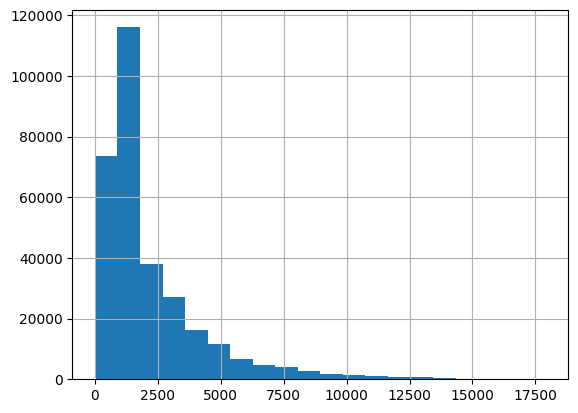

In [164]:
df_days_employed.hist(bins=20)

<Axes: >

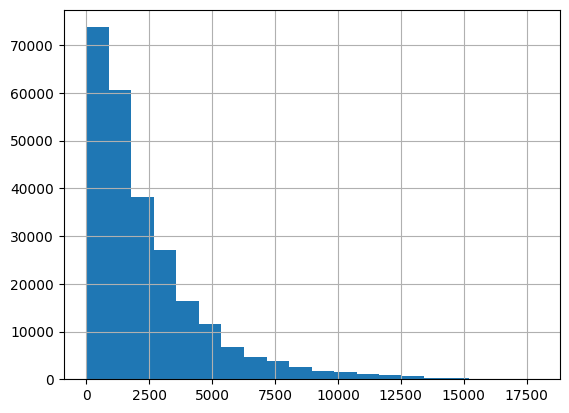

In [165]:
df[df['DAYS_EMPLOYED'] != 365243].DAYS_EMPLOYED.hist(bins=20)

In [166]:
df[df['DAYS_EMPLOYED'] == 365243].NAME_INCOME_TYPE.value_counts()

NAME_INCOME_TYPE
Pensioner     55352
Unemployed       22
Name: count, dtype: int64

#### Створимо нову колонку `YEARS_EMPLOYED` для зручності аналізу

In [167]:
df['YEARS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x: round(x/365))

### Аналіз стовпця `DAYS_REGISTRATION`

In [168]:
df['DAYS_REGISTRATION'].value_counts().head()

DAYS_REGISTRATION
-1.00    113
-7.00     98
-6.00     96
-4.00     92
-2.00     92
Name: count, dtype: int64

In [169]:
df['DAYS_REGISTRATION'].value_counts(normalize = True).head()

DAYS_REGISTRATION
-1.00   0.00
-7.00   0.00
-6.00   0.00
-4.00   0.00
-2.00   0.00
Name: proportion, dtype: float64

In [170]:
df['DAYS_REGISTRATION'].unique()

array([ -3648.,  -1186.,  -4260., ..., -16396., -14558., -14798.])

In [171]:
df['DAYS_REGISTRATION'].nunique()

15688

Перетворення `DAYS_REGISTRATION` в додатні дні

In [172]:
df['DAYS_REGISTRATION'] = df['DAYS_REGISTRATION'].apply(lambda x: -x if x < 0 else x)

In [173]:
df['DAYS_REGISTRATION'].value_counts().head()

DAYS_REGISTRATION
1.00    113
7.00     98
6.00     96
4.00     92
2.00     92
Name: count, dtype: int64

Всі дні в `DAYS_REGISTRATION` мають додатні значення

#### Створимо нову колонку `YEARS_REGISTRATION` для зручності аналізу

In [174]:
df['YEARS_REGISTRATION'] = df['DAYS_REGISTRATION'].apply(lambda x: round(x/365))

### Аналіз стовпця `DAYS_ID_PUBLISH`

In [175]:
df['DAYS_ID_PUBLISH'].value_counts().head()

DAYS_ID_PUBLISH
-4053    169
-4095    162
-4046    161
-4417    159
-4256    158
Name: count, dtype: int64

In [176]:
df['DAYS_ID_PUBLISH'].value_counts(normalize = True).head()

DAYS_ID_PUBLISH
-4053   0.00
-4095   0.00
-4046   0.00
-4417   0.00
-4256   0.00
Name: proportion, dtype: float64

In [177]:
df['DAYS_ID_PUBLISH'].unique()

array([-2120,  -291, -2531, ..., -6194, -5854, -6211])

In [178]:
df['DAYS_ID_PUBLISH'].nunique()

6168

Перетворення `DAYS_ID_PUBLISH` в додатні дні

In [179]:
df['DAYS_ID_PUBLISH'] = df['DAYS_ID_PUBLISH'].apply(lambda x: -x if x < 0 else x)

In [180]:
df['DAYS_ID_PUBLISH'].value_counts().head()

DAYS_ID_PUBLISH
4053    169
4095    162
4046    161
4417    159
4256    158
Name: count, dtype: int64

Всі дні в `DAYS_ID_PUBLISH` мають додатні значення

#### Створимо нову колонку `YEARS_ID_PUBLISH` для зручності аналізу

In [181]:
df['YEARS_ID_PUBLISH'] = df['DAYS_ID_PUBLISH'].apply(lambda x: round(x/365))

### Аналіз стовпця `DAYS_LAST_PHONE_CHANGE`

In [182]:
df['DAYS_LAST_PHONE_CHANGE'].value_counts().head()

DAYS_LAST_PHONE_CHANGE
0.00     37672
-1.00     2812
-2.00     2318
-3.00     1763
-4.00     1285
Name: count, dtype: int64

In [183]:
df['DAYS_LAST_PHONE_CHANGE'].value_counts(normalize = True).head()

DAYS_LAST_PHONE_CHANGE
0.00    0.12
-1.00   0.01
-2.00   0.01
-3.00   0.01
-4.00   0.00
Name: proportion, dtype: float64

In [184]:
df['DAYS_LAST_PHONE_CHANGE'].unique()

array([-1134.,  -828.,  -815., ..., -3988., -3899., -3538.])

In [185]:
df['DAYS_LAST_PHONE_CHANGE'].nunique()

3773

Перетворення `DAYS_LAST_PHONE_CHANGE` в додатні дні

In [186]:
df['DAYS_LAST_PHONE_CHANGE'] = df['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: -x if x < 0 else x)

In [187]:
df['DAYS_LAST_PHONE_CHANGE'].value_counts().head()

DAYS_LAST_PHONE_CHANGE
0.00    37672
1.00     2812
2.00     2318
3.00     1763
4.00     1285
Name: count, dtype: int64

Всі дні в `DAYS_LAST_PHONE_CHANGE` мають додатні значення

#### Створення нової колонки `YEARS_LAST_PHONE_CHANGE` для зручності аналізу

In [188]:
df['YEARS_LAST_PHONE_CHANGE'] = df['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: round(x/365,0))

# Функції для автоматизації

### Створення функції `age_cat` для категоризації даних, що містять інформацію про роки

In [189]:
def age_cat(years):
    if years <= 20:
        return '0-20'
    elif years > 20 and years <= 30:
        return '20-30'
    elif years > 30 and years <= 40:
        return '30-40'
    elif years > 40 and years <= 50:
        return '40-50'
    elif years > 50 and years <= 60:
        return '50-60'
    elif years > 60 and years <= 70:
        return '60-70'
    elif years > 70:
        return '70+'

### Одномірний (категоріальний vs цільовий) та двомірний (категоріальний vs категоріальний) аналіз (гістограма) - категоріальні стовпчики

In [190]:
import matplotlib.pyplot as plt


def bi_cat_countplot(df, column, hue_column):
    unique_hue_values = df[hue_column].unique()
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(14,6)

    pltname = f'Нормалізований розподіл значень за категорією: {column}'
    proportions = df.groupby(hue_column)[column].value_counts(normalize=True)
    proportions = (proportions*100).round(2)
    ax = proportions.unstack(hue_column).sort_values(
        by=unique_hue_values[0], ascending=False
        ).plot.bar(ax=axes[0], title=pltname)

    # анотація значень в барплоті
    for container in ax.containers:
        ax.bar_label(container, fmt='{:,.1f}%')

    pltname = f'Кількість даних за категорією: {column}'
    counts = df.groupby(hue_column)[column].value_counts()
    ax = counts.unstack(hue_column).sort_values(
        by=unique_hue_values[0], ascending=False
        ).plot.bar(ax=axes[1], title=pltname)

    for container in ax.containers:
      ax.bar_label(container)


def uni_cat_target_compare(df, column):
    bi_cat_countplot(df, column, hue_column='TARGET')


### Обчислення мінімального та максимального діапазону відхилень для числових стовпців

In [191]:
def outlier_range(dataset,column):
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    Min_value = (Q1 - 1.5 * IQR)
    Max_value = (Q3 + 1.5 * IQR)
    return Max_value

### Робота з викидами для числових стовпців

In [192]:
import warnings

def dist_box(dataset, column):
    with warnings.catch_warnings():
      warnings.simplefilter("ignore")

      plt.figure(figsize=(16,6))

      plt.subplot(1,2,1)
      sns.distplot(dataset[column], color = 'purple')
      pltname = 'Графік розподілу для ' + column
      plt.ticklabel_format(style='plain', axis='x')
      plt.title(pltname)

      plt.subplot(1,2,2)
      red_diamond = dict(markerfacecolor='r', marker='D')
      sns.boxplot(y = column, data = dataset, flierprops = red_diamond)
      pltname = 'Боксплот для ' + column
      plt.title(pltname)

      plt.show()

### Аналіз стовпця`CNT_CHILDREN`

In [193]:
df['CNT_CHILDREN'].value_counts().sort_values(ascending = False);

In [194]:
(df['CNT_CHILDREN'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

CNT_CHILDREN
0   70.04
1   19.88
2    8.70
3    1.21
4    0.14
Name: proportion, dtype: float64

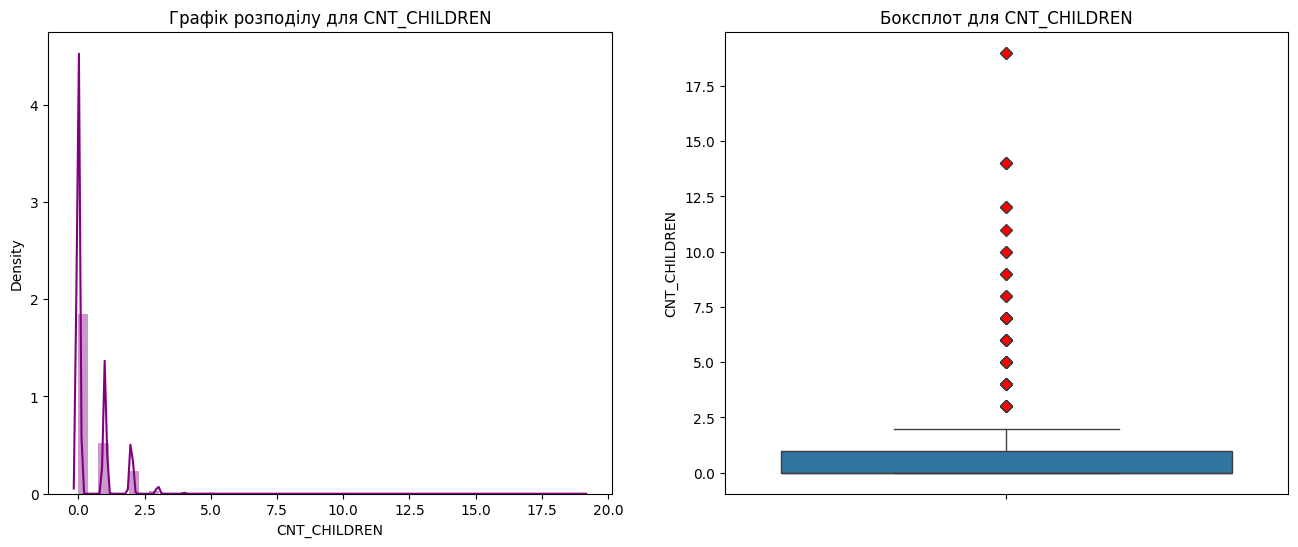

In [195]:
dist_box(df,'CNT_CHILDREN')

Розрахуємо IQR (Inter Quartile range)

In [196]:
Q1 = df['CNT_CHILDREN'].quantile(0.25)
Q3 = df['CNT_CHILDREN'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

1.0


In [197]:
Q1, Q3

(0.0, 1.0)

Значення *до* (Q1 - 1,5 * IQR) та *після* (Q3 + 1,5 * IQR) є викидами

In [198]:
Min_value = (Q1 - 1.5 * IQR)
Max_value = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value))

Мінімальне значення, до якого існують викиди: -1.5
Максимальне значення, після якого існують викиди: 2.5


In [199]:
df[df['CNT_CHILDREN'].isin(range(10,20))].YEARS_BIRTH

34545     47
80948     39
132585    31
155369    30
171125    38
176011    49
183878    56
186820    41
265784    28
267998    42
Name: YEARS_BIRTH, dtype: int64

In [200]:
df[df['CNT_CHILDREN'].isin([10])][['SK_ID_CURR', 'CNT_CHILDREN', 'YEARS_BIRTH']]

SK_ID_CURR  CNT_CHILDREN  YEARS_BIRTH
132585     253779            10           31
186820     316580            10           41

**Спостереження**
- Дивлячись на дані, ми бачимо, що кількість заявників, які мають більше 7 дітей, є дуже мінімальною (2 або 3 в кожній категорії)
- Крім того, дивлячись на дані для заявників з 10 дітьми, заявники мають лише 31 й 41 рік відповідно. Це виглядає як одиничний випадок й може розглядатися як відхилення від норми
- Як дистрибутивні, так і діаграми розмаху чітко показують, що значення, які перевищують значення 2.5, є відхиленнями від норми.

**Висновок**
- Заявники, які мають 3 або більше дітей, є випадками, що відхиляються від норми. Ми можемо надати спеціальний аналіз для цих випадків.

### Аналіз стовпця `AMT_INCOME_TOTAL`

In [201]:
df['AMT_INCOME_TOTAL'].value_counts().sort_values(ascending = False).head()

AMT_INCOME_TOTAL
135000.00    35750
112500.00    31019
157500.00    26556
180000.00    24719
90000.00     22483
Name: count, dtype: int64

In [202]:
(df['AMT_INCOME_TOTAL'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

AMT_INCOME_TOTAL
135000.00   11.63
112500.00   10.09
157500.00    8.64
180000.00    8.04
90000.00     7.31
Name: proportion, dtype: float64

In [203]:
df['AMT_INCOME_TOTAL'].describe(percentiles = [0.75,0.99,0.999])

count      307511.00
mean       168797.92
std        237123.15
min         25650.00
50%        147150.00
75%        202500.00
99%        472500.00
99.9%      900000.00
max     117000000.00
Name: AMT_INCOME_TOTAL, dtype: float64

Побудуємо графік для `AMT_INCOME_TOTAL`

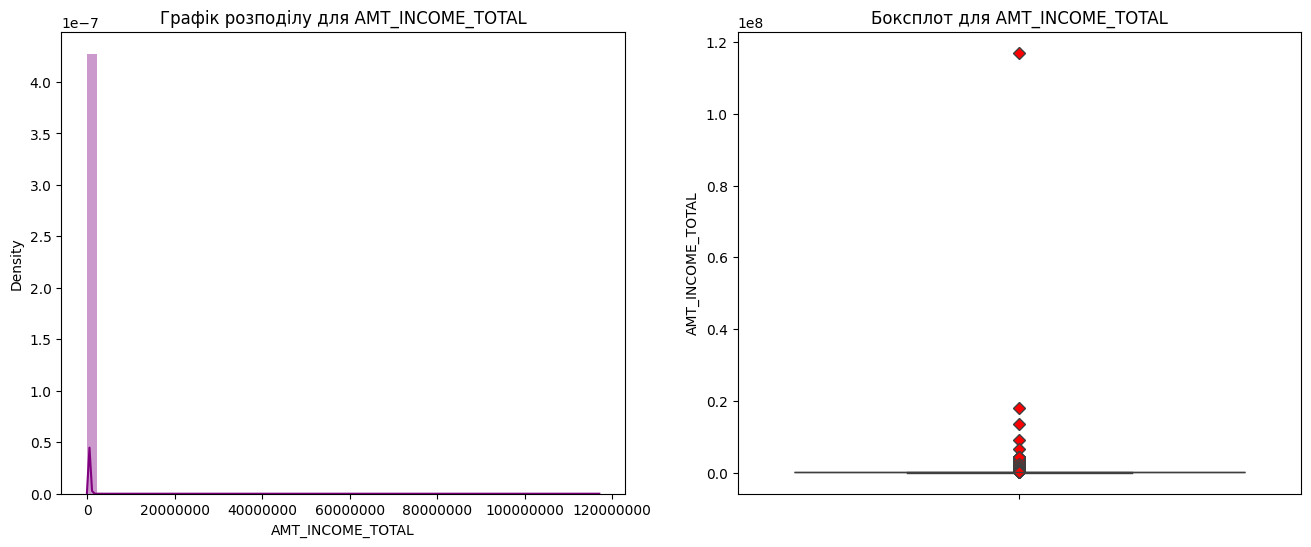

In [204]:
dist_box(df,'AMT_INCOME_TOTAL')

- Графіки кінцевого результату дуже тонкі, й ми можемо спостерігати викид близько ~120 мільйонів.
- Давайте побудуємо графік, розглядаючи лише дохід нижче 99,9% значення, тобто 900 тисяч.

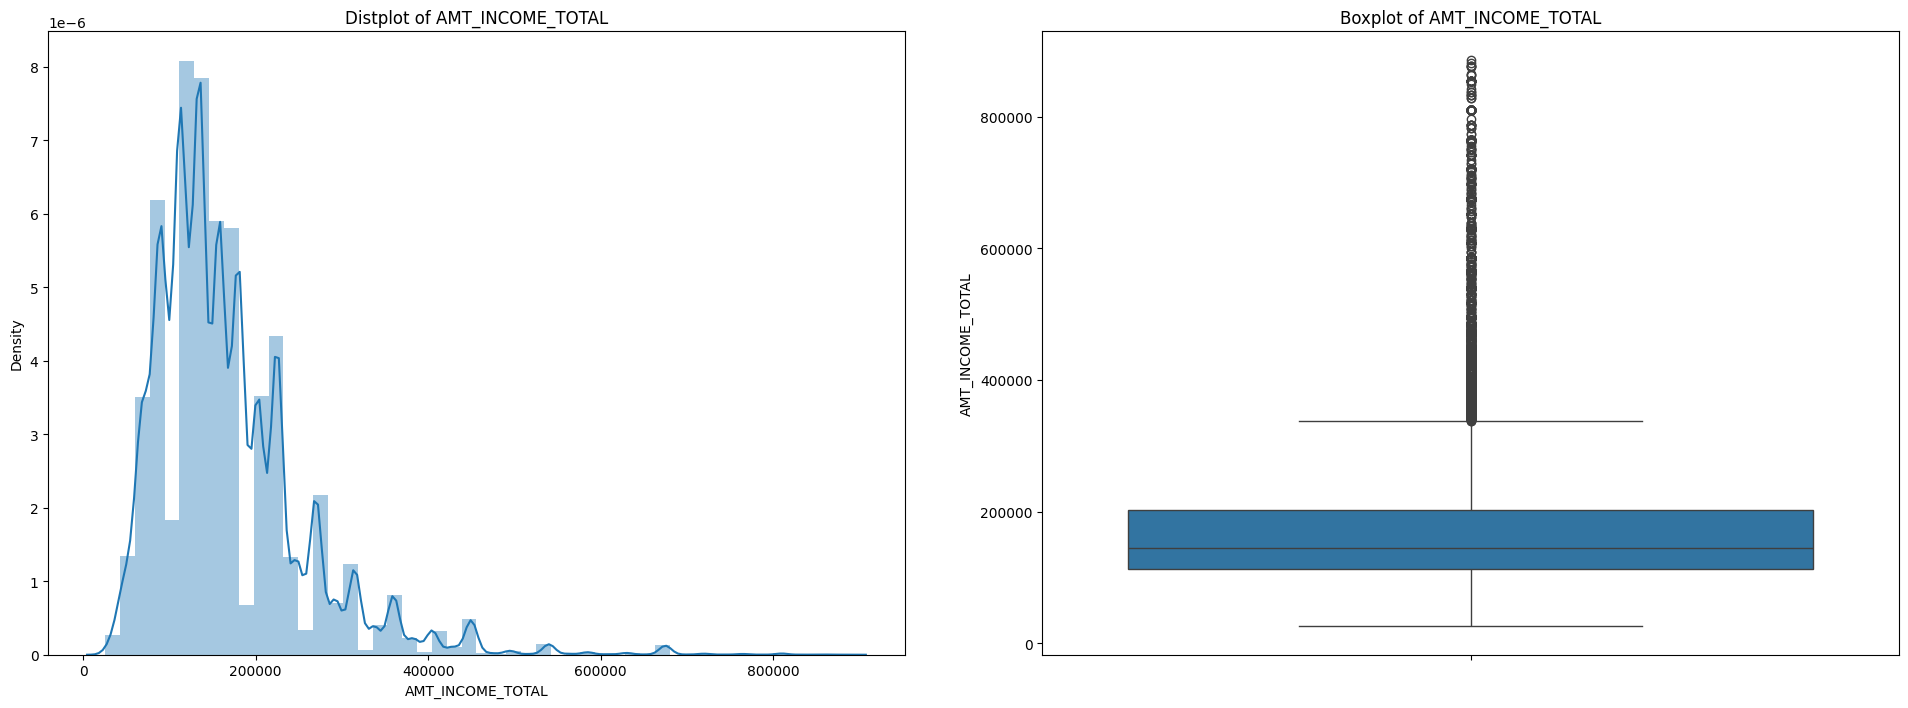

In [205]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plt.subplots(1,2 ,figsize = (20,8))

    plt.subplot(121)
    sns.distplot(df[df['AMT_INCOME_TOTAL'] < 900000].AMT_INCOME_TOTAL)
    pltname = 'Distplot of ' + 'AMT_INCOME_TOTAL'
    plt.title(pltname)

    plt.subplot(122)
    sns.boxplot(df[df['AMT_INCOME_TOTAL'] < 900000].AMT_INCOME_TOTAL)
    pltname = 'Boxplot of ' + 'AMT_INCOME_TOTAL'
    plt.title(pltname)

    plt.tight_layout(pad = 4)
    plt.show()

Тепер ми можемо чітко побачити розподіл і діапазон даних на обох графіках.
 - Це означає, що значення понад 900 тис. грн доходу явно є викидами

In [206]:
df[df['AMT_INCOME_TOTAL'] > 900000].head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
1504     101769       0    Revolving loans           M             1   
1723     102015       0         Cash loans           F             0   
3371     103938       0         Cash loans           F             0   
4603     105384       0    Revolving loans           F             1   
5673     106637       0         Cash loans           M             1   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
1504                1             0        1080000.00   180000.00   
1723                1             0        1935000.00   269550.00   
3371                0             1        1350000.00  2410380.00   
4603                1             0        1350000.00   405000.00   
5673                1             3         967500.00   450000.00   

      AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
1504      9000.00        180000.00   Unaccompanied  Commercial associate   
1723     10534.50        225000.00   Unaccompanied             Pensioner   
3371    109053.00       2250000.00              NA  Commercial associate   
4603     20250.00        405000.00   Unaccompanied  Commercial associate   
5673     30073.50        450000.00   Unaccompanied  Commercial associate   

                NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1504               Higher education            Married  House / apartment   
1723  Secondary / secondary special            Married  House / apartment   
3371               Higher education            Married  House / apartment   
4603               Higher education            Married  House / apartment   
5673               Higher education            Married  House / apartment   

      REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
1504                        0.07       13633           5536   
1723                        0.01       18636         365243   
3371                        0.07       12213            843   
4603                        0.02       14781           4768   
5673                        0.05       11901            546   

      DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
1504               3.00             4971           1               1   
1723            3401.00             2168           1               0   
3371             757.00             4132           1               1   
4603            3469.00             4045           1               1   
5673            2932.00              215           1               1   

      FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
1504                0                 1           0           0   
1723                0                 1           1           0   
3371                0                 1           1           0   
4603                0                 1           0           0   
5673                0                 1           0           0   

     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
1504         Unknown             2.00                     1   
1723         Unknown             2.00                     2   
3371        Managers             3.00                     1   
4603        Managers             2.00                     2   
5673        Managers             5.00                     1   

      REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
1504                            1                     FRIDAY   
1723                            2                     MONDAY   
3371                            1                     SUNDAY   
4603                            2                    TUESDAY   
5673                            1                     MONDAY   

      HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
1504                       13                           0   
1723                       11                           0   
3371                       13                           0   
4603          

**Спостереження**
- Дивлячись на дані, ми бачимо, що дохід понад 900 тис. грн (99,9% значення) є викидом
- Як діаграма розподілу, так і діаграма розмаху чітко показують нам ту саму тенденцію

**Висновок**
- Апліканти з доходом понад 900 тис. грн (99,9% значення) є викидами

# ДЗ 3. Аналіз викидів

Подібно до прикладу, проаналізуйте на викиди колонок
- `CNT_FAM_MEMBERS`
- `AMT_ANNUITY`

Зазначте, які значення в них можна вважати викидами.

**Аналіз стовпчика "CNT_FAM_MEMBERS"**

In [207]:
df.CNT_FAM_MEMBERS.value_counts()

CNT_FAM_MEMBERS
2.00     158357
1.00      67847
3.00      52601
4.00      24697
5.00       3478
6.00        408
7.00         81
8.00         20
9.00          6
10.00         3
14.00         2
12.00         2
20.00         2
16.00         2
13.00         1
15.00         1
11.00         1
Name: count, dtype: int64

In [208]:
df['CNT_FAM_MEMBERS'].describe(percentiles = [0.75,0.99,0.999])

count   307509.00
mean         2.15
std          0.91
min          1.00
50%          2.00
75%          3.00
99%          5.00
99.9%        6.00
max         20.00
Name: CNT_FAM_MEMBERS, dtype: float64

In [209]:
outlier_range(df,'CNT_FAM_MEMBERS')

4.5

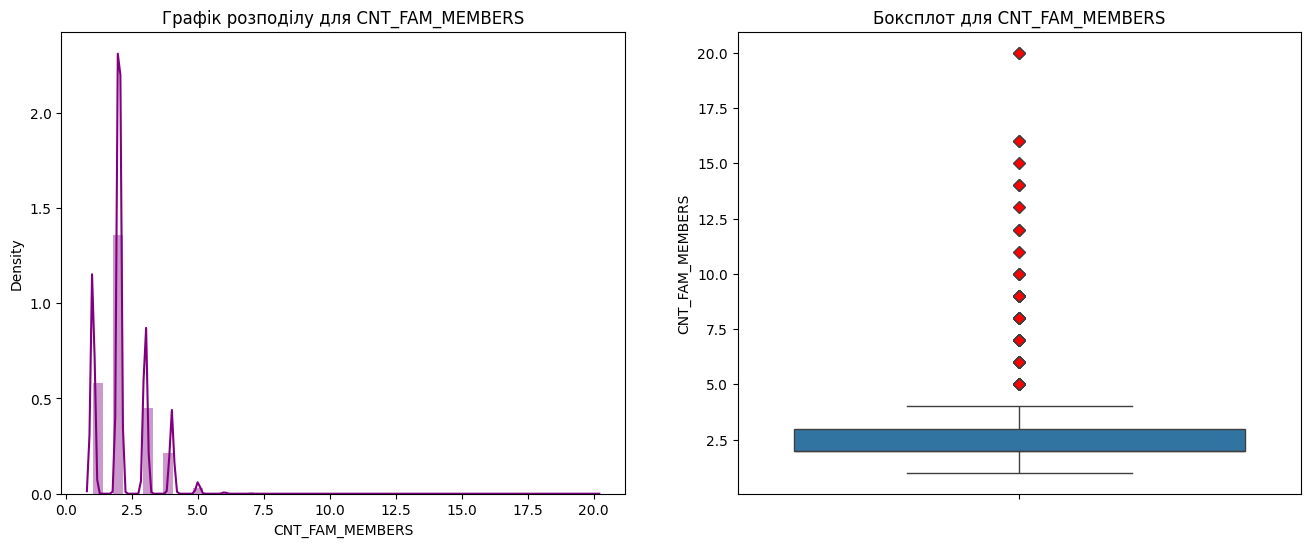

In [210]:
dist_box(df,'CNT_FAM_MEMBERS')

**Спостереження:**
- у заявників, в яких більше ніж 8 членів родини - дуже мала кількість ( від 1 до 6 в категоріях)
- згідно функції пошуку аутлаєрів- заявники,у яких більше ніж 4.5 дитини( так як такої кількості дітей не може бути,прийматимемо за 5) вважаються викидами
- графік розподілу має має тонкий довгий хвіст після значення 5, а боксплот вказує на наявність аутлаєрів вище показника 4.5
- з огляду на кількість заявників у функції value_counts, графіків розподілу та здорового глузду( оскільки в родині може справді налічуватись і 6,і 7 і навіть 8 членів родини та подекуди більше)  я б допускала прийнятним і достовірним значення 6,яке б і використовувала для побудови моделі.
- Так як кількість аплікантів з кількістю членів в родині 7 та 8 вже порівняно незначна,і по всім іншим параметрам підпадає під категорію аутлаєрів - я б не видаляла ці дані, а розглядала б значення аплікантів з кількістю членів в родині більше за 6 (тобто 7 і більше) окремо.

**Аналіз стовпчика "AMT_ANNUITY"**

In [211]:
(df.AMT_ANNUITY.value_counts(normalize = True).sort_values(ascending = False) * 100).head()

AMT_ANNUITY
9000.00    2.08
13500.00   1.79
6750.00    0.74
10125.00   0.66
37800.00   0.52
Name: proportion, dtype: float64

In [212]:
outlier_range(df,'AMT_ANNUITY')

61704.0

In [213]:
df['AMT_ANNUITY'].describe(percentiles = [0.75,0.99,0.999])

count   307499.00
mean     27108.57
std      14493.74
min       1615.50
50%      24903.00
75%      34596.00
99%      70006.50
99.9%   110047.50
max     258025.50
Name: AMT_ANNUITY, dtype: float64

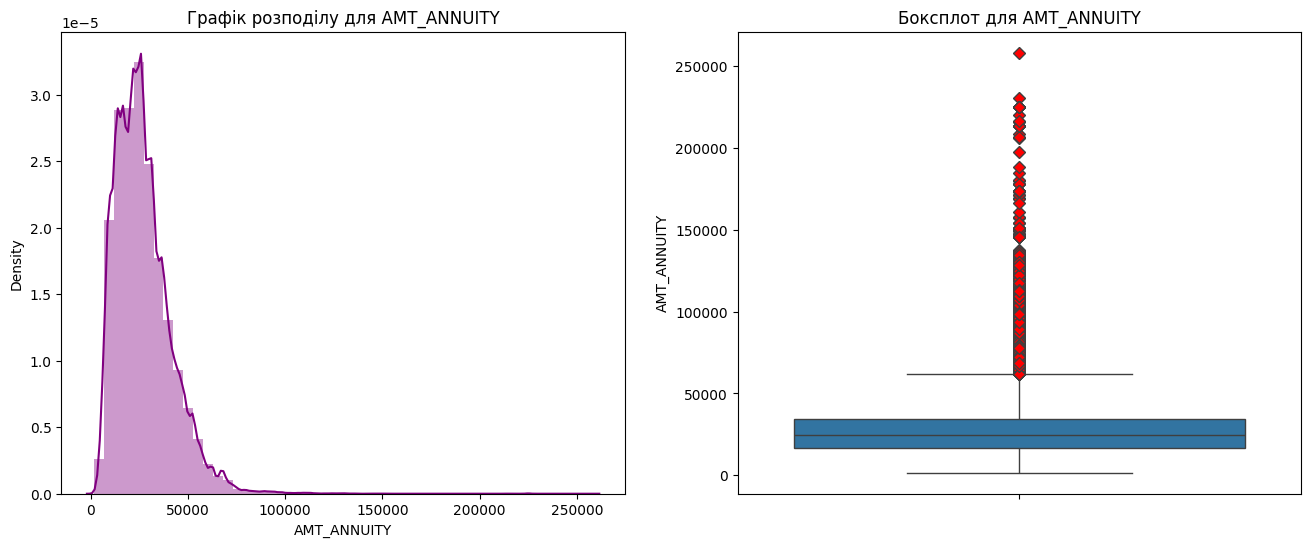

In [214]:
dist_box(df,'AMT_ANNUITY')

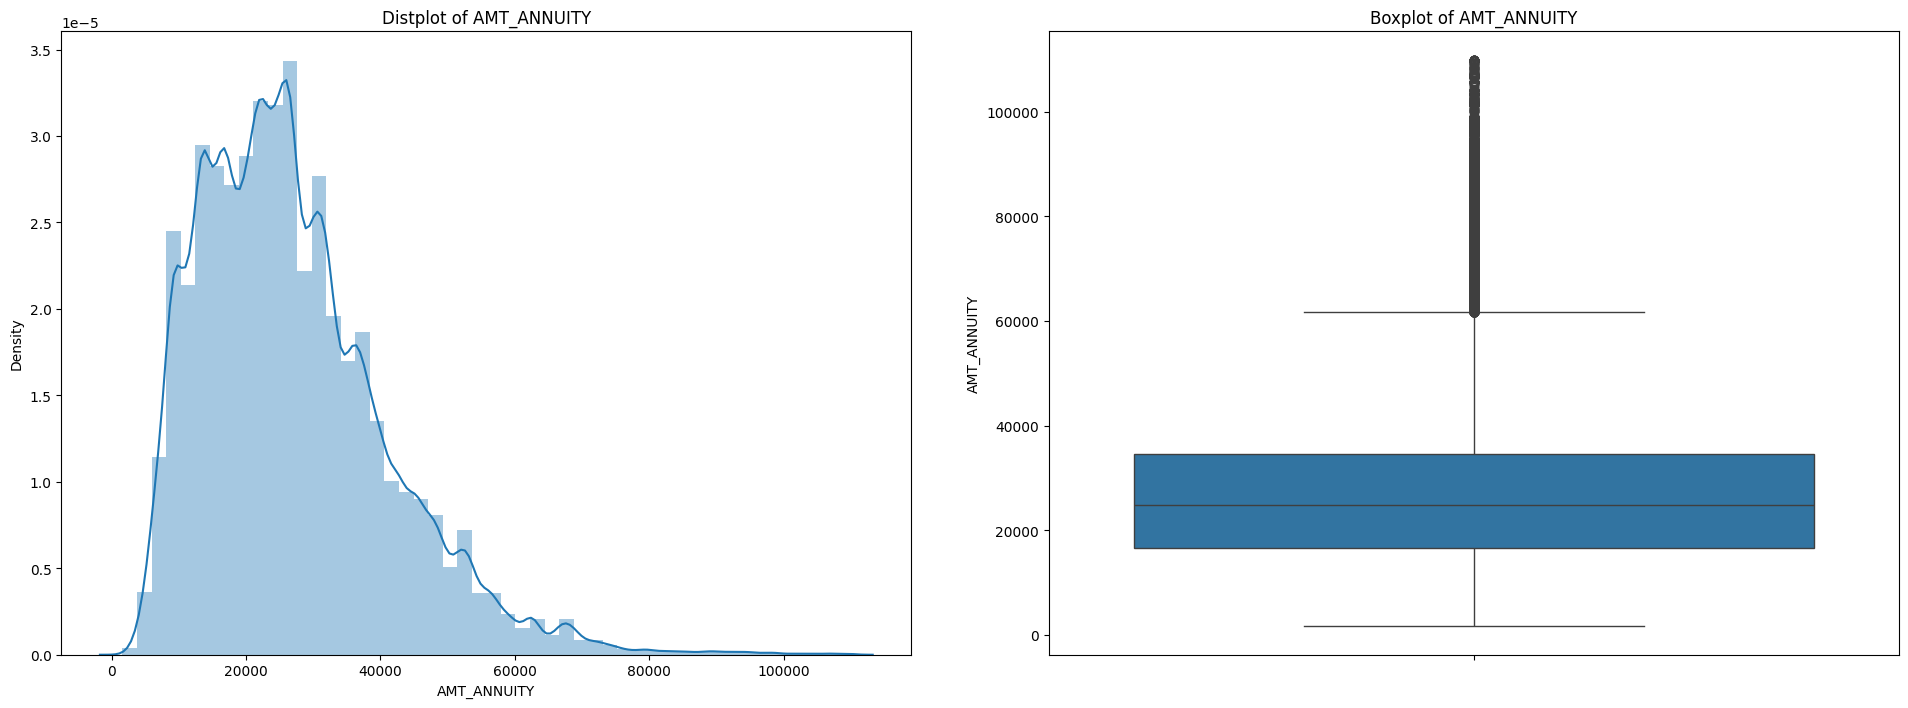

In [215]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plt.subplots(1,2 ,figsize = (20,8))

    plt.subplot(121)
    sns.distplot(df[df['AMT_ANNUITY'] < 110000].AMT_ANNUITY)
    pltname = 'Distplot of ' + 'AMT_ANNUITY'
    plt.title(pltname)

    plt.subplot(122)
    sns.boxplot(df[df['AMT_ANNUITY'] < 110000].AMT_ANNUITY)
    pltname = 'Boxplot of ' + 'AMT_ANNUITY'
    plt.title(pltname)

    plt.tight_layout(pad = 4)
    plt.show()

**Спостереження**:
- Графіки розподілу ануїтету по кредиту  має дуже тонкий та довгий хвіст після значення  орієнтовно 110000 ( що відповідає 99.9 перцентилю)
- функція пошуку аутлаєрів показала максимальне значення 61704, вище якого мають знаходитись аутлаєри
- При спробі вилучити значення більше 110000 і побудувати графіки розподілу та боксплоту  - дані візуалізуються набагато краще та чіткіше.
- Висновок: значення в колонці,які перевищують 110000 є викидами. Їх потрібно відокремити та проаналізувати  і побудувати окремо на них модель.


# Розбиття на біни безперервних колонок для аналізу

### Категоризація стовпця `AMT_GOODS_PRICE

In [216]:
df['AMT_GOODS_PRICE'].value_counts().sort_values(ascending = False).head()

AMT_GOODS_PRICE
450000.00    26300
225000.00    25282
675000.00    24962
900000.00    15416
270000.00    11428
Name: count, dtype: int64

In [217]:
(df['AMT_GOODS_PRICE'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

AMT_GOODS_PRICE
450000.00   8.55
225000.00   8.22
675000.00   8.12
900000.00   5.01
270000.00   3.72
Name: proportion, dtype: float64

Подивимось статистичний звіт для `AMT_GOODS_PRICE

In [218]:
df['AMT_GOODS_PRICE'].describe(percentiles = [0.25,0.75,0.99,0.9999])

count     307511.00
mean      538316.29
std       369288.98
min        40500.00
25%       238500.00
50%       450000.00
75%       679500.00
99%      1800000.00
99.99%   2933964.00
max      4050000.00
Name: AMT_GOODS_PRICE, dtype: float64

Розподілимо значення в `AMT_GOODS_PRICE` на 5 бінів і створимо новий стовпець `AMT_GOODS_PRICE_CATEGORY`.

In [219]:
df['AMT_GOODS_PRICE_CATEGORY'] = pd.cut(df['AMT_GOODS_PRICE'],
                                        bins = 5, labels = ['very low', 'low', 'medium', 'high', 'very high'])

Перевірка заповнення значень згідно з очікуванням

In [220]:
df['AMT_GOODS_PRICE_CATEGORY'].value_counts()

AMT_GOODS_PRICE_CATEGORY
very low     247251
low           56087
medium         4108
high             47
very high        18
Name: count, dtype: int64

### Категоризація стовпця `YEARS_BIRTH`

Ми будемо класифікувати `YEARS_BIRTH` замість `DAYS_BIRTH`, оскільки роки легше інтерпретувати, ніж дні

In [221]:
df['YEARS_BIRTH'].value_counts().sort_values(ascending = False).head()

YEARS_BIRTH
39    9023
38    8793
37    8727
40    8602
41    8495
Name: count, dtype: int64

In [222]:
(df['YEARS_BIRTH'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

YEARS_BIRTH
39   2.93
38   2.86
37   2.84
40   2.80
41   2.76
Name: proportion, dtype: float64

Подивимось статистичний звіт для  `YEARS_BIRTH`

In [223]:
df['YEARS_BIRTH'].describe(percentiles = [0.25,0.75,0.99,0.9999])

count    307511.00
mean         43.94
std          11.96
min          21.00
25%          34.00
50%          43.00
75%          54.00
99%          67.00
99.99%       69.00
max          69.00
Name: YEARS_BIRTH, dtype: float64

Категоризуймо значення з `YEARS_BIRTH` у новий стовпець `YEARS_BIRTH_CATEGORY`.

In [224]:
df['YEARS_BIRTH_CATEGORY'] = df['YEARS_BIRTH'].apply(age_cat)

Перевірка заповнення значень згідно з очікуванням

In [225]:
df['YEARS_BIRTH_CATEGORY'].value_counts().sort_values(ascending = False)

YEARS_BIRTH_CATEGORY
30-40    82770
40-50    75509
50-60    67955
20-30    48869
60-70    32408
Name: count, dtype: int64

### Категоризація стовпця `YEARS_REGISTRATION`

Ми будемо класифікувати `YEARS_REGISTRATION` замість `DAYS_REGISTRATION`, оскільки роки легше інтерпретувати, ніж дні

In [226]:
df['YEARS_REGISTRATION'].value_counts().sort_values(ascending = False).head()

YEARS_REGISTRATION
1     15661
2     15564
3     13894
13    12866
12    12697
Name: count, dtype: int64

In [227]:
(df['YEARS_REGISTRATION'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

YEARS_REGISTRATION
1    5.09
2    5.06
3    4.52
13   4.18
12   4.13
Name: proportion, dtype: float64

Подивимось статистичний звіт для `YEARS_REGISTRATION`

In [228]:
df['YEARS_REGISTRATION'].describe(percentiles = [0.25,0.75,0.99,0.9999])

count    307511.00
mean         13.66
std           9.66
min           0.00
25%           6.00
50%          12.00
75%          20.00
99%          38.00
99.99%       54.25
max          68.00
Name: YEARS_REGISTRATION, dtype: float64

Категоризуймо значення з `YEARS_REGISTRATION` в новий стовпець `YEARS_REGISTRATION_CATEGORY`.

In [229]:
df['YEARS_REGISTRATION_CATEGORY'] = df['YEARS_REGISTRATION'].apply(age_cat)

Перевірка заповнення значень згідно з очікуванням

In [230]:
df['YEARS_REGISTRATION_CATEGORY'].value_counts().sort_values(ascending = False)

YEARS_REGISTRATION_CATEGORY
0-20     230697
20-30     59288
30-40     16051
40-50      1406
50-60        60
60-70         9
Name: count, dtype: int64

# Зберігання оновлених даних зі стисненням

In [231]:
filename = "/content/drive/MyDrive/Data Science/application_data_processed"
compression_options = dict(method='zip', archive_name=f'{filename}.csv')
df.to_csv(f'{filename}.zip', compression=compression_options, index=False)

In [232]:
# якщо Вам треба буде зчитати оновлені дані - замініть шлях на свій і можна зчитати їх тут
# df = pd.read_csv('drive/MyDrive/Machine Learning для людей/data/credit/application_data_processed.zip')

# Перевірка дисбалансу для цільового стовпця `TARGET`

### Аналіз стовпця `TARGET`

In [233]:
df['TARGET'].value_counts().sort_values(ascending = False)

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [234]:
df['TARGET'].value_counts(normalize = True).sort_values(ascending = False) * 100

TARGET
0   91.93
1    8.07
Name: proportion, dtype: float64

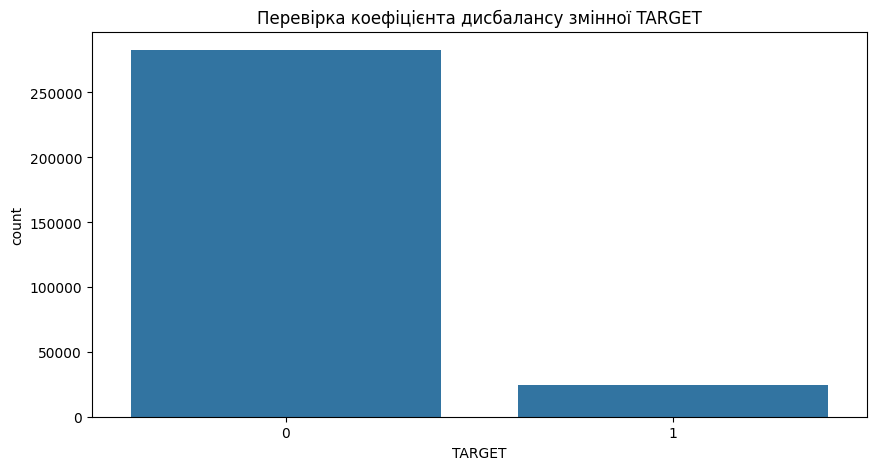

In [235]:
plt.figure(figsize = (10,5))
sns.countplot(x = df['TARGET'], data = df)
plt.title('Перевірка коефіцієнта дисбалансу змінної TARGET')
plt.show()

**Спостереження**

- Ми маємо дисбаланс у змінній `TARGET` на основі % спостережень
 - Значення `TARGET` 1 - це клієнт, який має труднощі з оплатою (прострочення платежу більше ніж на X днів принаймні за одним з перших Y платежів за кредитом). Це лише 8,07% даних
 - Значення `TARGET` 0 - всі інші випадки, окрім 1. Це 91,93% даних

# Розподіл даних на основі `TARGET`

### Створіть новий фрейм даних зі значенням `TARGET` 1
- Значення `TARGET` 1 представляє клієнта з платіжними труднощами (він/вона прострочив платіж більш ніж на X днів принаймні по одному з перших Y платежів за кредитом). Це лише 8,07% даних

In [236]:
df1 = df[df['TARGET'] == 1]

In [237]:
df1.TARGET.value_counts()

TARGET
1    24825
Name: count, dtype: int64

### Створити новий фрейм даних зі значенням `TARGET` 0
- Значення `TARGET` 0 представляє всі інші випадки, крім 1. Це 91.93% даних

In [238]:
df0 = df[df['TARGET'] == 0]

In [239]:
df0.TARGET.value_counts()

TARGET
0    282686
Name: count, dtype: int64

# Одномірний аналіз категоріальних змінних

### Аналіз стовпця `NAME_CONTRACT_TYPE`

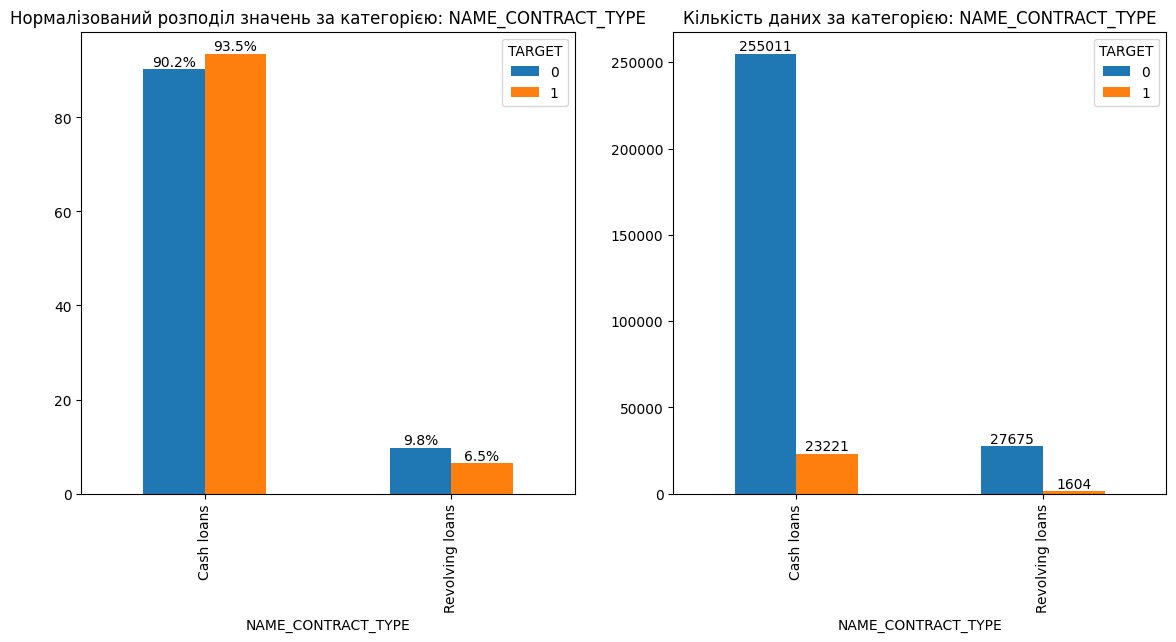

In [240]:
uni_cat_target_compare(df, 'NAME_CONTRACT_TYPE')

**Спостереження**

- Дивлячись на гістограми, ми не бачимо суттєвих відмінностей у `NAME_CONTRACT_TYPE` між клієнтами, які мають труднощі з оплатою, та клієнтами, які платять вчасно

**Висновок**
- Колонка `NAME_CONTRACT_TYPE` не надає жодних переконливих доказів на користь клієнтів, які мають труднощі з оплатою АБО вчасно сплачують

# ДЗ 4. Одновимірний аналіз категоріальної колонки

Проведіть подібний аналіз для колонок
- CODE_GENDER
- FLAG_OWN_CAR
- NAME_INCOME_TYPE

Опціонально
- NAME_EDUCATION_TYPE
- NAME_FAMILY_STATUS


Чи є вплив цих змінних на цільову та який саме?

**Аналіз колонки "CODE_GENDER"**

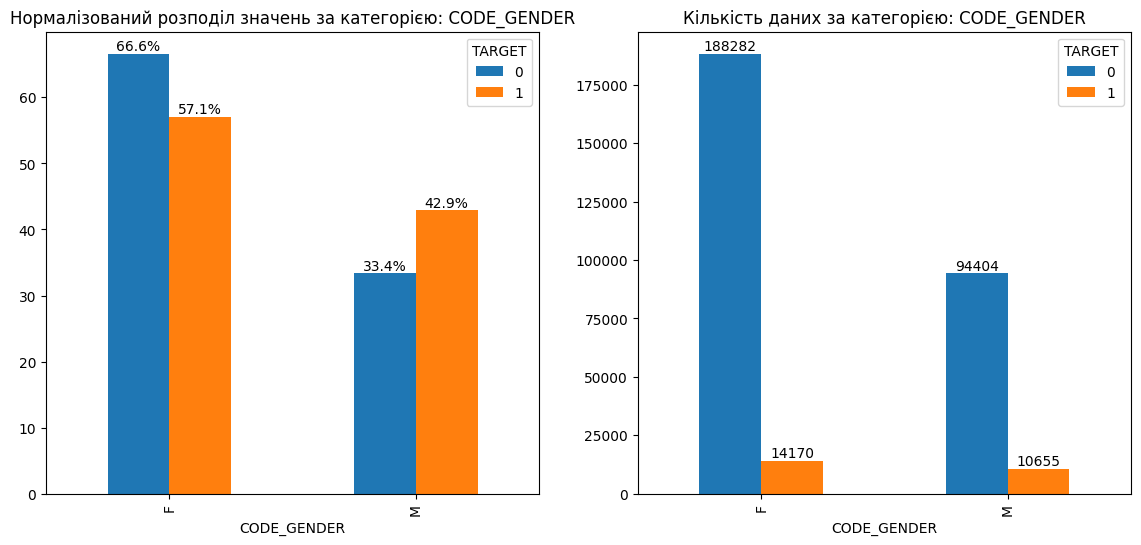

In [241]:
uni_cat_target_compare(df, 'CODE_GENDER')


- З графіку нормалізованого розподілу значень колонки Code Gender бачимо різницю орієнтовно в 10% між клієнтами, що платять вчасно та клієнтами що мають труднощі з оплатою.
- Висновок: На мою думку, ця колонка має вплив на таргет. Тому ця колонка може бути використана для побудови моделі.

**Аналіз колонки "FLAG_OWN_CAR"**

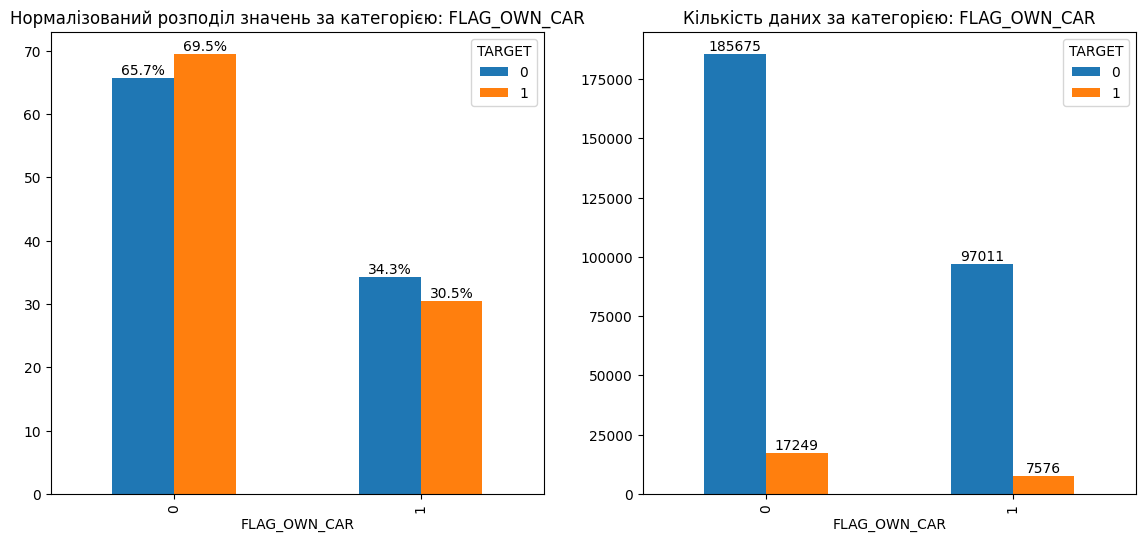

In [242]:
uni_cat_target_compare(df, 'FLAG_OWN_CAR')

**Спостереження**

- Дивлячись на гістограми, ми не бачимо суттєвих відмінностей у `FLAG_OWN_CAR` між клієнтами, які мають труднощі з оплатою, та клієнтами, які платять вчасно

**Висновок**
- Колонка `FLAG_OWN_CAR` не надає жодних переконливих доказів на користь клієнтів, які мають труднощі з оплатою АБО вчасно сплачують

**Аналіз колонки "NAME_INCOME_TYPE"**

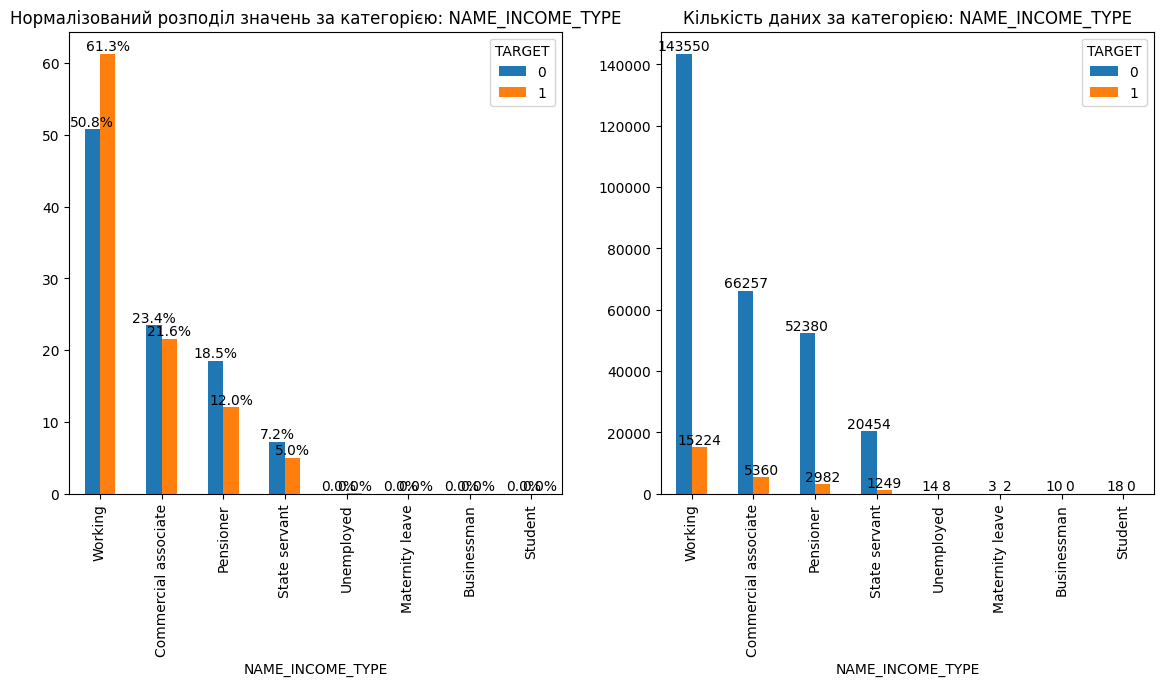

In [243]:
uni_cat_target_compare(df, 'NAME_INCOME_TYPE')

**Спостереження:**
- з огляду графіку гістограми ми бачимо відмінності у NAME_INCOME_TYPE між клієнтами що платять вчасно і  тими,що просрочив платіж. Це чітко видно у групі людей з категорією working, pensioner ( різниця орієнтовно 10%)
- Висновок: ця клонка має вплив на таргет і буде використовуватись у побудові моделі.

# Кореляційний аналіз числових змінних

### Побудова кореляційної матриці для випадків із платіжними труднощами

In [244]:
df1.select_dtypes(include='number').shape

(24825, 68)

Є 67 числових стовпчиків. Створимо кореляційну матрицб `corr` для кращого перегляду результатів

In [245]:
corr_df1 = df1.select_dtypes(include='number').corr()

In [246]:
corr_df1.head()

TARGET  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
TARGET               NaN           NaN              NaN           NaN   
FLAG_OWN_CAR         NaN          1.00             0.02          0.07   
FLAG_OWN_REALTY      NaN          0.02             1.00          0.02   
CNT_CHILDREN         NaN          0.07             0.02          1.00   
AMT_INCOME_TOTAL     NaN          0.02             0.01          0.00   

                  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
TARGET                         NaN         NaN          NaN              NaN   
FLAG_OWN_CAR                  0.02        0.10         0.14             0.10   
FLAG_OWN_REALTY               0.01       -0.01         0.00            -0.02   
CNT_CHILDREN                  0.00       -0.00         0.03            -0.01   
AMT_INCOME_TOTAL              1.00        0.04         0.05             0.04   

                  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
TARGET                                   NaN         NaN            NaN   
FLAG_OWN_CAR                            0.03       -0.07          -0.11   
FLAG_OWN_REALTY                         0.03        0.11           0.06   
CNT_CHILDREN                           -0.03       -0.26          -0.19   
AMT_INCOME_TOTAL                        0.01       -0.00          -0.01   

                  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
TARGET                          NaN              NaN         NaN   
FLAG_OWN_CAR                  -0.07             0.02         NaN   
FLAG_OWN_REALTY                0.01            -0.02         NaN   
CNT_CHILDREN                  -0.15             0.03         NaN   
AMT_INCOME_TOTAL              -0.00             0.00         NaN   

                  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
TARGET                       NaN              NaN               NaN   
FLAG_OWN_CAR                0.11            -0.02              0.00   
FLAG_OWN_REALTY            -0.06            -0.14             -0.01   
CNT_CHILDREN                0.19             0.05              0.00   
AMT_INCOME_TOTAL            0.01            -0.01             -0.00   

                  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
TARGET                   NaN         NaN              NaN   
FLAG_OWN_CAR           -0.00        0.03             0.11   
FLAG_OWN_REALTY        -0.05        0.03             0.03   
CNT_CHILDREN           -0.02        0.01             0.89   
AMT_INCOME_TOTAL       -0.00        0.01             0.01   

                  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
TARGET                             NaN                          NaN   
FLAG_OWN_CAR                     -0.01                        -0.01   
FLAG_OWN_REALTY                  -0.01                        -0.01   
CNT_CHILDREN                      0.04                         0.04   
AMT_INCOME_TOTAL                 -0.02                        -0.02   

                  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
TARGET                                NaN                         NaN   
FLAG_OWN_CAR                         0.01                       -0.00   
FLAG_OWN_REALTY                     -0.12                       -0.05   
CNT_CHILDREN                        -0.02                       -0.02   
AMT_INCOME_TOTAL                     0.01                        0.01   

                  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
TARGET                                   NaN                          NaN   
FLAG_OWN_CAR                            0.02                         0.02   
FLAG_OWN_REALTY                        -0.04                        -0.02   
CNT_CHILDREN                           -0.02                        -0.01   
AMT_INCOME_TOTAL                        0.01                         0.01   

                  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
TARGET                               NaN       

Перегляд повної кореляційної матриці

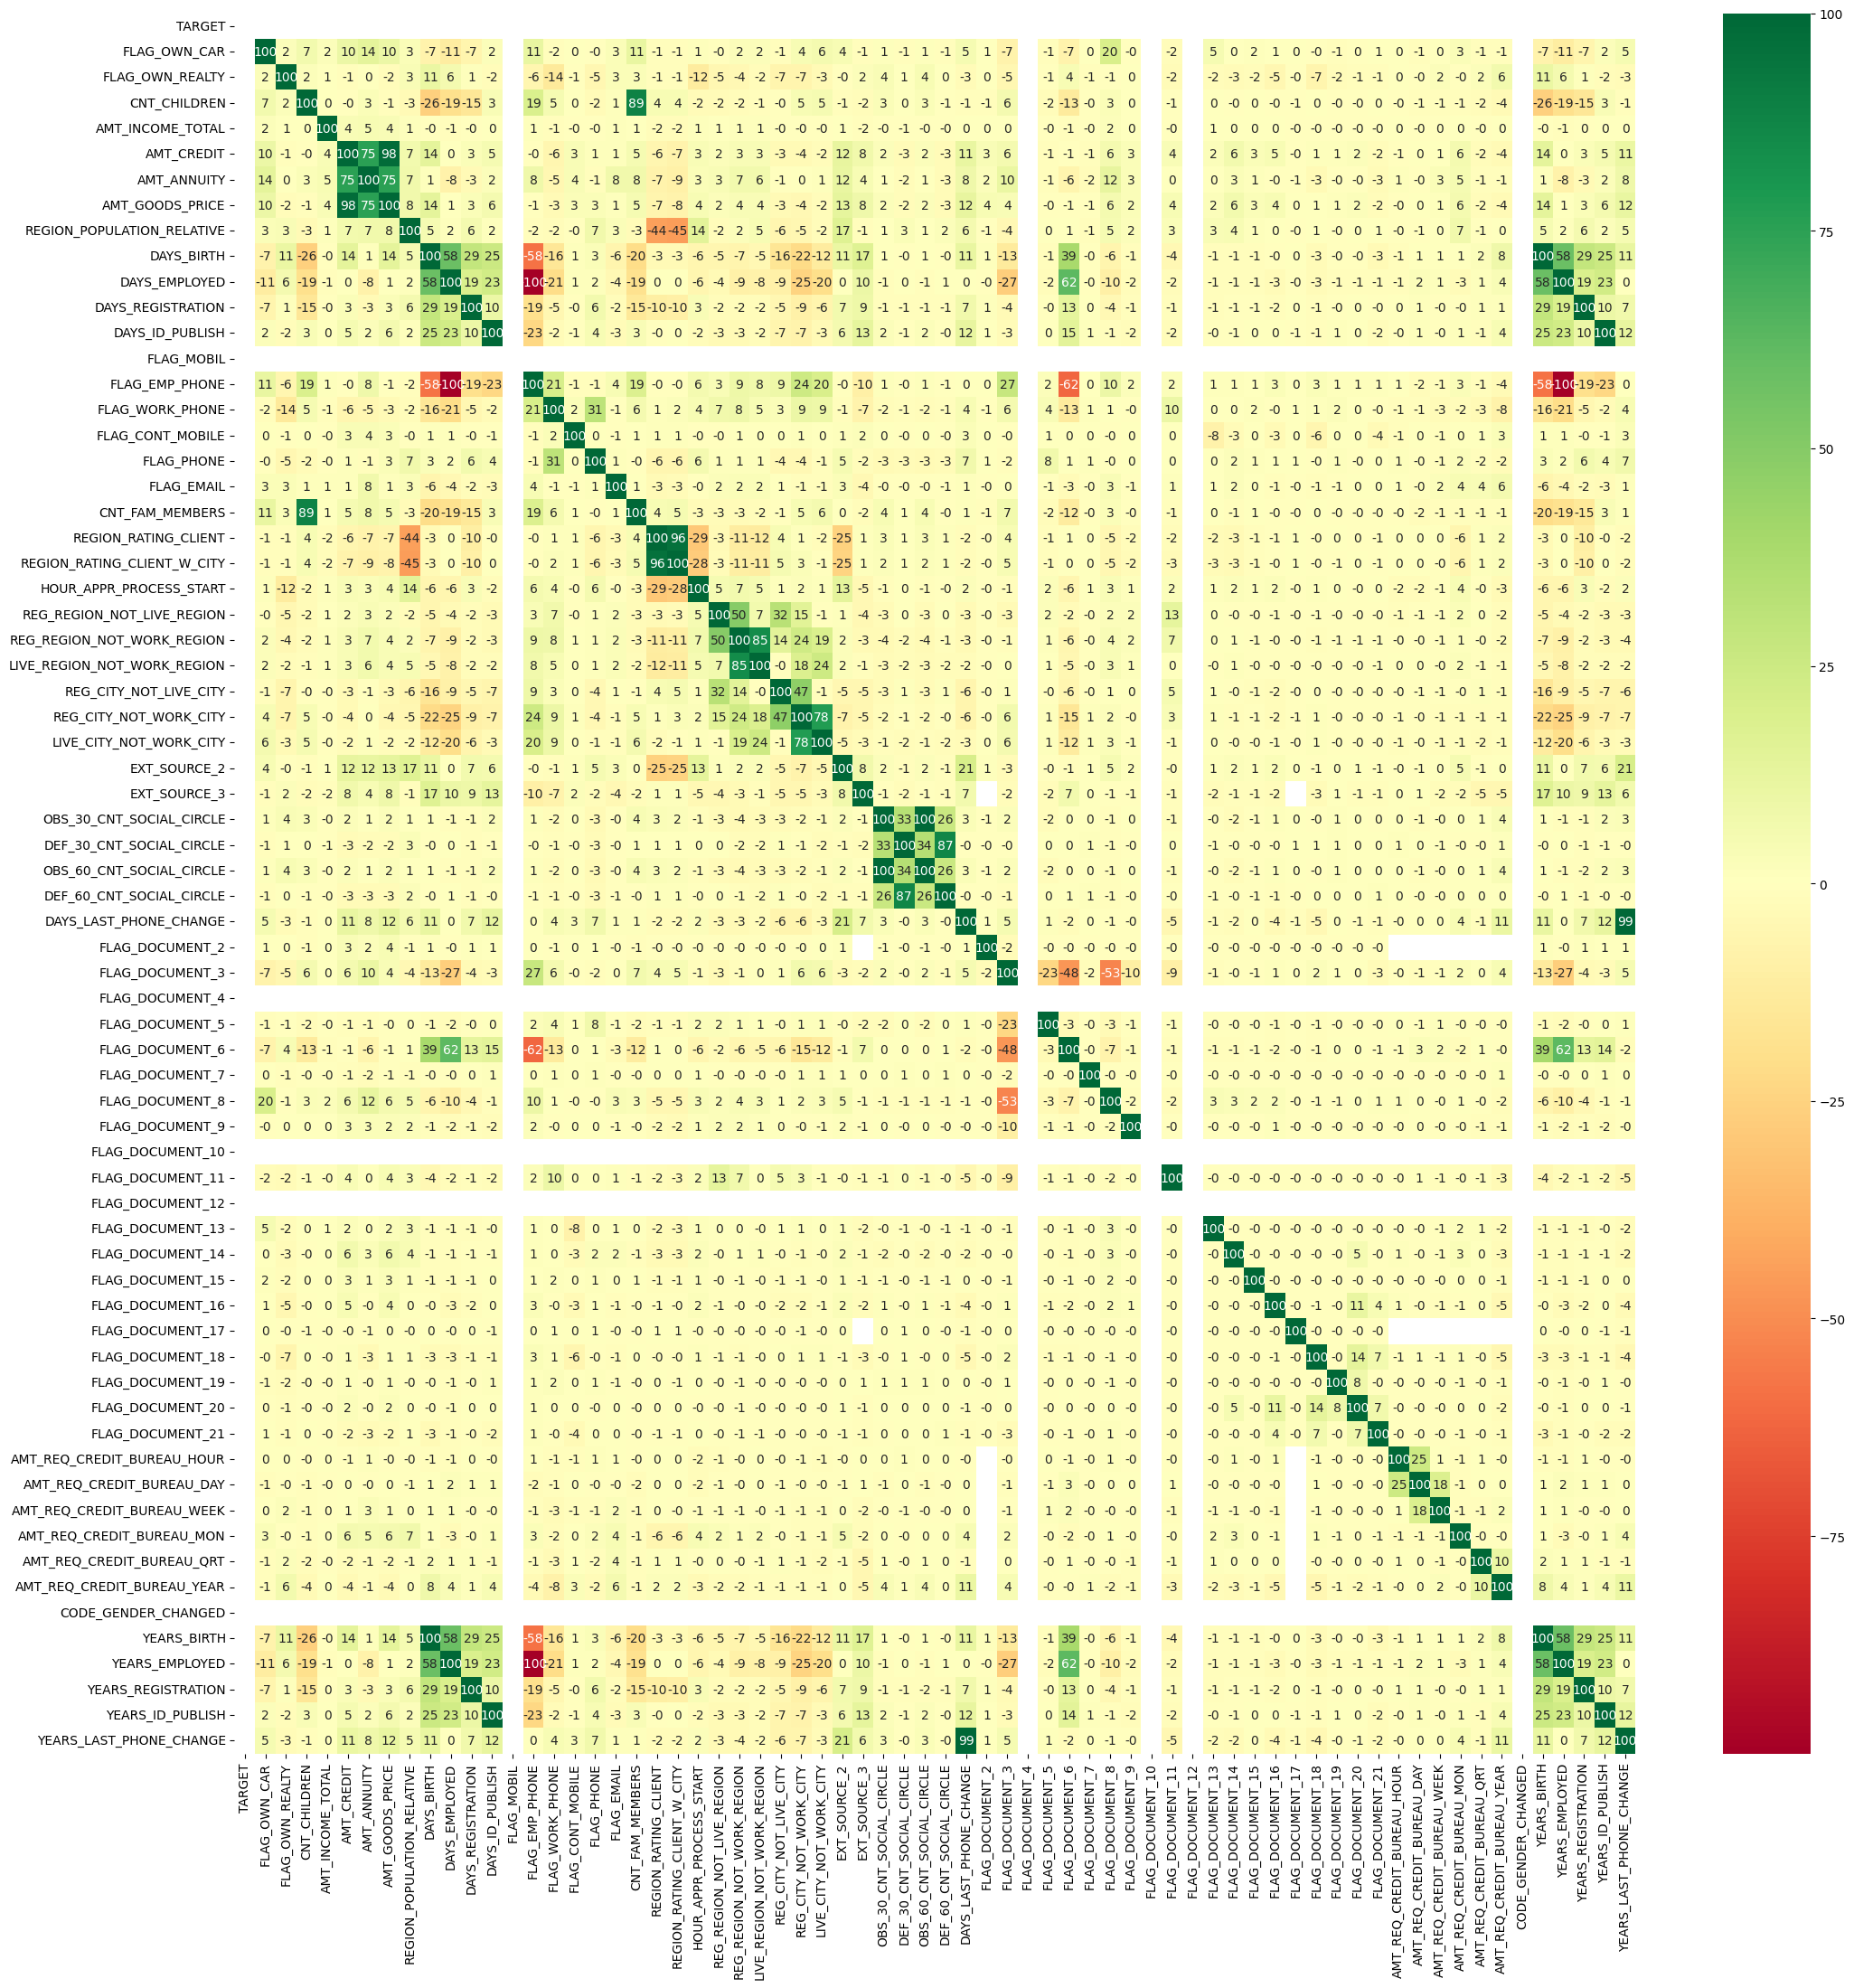

In [247]:
plt.figure(figsize = (25,25))
sns.heatmap(data = corr_df1*100, annot = True, cmap = "RdYlGn", cbar = True, fmt='.0f')
plt.show()

Створимо теплову карту для перегляду кореляцій вище 80% і 99,99%

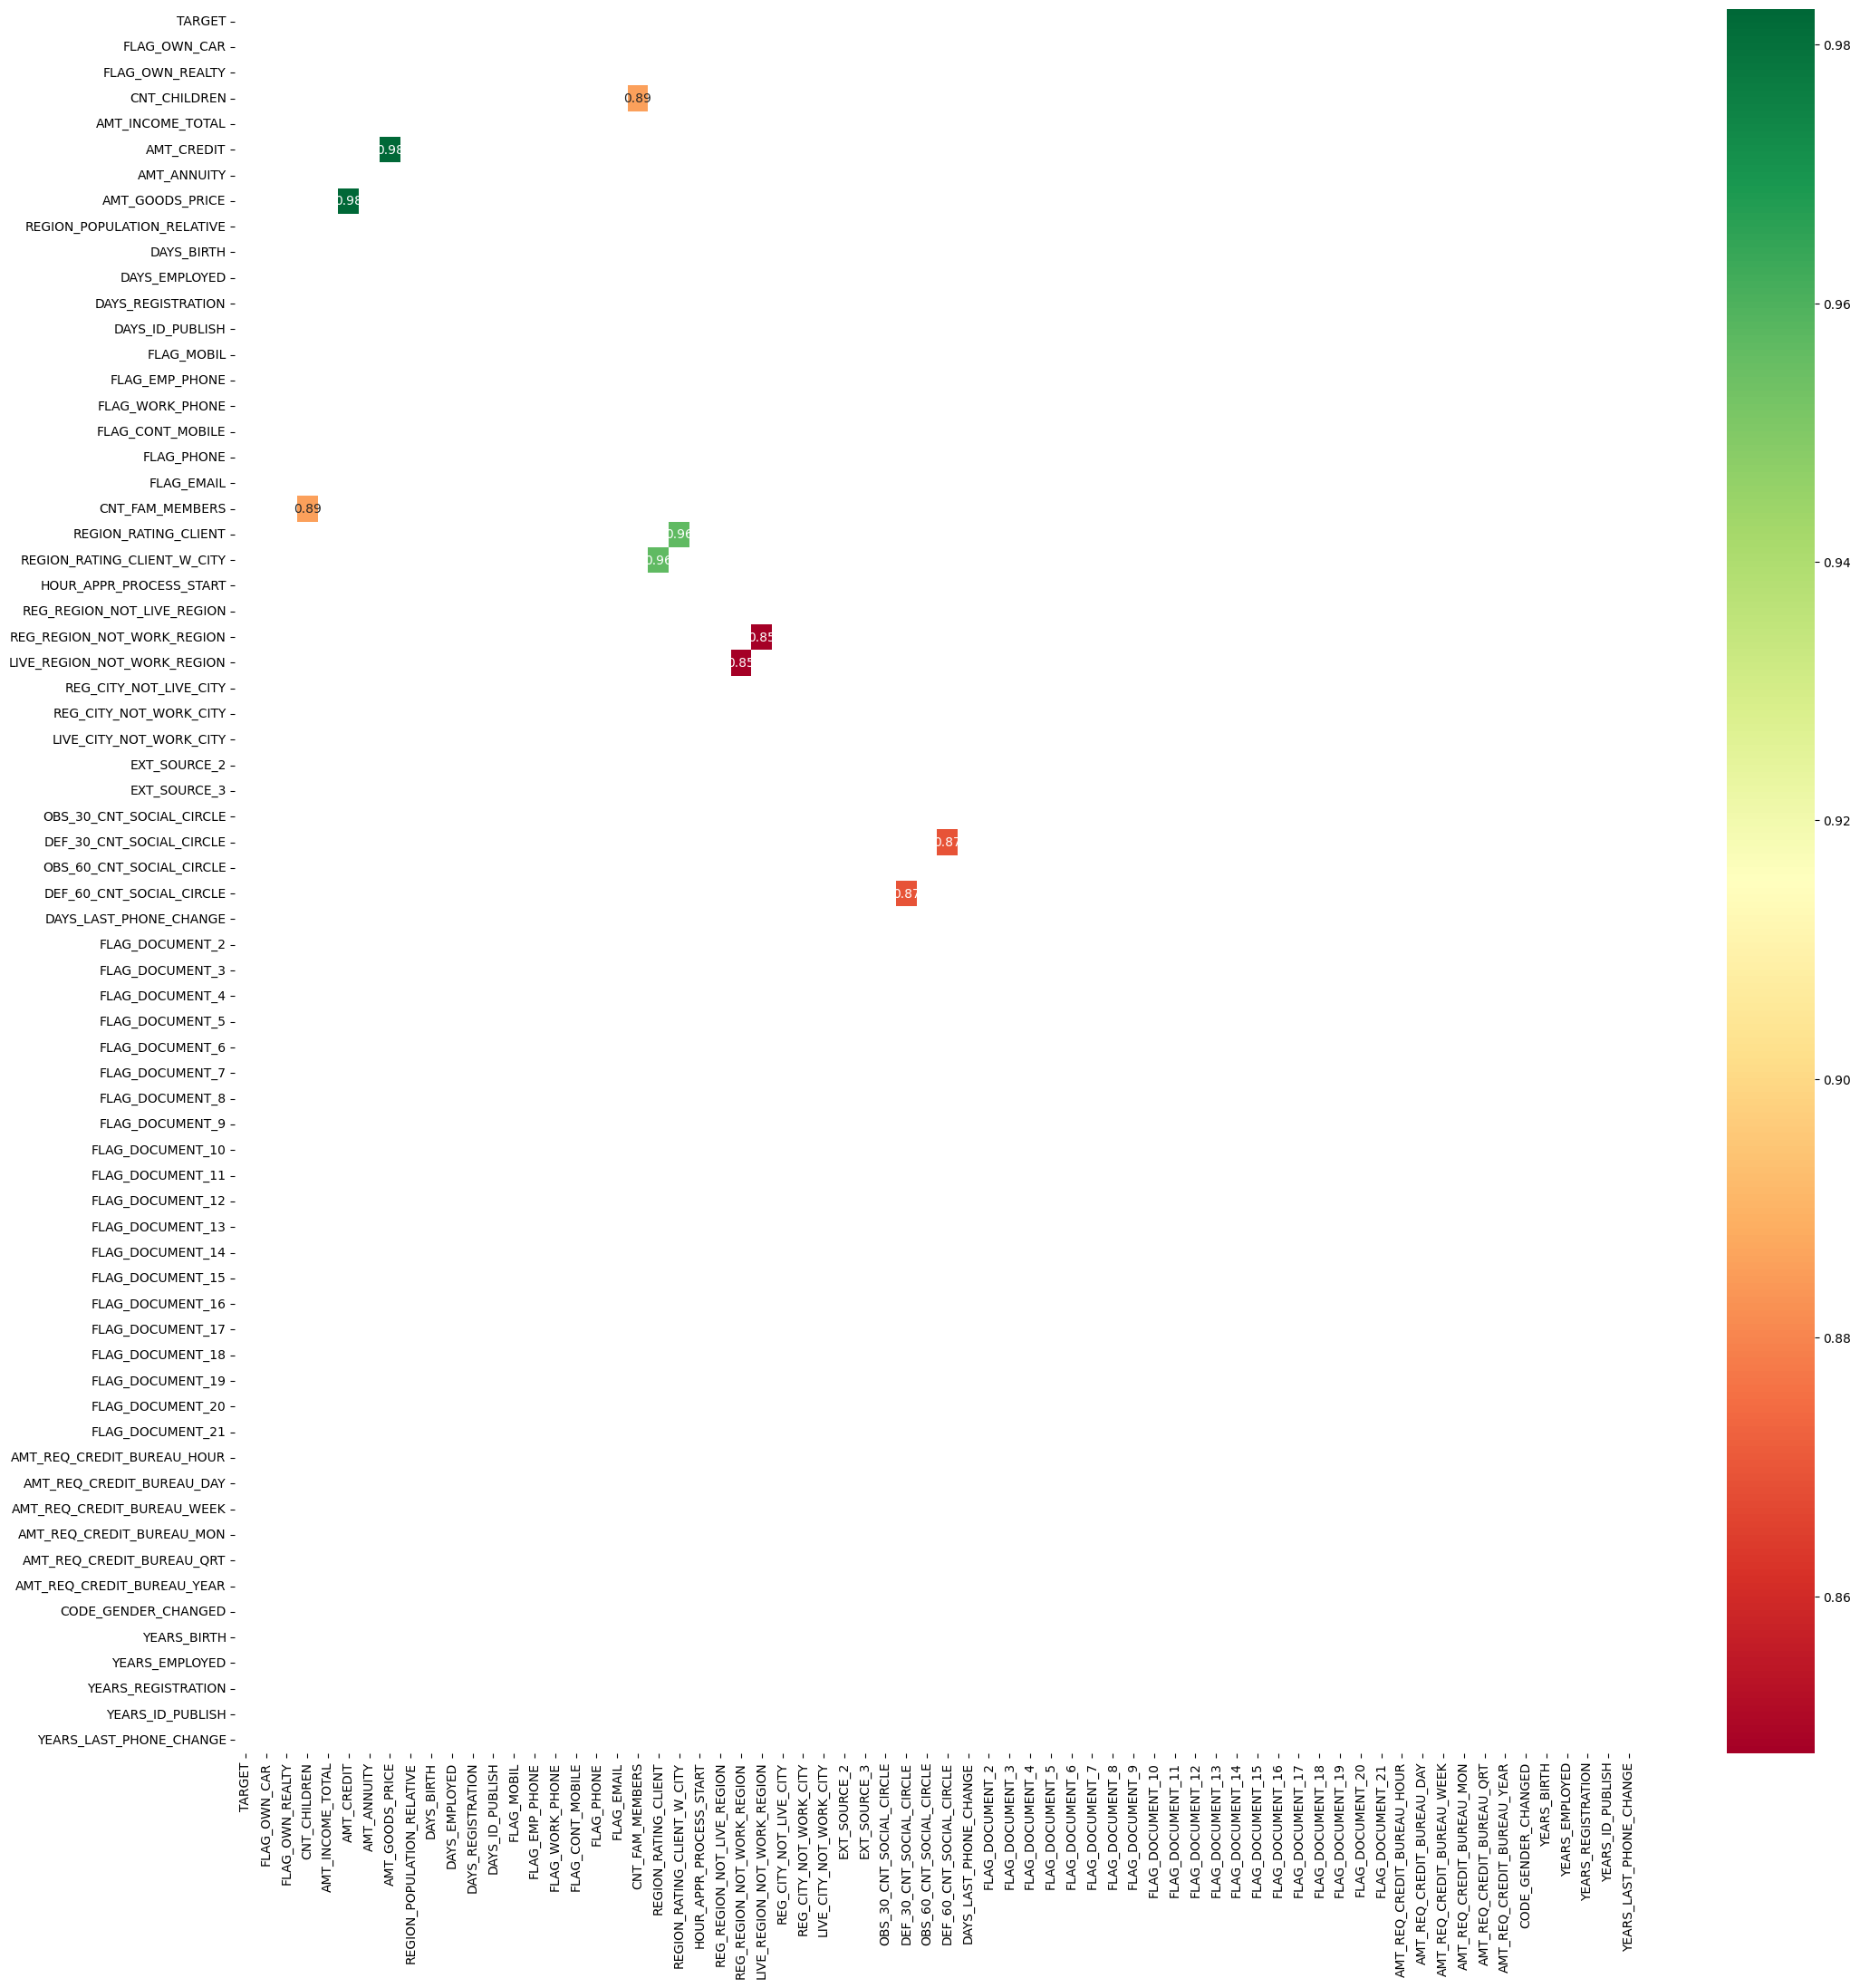

In [248]:
plt.figure(figsize = (25,25))
sns.heatmap(data = corr_df1[(corr_df1 >= 0.8) & (corr_df1 < 0.99)], annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
plt.show()

### Подивимось на 10 найкращих кореляцій для випадків із платіжними труднощами

In [249]:
corr_df1[corr_df1 <= 0.99].unstack().sort_values(ascending = False).head(22)

AMT_CREDIT                   AMT_GOODS_PRICE               0.98
AMT_GOODS_PRICE              AMT_CREDIT                    0.98
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY   0.96
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          0.96
CNT_CHILDREN                 CNT_FAM_MEMBERS               0.89
CNT_FAM_MEMBERS              CNT_CHILDREN                  0.89
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE      0.87
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE      0.87
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.85
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION   0.85
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY       0.78
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY        0.78
AMT_GOODS_PRICE              AMT_ANNUITY                   0.75
AMT_ANNUITY                  AMT_GOODS_PRICE               0.75
                             AMT_CREDIT                    0.75
AMT_CREDIT                   AMT_ANNUITY

Оскільки у нас є комбінації, що повторюються, дивлячись на наведену вище таблицю і видаляючи дублі, ми отримуємо топ-10 кореляцій, як показано нижче:

- AMT_GOODS_PRICE -              AMT_CREDIT                    0.98
- REGION_RATING_CLIENT -         REGION_RATING_CLIENT_W_CITY   0.96
- CNT_FAM_MEMBERS -              CNT_CHILDREN                  0.89
- DEF_60_CNT_SOCIAL_CIRCLE -     DEF_30_CNT_SOCIAL_CIRCLE      0.87
- REG_REGION_NOT_WORK_REGION -   LIVE_REGION_NOT_WORK_REGION   0.85
- LIVE_CITY_NOT_WORK_CITY -      REG_CITY_NOT_WORK_CITY        0.78
- AMT_ANNUITY -                  AMT_GOODS_PRICE               0.75
- AMT_ANNUITY -                  AMT_CREDIT                    0.75
- DAYS_EMPLOYED -                FLAG_DOCUMENT_6               0.62
- DAYS_BIRTH -                   DAYS_EMPLOYED                 0.58

### Побудова кореляційної матриці для випадків із вчасними платежеми

In [250]:
df0.select_dtypes(include='number').shape

(282686, 68)

Є 67 числових стовпчиків. Створимо кореляційну матрицю `corr` для кращого перегляду результатів

In [251]:
corr_df0 = df0.select_dtypes(include='number').corr()

In [252]:
corr_df0.head(10)

TARGET  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
TARGET                         NaN           NaN              NaN   
FLAG_OWN_CAR                   NaN          1.00            -0.01   
FLAG_OWN_REALTY                NaN         -0.01             1.00   
CNT_CHILDREN                   NaN          0.11            -0.00   
AMT_INCOME_TOTAL               NaN          0.18             0.00   
AMT_CREDIT                     NaN          0.12            -0.04   
AMT_ANNUITY                    NaN          0.14            -0.01   
AMT_GOODS_PRICE                NaN          0.12            -0.05   
REGION_POPULATION_RELATIVE     NaN          0.04             0.01   
DAYS_BIRTH                     NaN         -0.14             0.12   

                            CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
TARGET                               NaN               NaN         NaN   
FLAG_OWN_CAR                        0.11              0.18        0.12   
FLAG_OWN_REALTY                    -0.00              0.00       -0.04   
CNT_CHILDREN                        1.00              0.03        0.00   
AMT_INCOME_TOTAL                    0.03              1.00        0.34   
AMT_CREDIT                          0.00              0.34        1.00   
AMT_ANNUITY                         0.02              0.42        0.77   
AMT_GOODS_PRICE                    -0.00              0.35        0.99   
REGION_POPULATION_RELATIVE         -0.02              0.17        0.10   
DAYS_BIRTH                         -0.34             -0.06        0.05   

                            AMT_ANNUITY  AMT_GOODS_PRICE  \
TARGET                              NaN              NaN   
FLAG_OWN_CAR                       0.14             0.12   
FLAG_OWN_REALTY                   -0.01            -0.05   
CNT_CHILDREN                       0.02            -0.00   
AMT_INCOME_TOTAL                   0.42             0.35   
AMT_CREDIT                         0.77             0.99   
AMT_ANNUITY                        1.00             0.78   
AMT_GOODS_PRICE                    0.78             1.00   
REGION_POPULATION_RELATIVE         0.12             0.10   
DAYS_BIRTH                        -0.01             0.04   

                            REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
TARGET                                             NaN         NaN   
FLAG_OWN_CAR                                      0.04       -0.14   
FLAG_OWN_REALTY                                   0.01        0.12   
CNT_CHILDREN                                     -0.02       -0.34   
AMT_INCOME_TOTAL                                  0.17       -0.06   
AMT_CREDIT                                        0.10        0.05   
AMT_ANNUITY                                       0.12       -0.01   
AMT_GOODS_PRICE                                   0.10        0.04   
REGION_POPULATION_RELATIVE                        1.00        0.03   
DAYS_BIRTH                                        0.03        1.00   

                            DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
TARGET                                NaN                NaN              NaN   
FLAG_OWN_CAR                        -0.16              -0.09            -0.02   
FLAG_OWN_REALTY                      0.07               0.03            -0.01   
CNT_CHILDREN                        -0.25              -0.19             0.03   
AMT_INCOME_TOTAL                    -0.14              -0.06            -0.02   
AMT_CREDIT                          -0.07              -0.01             0.00   
AMT_ANNUITY                         -0.10              -0.04            -0.01   
AMT_GOODS_PRICE                     -0.07              -0.02             0.00   
REGION_POPULATION_RELATIVE          -0.01               0.05             0.00   
DAYS_BIRTH                           0.63               0.33             0.27   

                            FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
TARGET                             NaN             NaN

Створимо теплову карту для перегляду кореляцій вище 80% і 99,99%

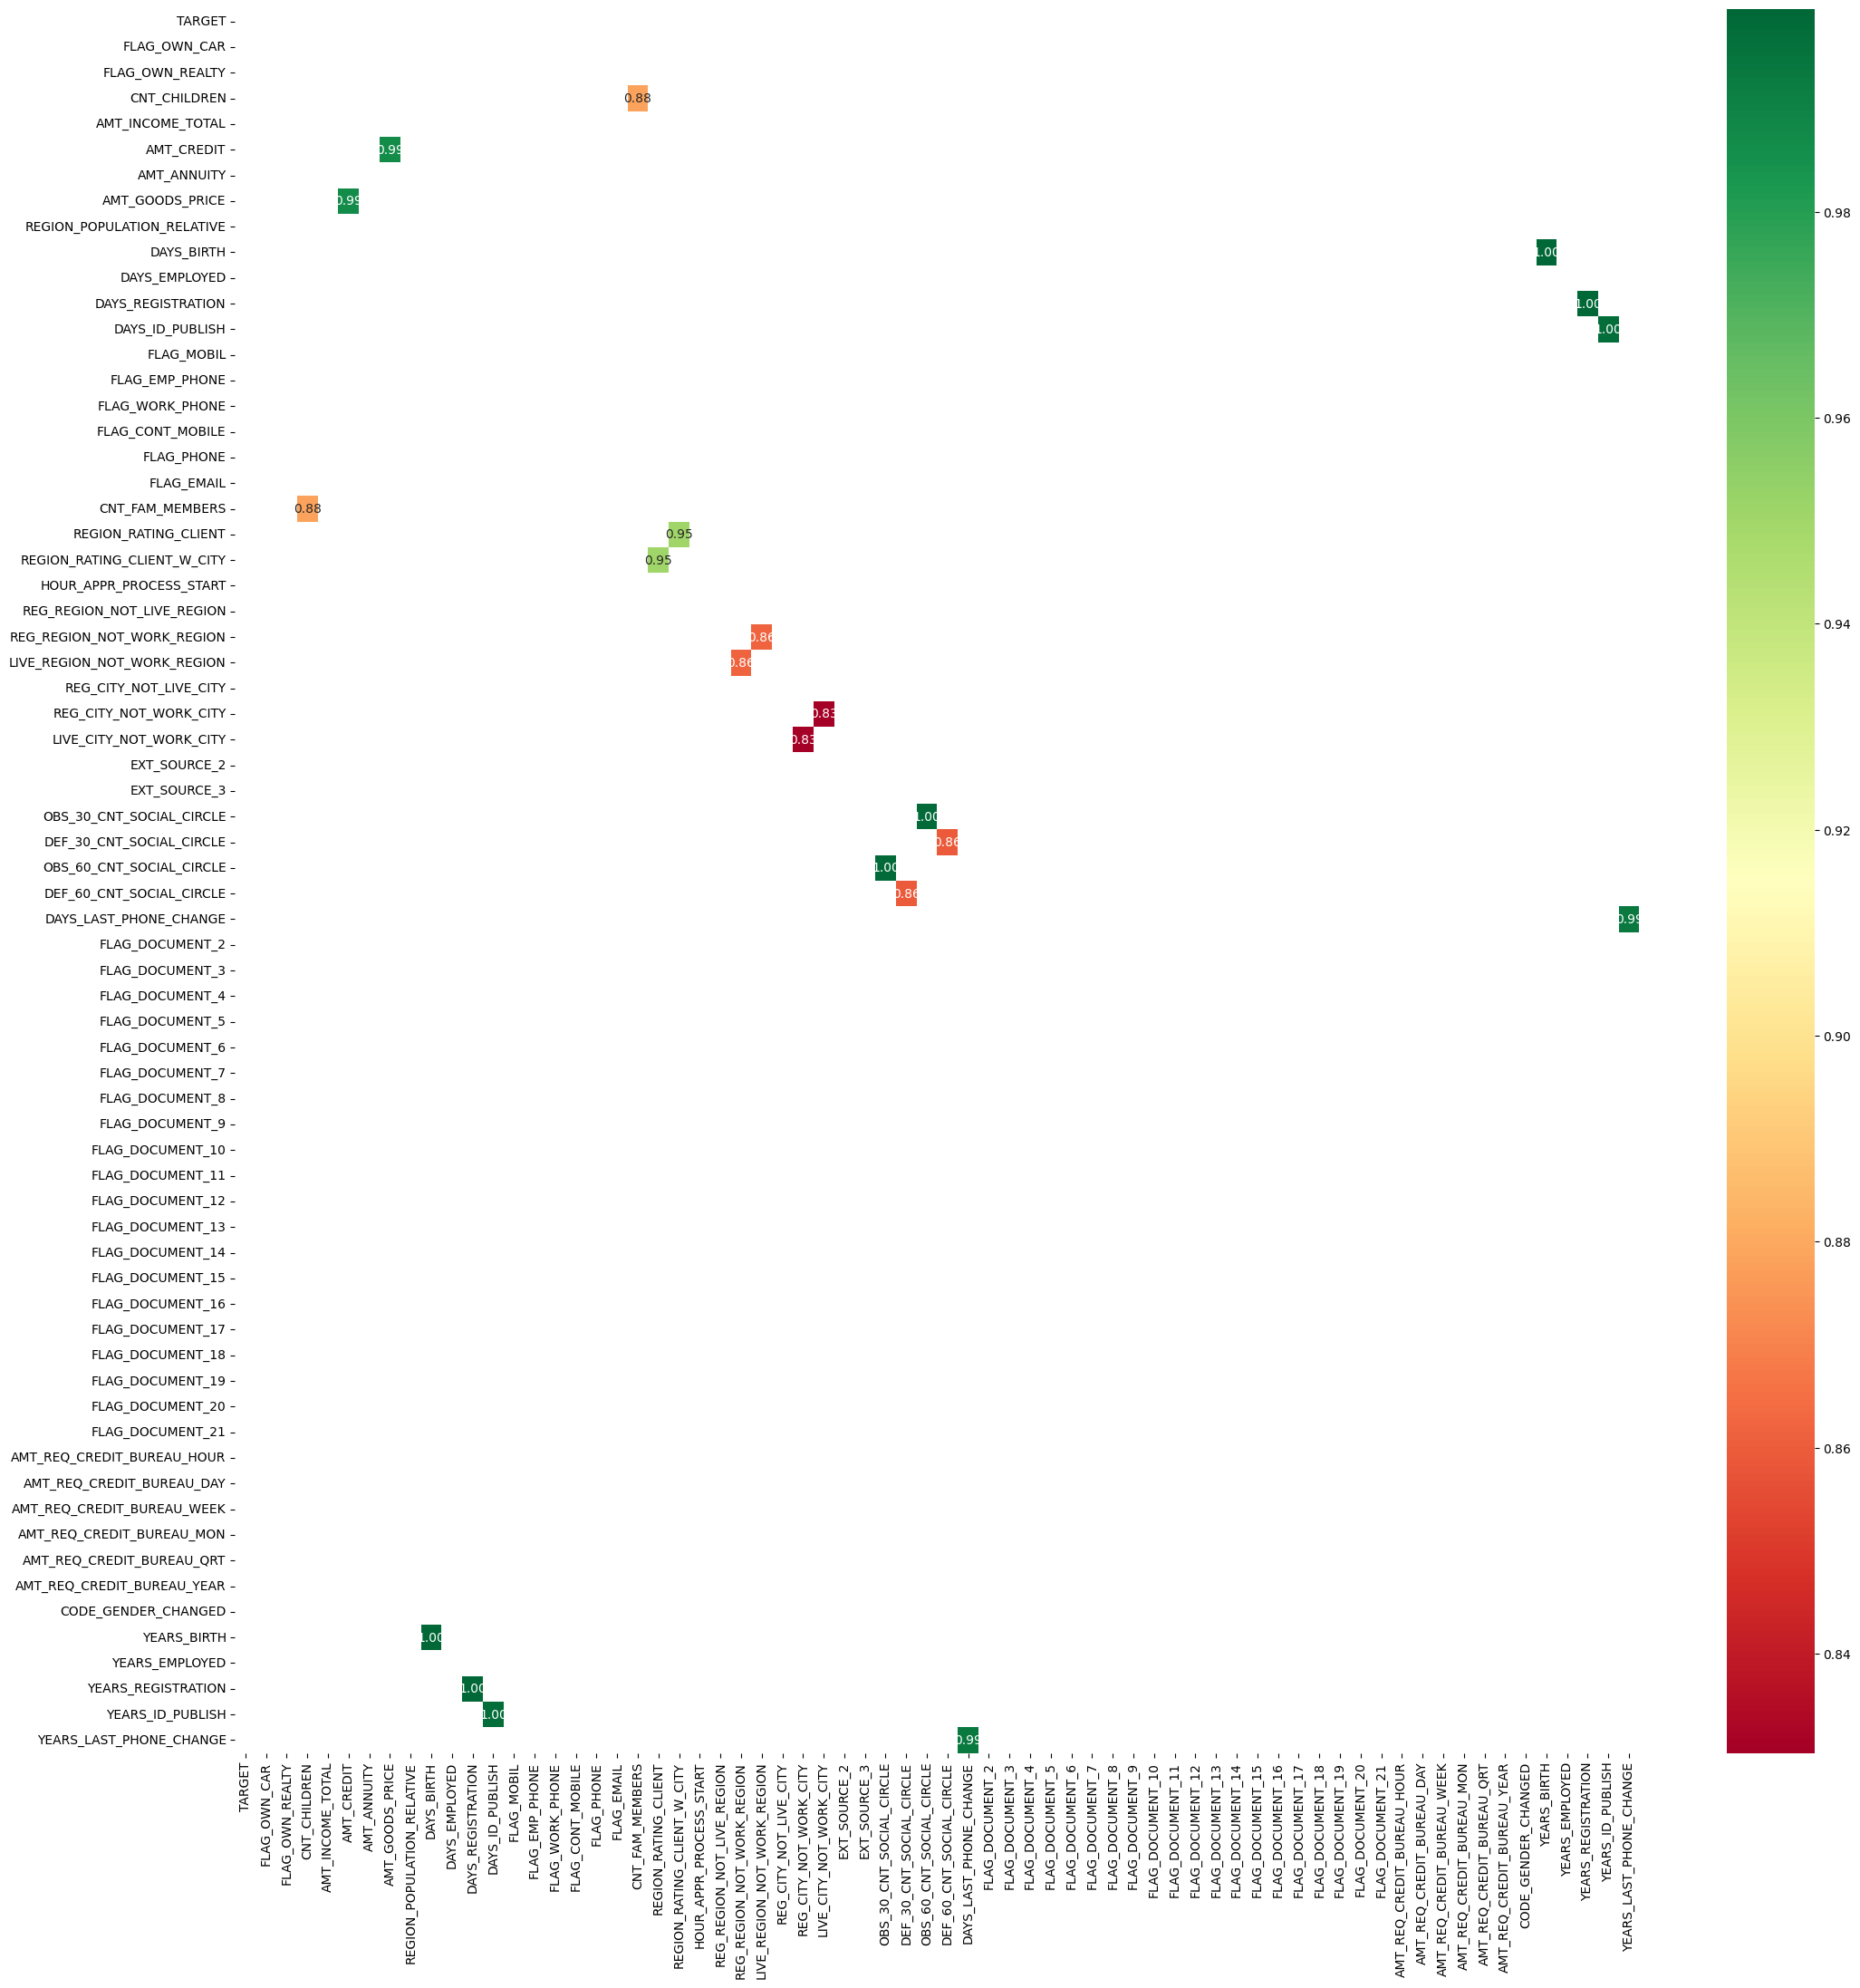

In [253]:
plt.figure(figsize = (25,25))
sns.heatmap(data = corr_df0[(corr_df0 >= 0.8) & (corr_df0 < 0.9999)], annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
plt.show()

### Подивимось на 10 найкращих кореляцій для вчасних платежів

In [254]:
corr_df0[corr_df0 <= 0.99].unstack().sort_values(ascending = False).head(28)

AMT_GOODS_PRICE              AMT_CREDIT                    0.99
AMT_CREDIT                   AMT_GOODS_PRICE               0.99
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          0.95
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY   0.95
CNT_CHILDREN                 CNT_FAM_MEMBERS               0.88
CNT_FAM_MEMBERS              CNT_CHILDREN                  0.88
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION   0.86
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.86
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE      0.86
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE      0.86
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY        0.83
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY       0.83
AMT_ANNUITY                  AMT_GOODS_PRICE               0.78
AMT_GOODS_PRICE              AMT_ANNUITY                   0.78
AMT_CREDIT                   AMT_ANNUITY                   0.77
AMT_ANNUITY                  AMT_CREDIT 

Оскільки у нас є комбінації, що повторюються, дивлячись на наведену вище таблицю і видаляючи дублі, ми отримуємо топ-10 кореляцій, як показано нижче:

- AMT_GOODS_PRICE              AMT_CREDIT                    0.99
- REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY   0.95
- CNT_FAM_MEMBERS              CNT_CHILDREN                  0.88
- REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION   0.86
- DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE      0.86
- LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY        0.83
- AMT_ANNUITY                  AMT_GOODS_PRICE               0.78
- AMT_ANNUITY                  AMT_CREDIT                    0.77
- DAYS_BIRTH                   DAYS_EMPLOYED                 0.63
- DAYS_EMPLOYED                FLAG_DOCUMENT_6               0.60

### Порівняємо 10 найкращих кореляцій між випадками із платіжними труднощами та вчасними платежами

**Спостереження**

- Топ-10 кореляцій для Труднощів з оплатою та Вчасних платежів однакові, за винятком незначних відмінностей у відсотках кореляції
- Найвища кореляція для комбінації `AMT_GOODS_PRICE` та `AMT_CREDIT`.
- Для набору даних "Труднощі з оплатою" кореляція між `AMT_GOODS_PRICE` та `AMT_CREDIT` становить 0,98
- Для набору даних "Вчасні платежі" кореляція між `AMT_GOODS_PRICE` та `AMT_CREDIT` становить 0,99

# Одновимірний аналіз числових змінних

### Аналіз стовпця `AMT_CREDIT`

#### Пошук викидів в `AMT_CREDIT` при випадках із платіжними труднощами

Розрахунок IQR (Inter Quartile range)

In [255]:
Q1 = df1['AMT_CREDIT'].quantile(0.25)
Q3 = df1['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

448915.5


Значення *до* (Q1 - 1.5 * IQR) та *після* (Q3 + 1.5 * IQR) є викидами.

In [256]:
Min_value1 = (Q1 - 1.5 * IQR)
Max_value1 = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value1))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value1))

Мінімальне значення, до якого існують викиди: -388973.25
Максимальне значення, після якого існують викиди: 1406688.75


#### Пошук викидів в `AMT_CREDIT` при випадках із вчасними оплатами

Розрахунок IQR (Inter Quartile range)

In [257]:
Q1 = df0['AMT_CREDIT'].quantile(0.25)
Q3 = df0['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

540000.0


Значення *до* (Q1 - 1.5 * IQR) та *після* (Q3 + 1.5 * IQR) є викидами.

In [258]:
Min_value0 = (Q1 - 1.5 * IQR)
Max_value0 = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value0))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value0))

Мінімальне значення, до якого існують викиди: -540000.0
Максимальне значення, після якого існують викиди: 1620000.0


Видалення викидів і побудова діаграми розподілу

In [259]:
def kde_no_outliers(df0, df1, Max_value0, Max_value1, column):
  plt.figure(figsize = (14,6))
  sns.kdeplot(df1[df1[column] <= Max_value1][column],label = 'Payment difficulties')
  sns.kdeplot(df0[df0[column] <= Max_value0][column],label = 'On-Time Payments')
  plt.ticklabel_format(style='plain', axis='x')
  plt.xticks(rotation = 45)
  plt.legend()
  plt.show()

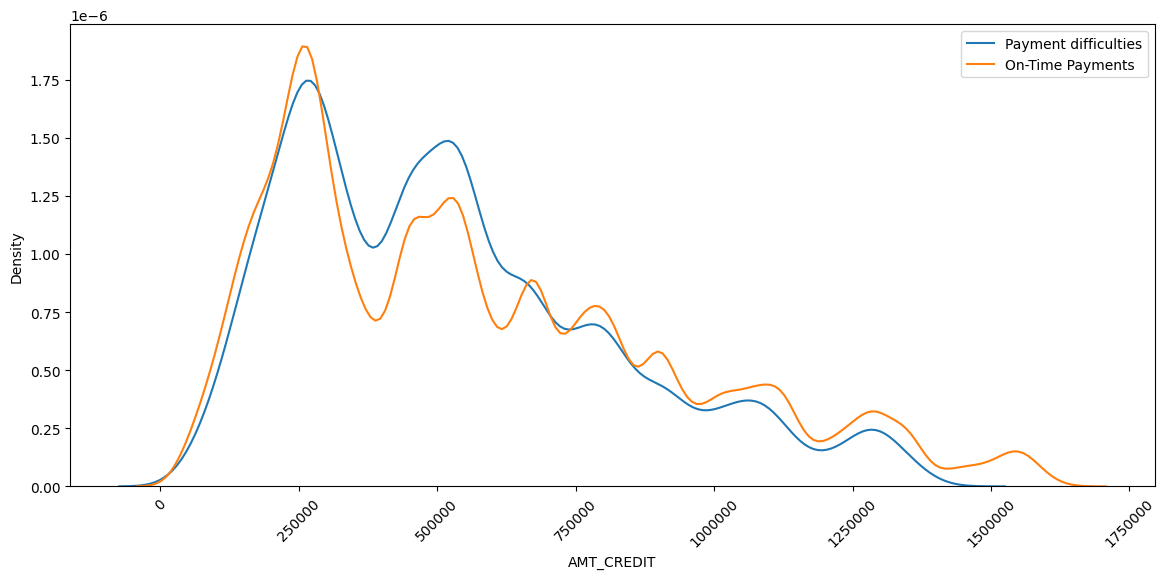

In [260]:
kde_no_outliers(df0, df1, Max_value0, Max_value1, 'AMT_CREDIT')

**Спостереження**

- Для `AMT_CREDIT` від 250000 до приблизно 650000 більше клієнтів мають труднощі з оплатою
- Для `AMT_CREDIT` > 750000 більше клієнтів, які вчасно здійснюють платежі

# ДЗ 5. Одновимірний аналіз числової колонки

 Проведіть подібний до прикладу одновимірний аналіз (виявлення викидів, їх усунення та побудова KDE  графіку) для числових змінних
- `YEARS_BIRTH`
- `AMT_GOODS_PRICE`
- `DAYS_EMPLOYED`

Опціонально
- `CNT_CHILDREN`
- `AMT_INCOME_TOTAL`

Для цього винесіть функціонал для аналізу у функцію та викличіть функцію для кожної двійки змінних.

Зробіть висновки з аналізу.

**Аналіз клонки "YEARS_BIRTH"**

In [261]:
Max_value1=outlier_range(df1,'YEARS_BIRTH' )
Max_value1

76.0

In [262]:
Max_value0=outlier_range(df0,'YEARS_BIRTH' )
Max_value0

84.0

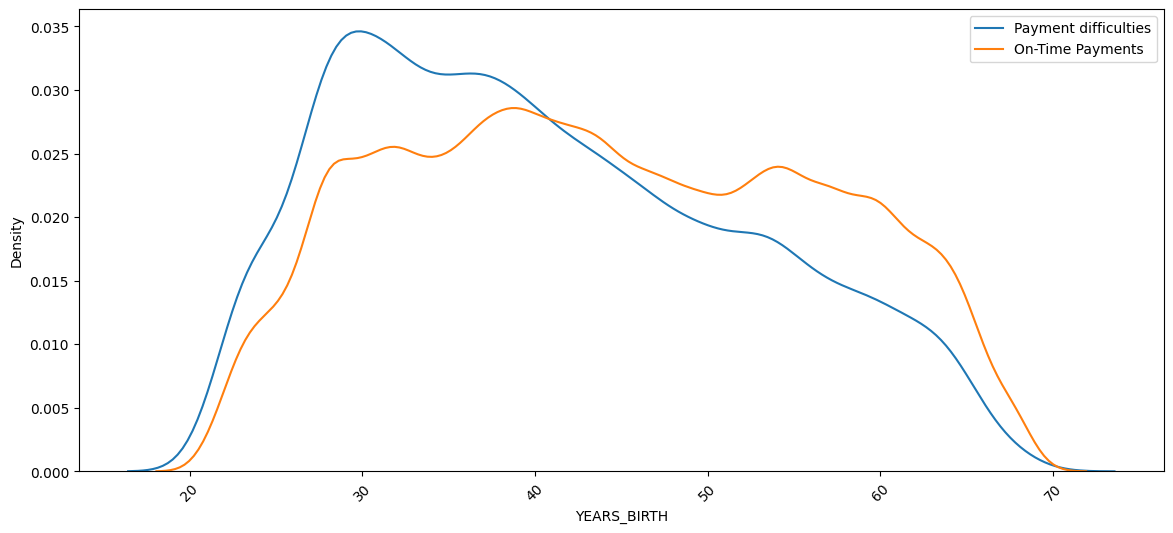

In [263]:
 kde_no_outliers(df0, df1, Max_value0, Max_value1,'YEARS_BIRTH' )

**Спостереження:**
- Для колонки YEARS_BIRTH більше клієнтів мають труднощі з оплатою кредиту у  віці в діапазоні 20-42 роки.
- серед клієнтів  віком від 42 до 70, більше тих, які вчасно сплачують кредит


**Аналіз колонки "AMT_GOODS_PRICE"**

In [264]:
Max_value1=outlier_range(df1,'AMT_GOODS_PRICE' )
Max_value1

1329750.0

In [265]:
Max_value0=outlier_range(df0,'AMT_GOODS_PRICE' )
Max_value0

1354755.9375

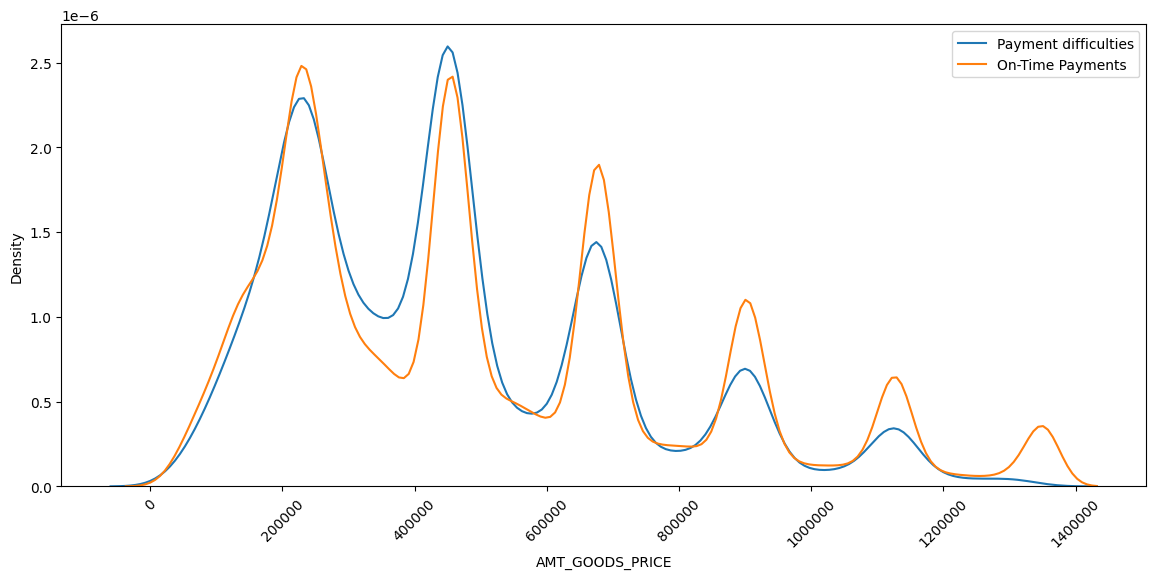

In [266]:
kde_no_outliers(df0, df1, Max_value0, Max_value1,'AMT_GOODS_PRICE' )

**Спостереження**:
- клієнтів,які невчасно сплачуюють кредити більше, де ціна товару на який дається кредит знаходиться в проміжку між 250000 та 550000
- Спостерієгаємо підйоми на графіках орієнтовно у точках,де ціна товару на який дається креди дорівнює : 700000, 9000000, 1 млн 100 тис, 1млн 300 тис  В цих точках клієнтів,які вчасно платять за кредит більше.

**Аналіз колонки "DAYS_EMPLOYED"**

In [267]:
Max_value1=outlier_range(df1,'DAYS_EMPLOYED' )
Max_value1

7184.5

In [268]:
Max_value0=outlier_range(df0,'DAYS_EMPLOYED' )
Max_value0

13734.5

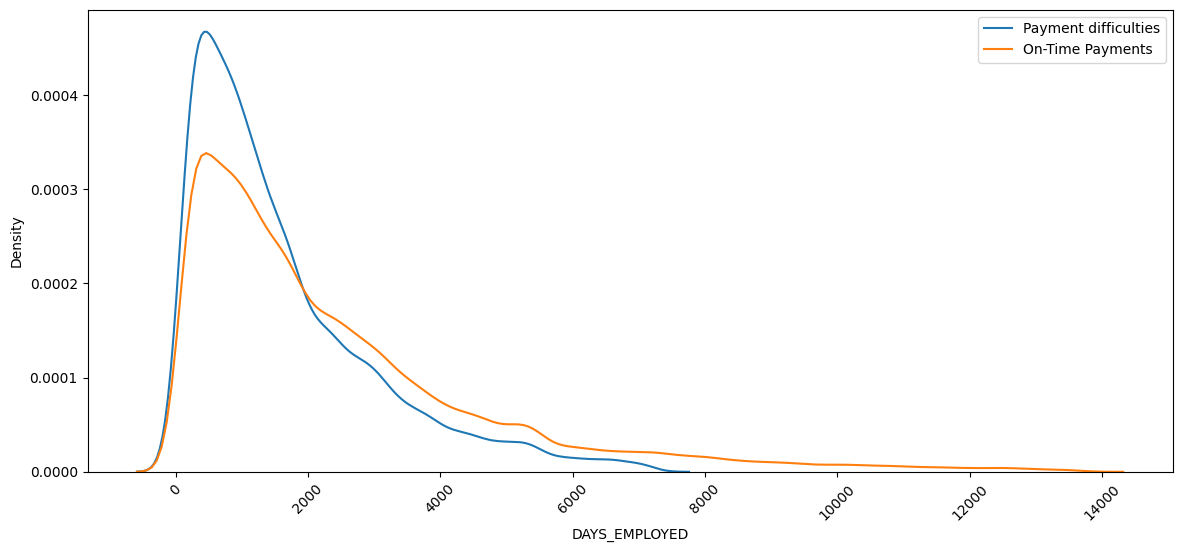

In [269]:
kde_no_outliers(df0, df1, Max_value0, Max_value1,'DAYS_EMPLOYED' )

**Спостереження:**
- клієнти,які термін працевлаштуванння яких знаходиться в проміжку від 0 до 2100 днів (орієнтовно 5.7 років) і не виплачують кредити вчасно більше, ніж тих що вплачують вчасно.
- серед клієнтів,які працевлаштовані більше ніж 2100 днів ( 5.7 років) більше тих,які виплачують кредит вчасно.
- клієнти які працевлаштовані більше ніж 8000 днів ( 21.9 рік) виплачуюють кредит вчасно.

# Двовимірний/Багатовимірний аналіз

## Неперервні vs неперервні змінні

### Аналіз стовпця `AMT_GOODS_PRICE` vs `AMT_CREDIT`

**Пошук викидів для ствопця `AMT_GOODS_PRICE ` для групи із платіжними труднощами**

In [270]:
max_value1_AMT_GOODS_PRICE = outlier_range(df1,'AMT_GOODS_PRICE')
max_value1_AMT_GOODS_PRICE

1329750.0

**Пошук викидів для ствопця `AMT_CREDIT` для групи із платіжними труднощами**

In [271]:
max_value1_AMT_CREDIT = outlier_range(df1,'AMT_CREDIT')
max_value1_AMT_CREDIT

1406688.75

**Пошук викидів для `AMT_GOODS_PRICE `для групи із вчасними оплатами**

In [272]:
max_value0_AMT_GOODS_PRICE = outlier_range(df0,'AMT_GOODS_PRICE')
max_value0_AMT_GOODS_PRICE

1354755.9375

**Пошук викидів для `AMT_CREDIT `для групи із вчасними оплатами**

In [273]:
max_value0_AMT_CREDIT = outlier_range(df0,'AMT_CREDIT')
max_value0_AMT_CREDIT

1620000.0

Побудова діаграми розсіювання для порівняння з видаленими викидами

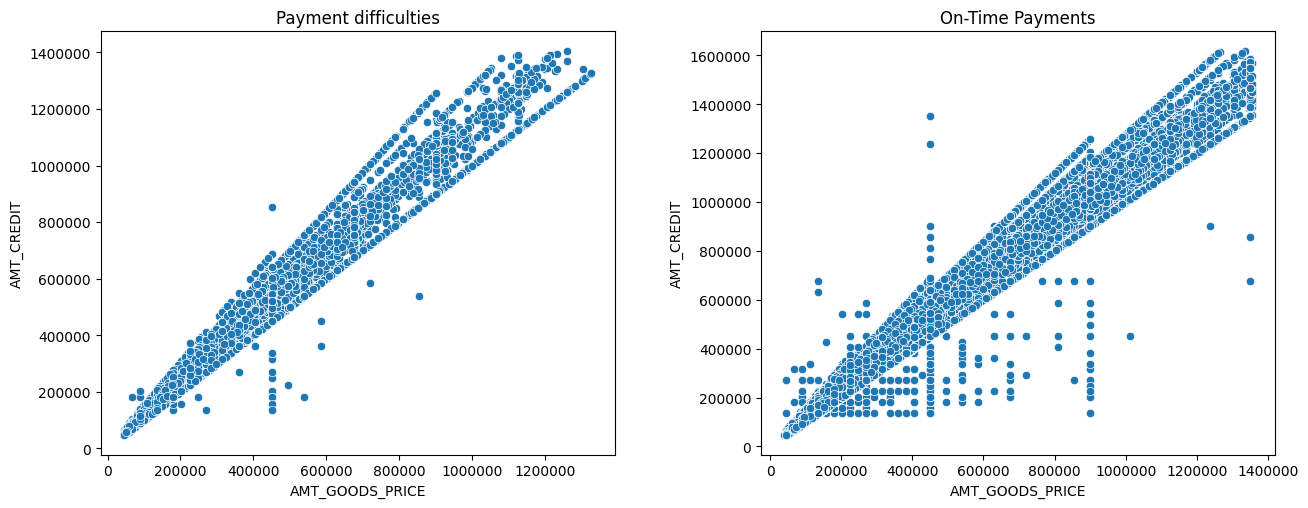

In [274]:
plt.figure(figsize = (14, 6))

plt.subplot(1,2,1)
plt.title('Payment difficulties')
sns.scatterplot(x = df1[df1['AMT_GOODS_PRICE'] < max_value1_AMT_GOODS_PRICE].AMT_GOODS_PRICE,
                y = df1[df1['AMT_CREDIT'] < max_value1_AMT_CREDIT].AMT_CREDIT, data = df1)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(1,2,2)
plt.title('On-Time Payments')
sns.scatterplot(x = df0[df0['AMT_GOODS_PRICE'] < max_value0_AMT_GOODS_PRICE].AMT_GOODS_PRICE,
                y = df0[df0['AMT_CREDIT'] < max_value0_AMT_CREDIT].AMT_CREDIT, data = df0)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout(pad = 4)
plt.show()

**Спостереження**
- AMT_GOODS_PRICE та AMT_CREDIT мають сильну позитивну кореляцію. Це означає, що зі збільшенням ціни товару зростає і сума кредиту

# ДЗ 6. Кореляційний аналіз для пари числових змінних

Проведіть подібний до прикладу кореляційний аналіз для пар змінних
- AMT_ANNUITY і AMT_CREDIT
- DAYS_EMPLOYED і AMT_INCOME_TOTAL
- AMT_CREDIT і DAYS_BIRTH

Для цього винесіть функціонал для аналізу у функцію та викличіть функцію для кожної двійки змінних.
Зробіть висновок про наявність кореляції між змінними.

**Кореляційний аналіз для пар змінних : AMT_ANNUITY і AMT_CREDIT**

**Пошук викидів для ствопця AMT_ANNUITY для групи із платіжними труднощами**

In [275]:
max_value1_AMT_ANNUITY = outlier_range(df1,'AMT_ANNUITY')
max_value1_AMT_ANNUITY

56398.5

**Пошук викидів для ствопця AMT_ANNUITY для групи із вчасними оплатами**

In [276]:
max_value0_AMT_ANNUITY = outlier_range(df0,'AMT_ANNUITY')
max_value0_AMT_ANNUITY

62187.75

**Пошук викидів для ствопця  AMT_CREDIT для групи із платіжними труднощами**

In [277]:
max_value1_AMT_CREDIT = outlier_range(df1,'AMT_CREDIT')
max_value1_AMT_CREDIT

1406688.75

**Пошук викидів для ствопця AMT_CREDIT для групи із вчасними оплатами**

In [278]:
max_value0_AMT_CREDIT = outlier_range(df0,'AMT_CREDIT')
max_value0_AMT_CREDIT

1620000.0

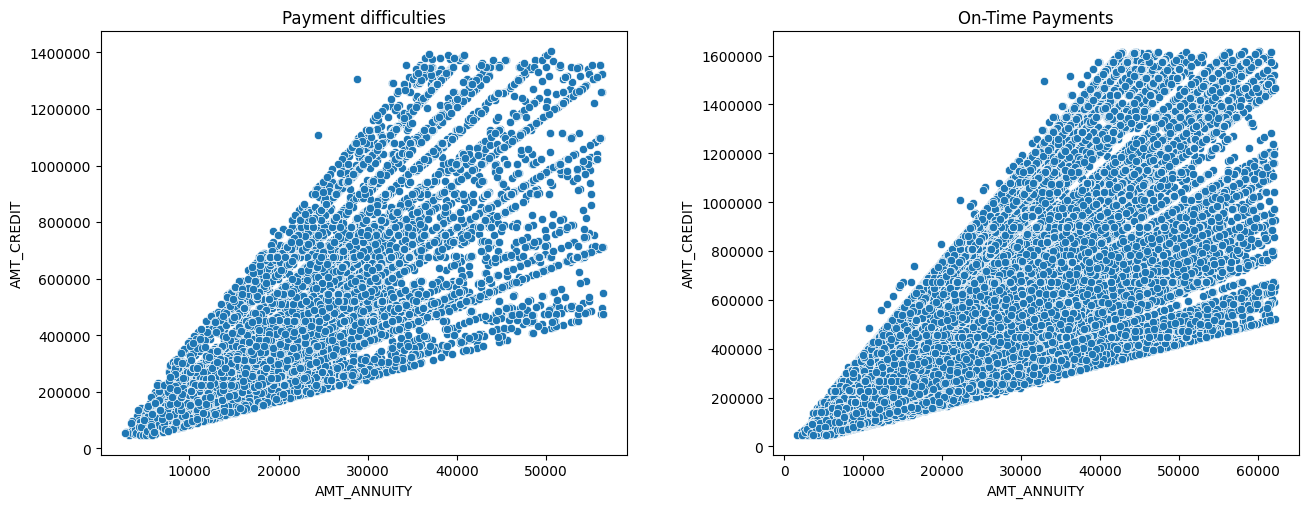

In [279]:
plt.figure(figsize = (14, 6))

plt.subplot(1,2,1)
plt.title('Payment difficulties')
sns.scatterplot(x = df1[df1['AMT_ANNUITY'] < max_value1_AMT_ANNUITY].AMT_ANNUITY,
                y = df1[df1['AMT_CREDIT'] < max_value1_AMT_CREDIT].AMT_CREDIT, data = df1)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(1,2,2)
plt.title('On-Time Payments')
sns.scatterplot(x = df0[df0['AMT_ANNUITY'] < max_value0_AMT_ANNUITY].AMT_ANNUITY,
                y = df0[df0['AMT_CREDIT'] < max_value0_AMT_CREDIT].AMT_CREDIT, data = df0)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout(pad = 4)
plt.show()

**Спостереження**
- AMT_ANNUITY та AMT_CREDIT мають сильну позитивну кореляцію. Це означає, що зі збільшенням ануїтету кредиту зростає і сума кредиту

**Кореляційний аналіз для пар змінних DAYS_EMPLOYED і AMT_INCOME_TOTAL**

**Пошук викидів для ствопця  DAYS_EMPLOYED для групи із платіжними труднощами**

In [280]:
max_value1_DAYS_EMPLOYED = outlier_range(df1,'DAYS_EMPLOYED')
max_value1_DAYS_EMPLOYED

7184.5

**Пошук викидів для ствопця DAYS_EMPLOYED для групи із вчасними оплатами**

In [281]:
max_value0_DAYS_EMPLOYED = outlier_range(df0,'DAYS_EMPLOYED')
max_value0_DAYS_EMPLOYED

13734.5

**Пошук викидів для ствопця AMT_INCOME_TOTAL для групи із платіжними труднощами**

In [282]:
max_value1_AMT_INCOME_TOTAL = outlier_range(df1,'AMT_INCOME_TOTAL')
max_value1_AMT_INCOME_TOTAL

337500.0

**Пошук викидів для ствопця AMT_INCOME_TOTAL для групи із вчасними оплатами**

In [283]:
max_value0_AMT_INCOME_TOTAL = outlier_range(df0,'AMT_INCOME_TOTAL')
max_value0_AMT_INCOME_TOTAL

337500.0

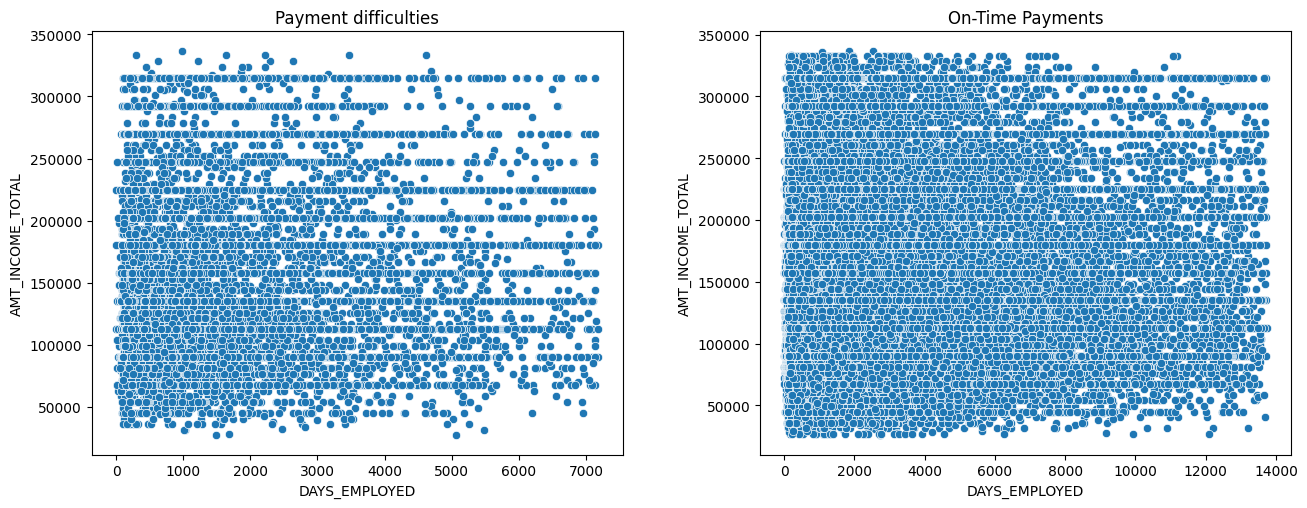

In [284]:
plt.figure(figsize = (14, 6))

plt.subplot(1,2,1)
plt.title('Payment difficulties')
sns.scatterplot(x = df1[df1['DAYS_EMPLOYED'] < max_value1_DAYS_EMPLOYED].DAYS_EMPLOYED,
                y = df1[df1['AMT_INCOME_TOTAL'] < max_value1_AMT_INCOME_TOTAL].AMT_INCOME_TOTAL, data = df1)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(1,2,2)
plt.title('On-Time Payments')
sns.scatterplot(x = df0[df0['DAYS_EMPLOYED'] < max_value0_DAYS_EMPLOYED].DAYS_EMPLOYED,
                y = df0[df0['AMT_INCOME_TOTAL'] < max_value0_AMT_INCOME_TOTAL].AMT_INCOME_TOTAL, data = df0)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout(pad = 4)
plt.show()

**Спостереження:**
- судячи з графіку та значення кореляції -0.14 між колонками DAYS_EMPLOYED та AMT_INCOME_TOTAL відсутня кореляція. Тобто ми не можемо стверджувати що зі збільшенням кількості днів працевлаштування збільшується і показник доходу клієнта.

**Кореляційний аналіз для пар змінних AMT_CREDIT і DAYS_BIRTH**

Пошук викидів для ствопця AMT_CREDIT для групи із платіжними труднощами

In [285]:
max_value1_AMT_CREDIT = outlier_range(df1,'AMT_CREDIT')
max_value1_AMT_CREDIT

1406688.75

Пошук викидів для ствопця AMT_CREDIT для групи із вчасними оплатами

In [286]:
max_value0_AMT_CREDIT = outlier_range(df0,'AMT_CREDIT')
max_value0_AMT_CREDIT

1620000.0

Пошук викидів для ствопця DAYS_BIRTH для групи із платіжними труднощами

In [287]:
max_value1_DAYS_BIRTH = outlier_range(df1,'DAYS_BIRTH')
max_value1_DAYS_BIRTH

27998.5

Пошук викидів для ствопця DAYS_BIRTH для групи із вчасними оплатами

In [288]:
max_value0_DAYS_BIRTH = outlier_range(df0,'DAYS_BIRTH')
max_value0_DAYS_BIRTH

30680.375

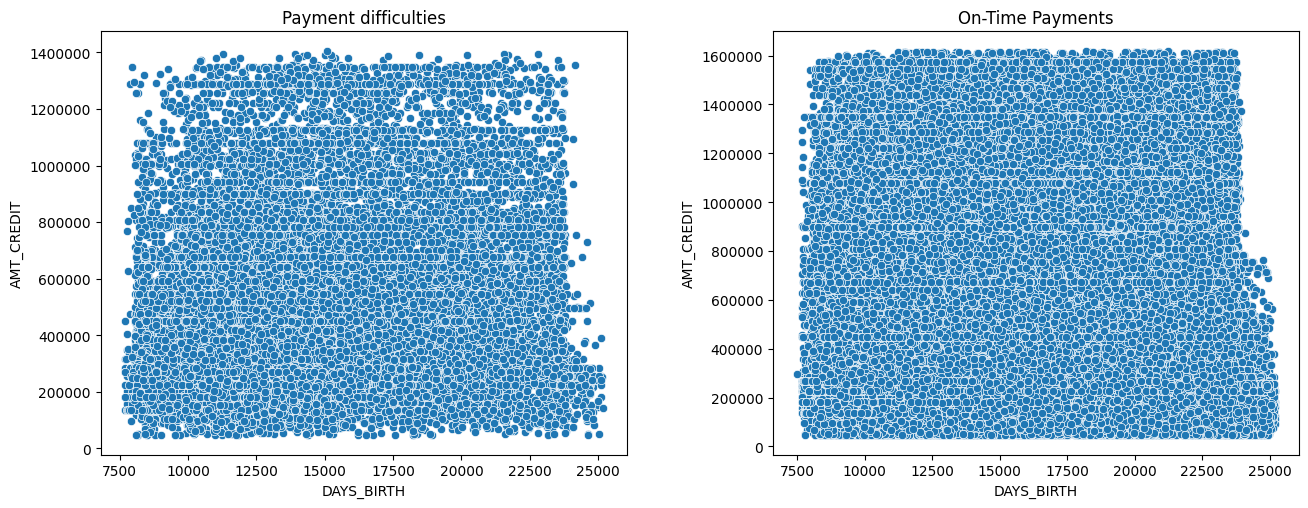

In [289]:
plt.figure(figsize = (14, 6))

plt.subplot(1,2,1)
plt.title('Payment difficulties')
sns.scatterplot(x = df1[df1['DAYS_BIRTH'] < max_value1_DAYS_BIRTH].DAYS_BIRTH,
                y = df1[df1['AMT_CREDIT'] < max_value1_AMT_CREDIT].AMT_CREDIT, data = df1)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(1,2,2)
plt.title('On-Time Payments')
sns.scatterplot(x = df0[df0['DAYS_BIRTH'] < max_value0_DAYS_BIRTH].DAYS_BIRTH,
                y = df0[df0['AMT_CREDIT'] < max_value0_AMT_CREDIT].AMT_CREDIT, data = df0)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout(pad = 4)
plt.show()

**Спостереження:**
- між змінними AMT_CREDIT та DAYS_BIRTH немає кореляційного зв'язку, про що свідчить графік та показник кореляції 0.05
- ми не можемо стверджувати що при збільшенні віку клієнта сума кредиту клієнта зростає.

## Неперервні та категоріальні змінні

In [290]:
def draw_boxplot(df, categorical, continuous, max_continuous, title, hue_column, subplot_position):
    """
    Малює блок-діаграму для заданого DataFrame, категоріальної та неперервної змінної.
    """
    plt.subplot(1, 2, subplot_position)
    plt.title(title)
    red_diamond = dict(markerfacecolor='r', marker='D')
    sns.boxplot(x=categorical,
                y=df[df[continuous] < max_continuous][continuous],
                data=df,
                flierprops=red_diamond,
                order=sorted(df[categorical].unique(), reverse=True),
                hue=hue_column, hue_order=sorted(df[hue_column].unique(), reverse=True))
    plt.ticklabel_format(style='plain', axis='y')
    plt.xticks(rotation=90)

def bi_boxplot(categorical, continuous, max_continuous1, max_continuous0, hue_column):
    """
    Створює паралельні блок-діаграми для двох груп, визначених у наборі даних, на основі
    категоріальної та неперервної змінної, виділяючи відмінності за допомогою відтінків.
    """
    plt.figure(figsize=(16, 10))

    # Графік для першо групи "Труднощі з платежами" (Payment Difficulties)
    draw_boxplot(df1, categorical, continuous, max_continuous1, 'Payment Difficulties', hue_column, 1)

    # Графік для другої групи "Вчасні оплати" (On-Time Payments)
    draw_boxplot(df0, categorical, continuous, max_continuous0, 'On-Time Payments', hue_column, 2)

    plt.tight_layout(pad=4)
    plt.show()

### Аналіз стовпців `AMT_CREDIT` vs `NAME_EDUCATION_TYPE` vs `CODE_GENDER`

**Пошук викидів для `AMT_CREDIT `для групи із платіжними труднощами**

In [291]:
max_value1_AMT_CREDIT = outlier_range(df1,'AMT_CREDIT')
max_value1_AMT_CREDIT

1406688.75

**Пошук викидів для `AMT_CREDIT ` для групи із вчасними платежами**

In [292]:
max_value0_AMT_CREDIT = outlier_range(df0,'AMT_CREDIT')
max_value0_AMT_CREDIT

1620000.0

**Клієнт з платіжними труднощами**

In [293]:
df1.groupby(by = ['NAME_EDUCATION_TYPE','CODE_GENDER']).AMT_CREDIT.describe().head()

count      mean       std       min  \
NAME_EDUCATION_TYPE CODE_GENDER                                         
Academic degree     F              3.00 950245.50 504711.38 544491.00   
Higher education    F           2438.00 648500.58 410415.70  47970.00   
                    M           1571.00 642070.94 409695.93  45000.00   
Incomplete higher   F            504.00 520150.35 352227.49  91692.00   
                    M            368.00 554723.82 347843.71  74628.00   

                                      25%       50%        75%        max  
NAME_EDUCATION_TYPE CODE_GENDER                                            
Academic degree     F           667660.50 790830.00 1153122.75 1515415.50  
Higher education    F           323595.00 545040.00  877500.00 2687355.00  
                    M           329202.00 545040.00  832797.00 2695500.00  
Incomplete higher   F           269550.00 450000.00  675000.00 2695500.00  
                    M           284400.00 497520.00  699976.12 2013840.00

**Клієнт зі вчасними платежами**

In [294]:
df0.groupby(by = ['NAME_EDUCATION_TYPE','CODE_GENDER']).AMT_CREDIT.describe().head()

count      mean       std       min  \
NAME_EDUCATION_TYPE CODE_GENDER                                          
Academic degree     F              97.00 708770.74 463052.42 130824.00   
                    M              64.00 735235.38 497739.97  74182.50   
Higher education    F           47852.00 682485.00 456642.78  45000.00   
                    M           23002.00 713144.54 486073.66  45000.00   
Incomplete higher   F            5780.00 555340.53 385980.60  45000.00   

                                      25%       50%        75%        max  
NAME_EDUCATION_TYPE CODE_GENDER                                            
Academic degree     F           354469.50 607500.00 1006920.00 2463840.00  
                    M           309519.00 610056.00 1036890.00 1984500.00  
Higher education    F           302206.50 568057.50  916470.00 4050000.00  
                    M           315000.00 592560.00  973503.00 4050000.00  
Incomplete higher   F           253737.00 454500.00  760225.50 2517300.00

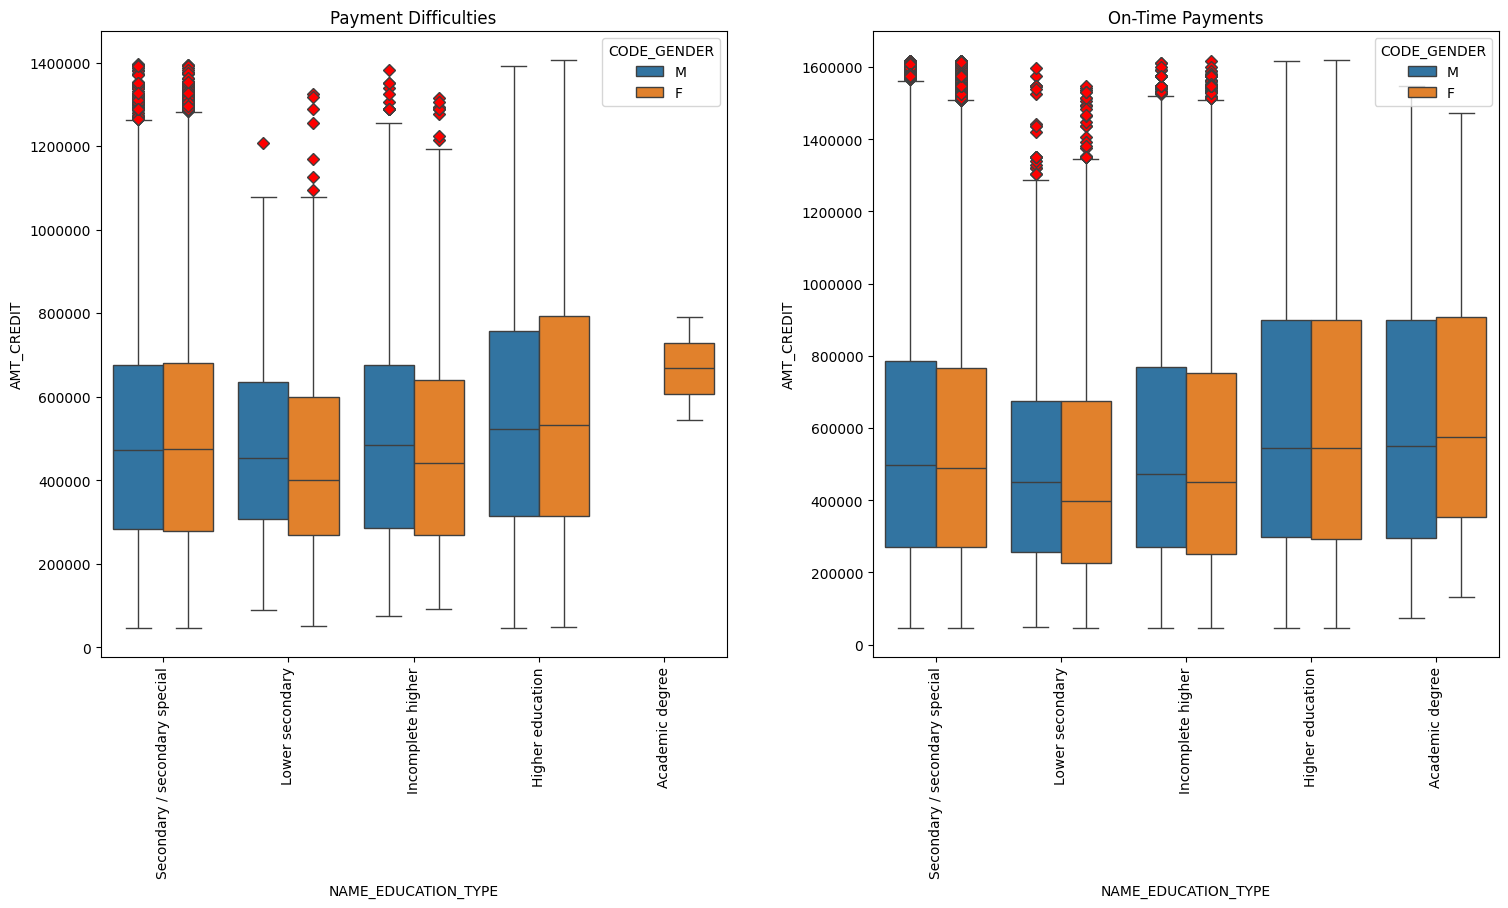

In [295]:
bi_boxplot('NAME_EDUCATION_TYPE','AMT_CREDIT',max_value1_AMT_CREDIT, max_value0_AMT_CREDIT, 'CODE_GENDER')


**Спостереження**
- Клієнти з "академічним ступенем" мають широкий діапазон кредитів для своєчасних платежів, тоді як для клієнтів з проблемами з оплатою цей діапазон значно нижчий
- Якщо поглянути на зведену статистику, то клієнти з "академічним ступенем" та проблемами з оплатою беруть середній та медіанний кредит у значно більшому діапазоні, ніж клієнти з вчасною оплатою.
- Клієнти-чоловіки з "академічним ступенем" завжди сплачують кредит вчасно

 # ДЗ 7. Кореляційний аналіз між двома категоріальними змінними і числовою

Проведіть аналогічний кореляційний аналіз для трійок змінних

- AMT_INCOME_TOTAL vs NAME_FAMILY_STATUS vs CODE_GENDER
- AMT_INCOME_TOTAL vs YEARS_BIRTH_CATEGORY vs NAME_HOUSING_TYPE
- AMT_GOODS_PRICE vs NAME_INCOME_TYPE vs CODE_GENDER
- AMT_INCOME_TOTAL vs OCCUPATION_TYPE vs CODE_GENDER

Можете також проаналізувати додатково свою трійку :)

Для цього винесіть функціонал для аналізу у функцію та викличіть функцію для кожної трійки змінних.

Зробіть висновок про наявність кореляції між змінними.


**Аналіз колонок AMT_INCOME_TOTAL vs NAME_FAMILY_STATUS vs CODE_GENDER**

In [306]:
def max_outlier_value_for_column(df1, df0, column, outlier_range):
    max_value_df1 = outlier_range(df1, column)
    max_value_df0 = outlier_range(df0, column)

    return max_value_df1, max_value_df0


In [317]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)


def describe_by_group_and_print(df1, df0, column, groupby_columns):

    df1_stats = df1.groupby(by=groupby_columns)[column].describe()
    print("Statistics for df1:")
    print(df1_stats)


    df0_stats = df0.groupby(by=groupby_columns)[column].describe()
    print("\nStatistics for df0:")
    print(df0_stats)




In [311]:
max_value_df1, max_value_df0 = max_outlier_value_for_column(df1, df0, 'AMT_INCOME_TOTAL', outlier_range)

In [318]:
column= 'AMT_INCOME_TOTAL'
groupby_columns=['NAME_FAMILY_STATUS','CODE_GENDER' ]
describe_by_group_and_print(df1, df0, column, groupby_columns)

Statistics for df1:
                                   count      mean        std      min       25%       50%       75%          max
NAME_FAMILY_STATUS   CODE_GENDER                                                                                 
Civil marriage       F           1753.00 153620.72  101045.86 25650.00 108000.00 135000.00 180000.00   3150000.00
                     M           1208.00 173949.99   92449.17 36000.00 117000.00 157500.00 202500.00   1350000.00
Married              F           8324.00 159907.85 1283283.40 27000.00  90000.00 135000.00 180000.00 117000000.00
                     M           6526.00 182233.06   94787.77 31500.00 126000.00 157500.00 225000.00   1890000.00
Separated            F           1045.00 161159.55   82633.33 36000.00 112500.00 135000.00 202500.00    832500.00
                     M            575.00 178888.28   85034.85 45000.00 126000.00 157500.00 225000.00    675000.00
Single / not married F           2220.00 150373.57   76996.14 31500.

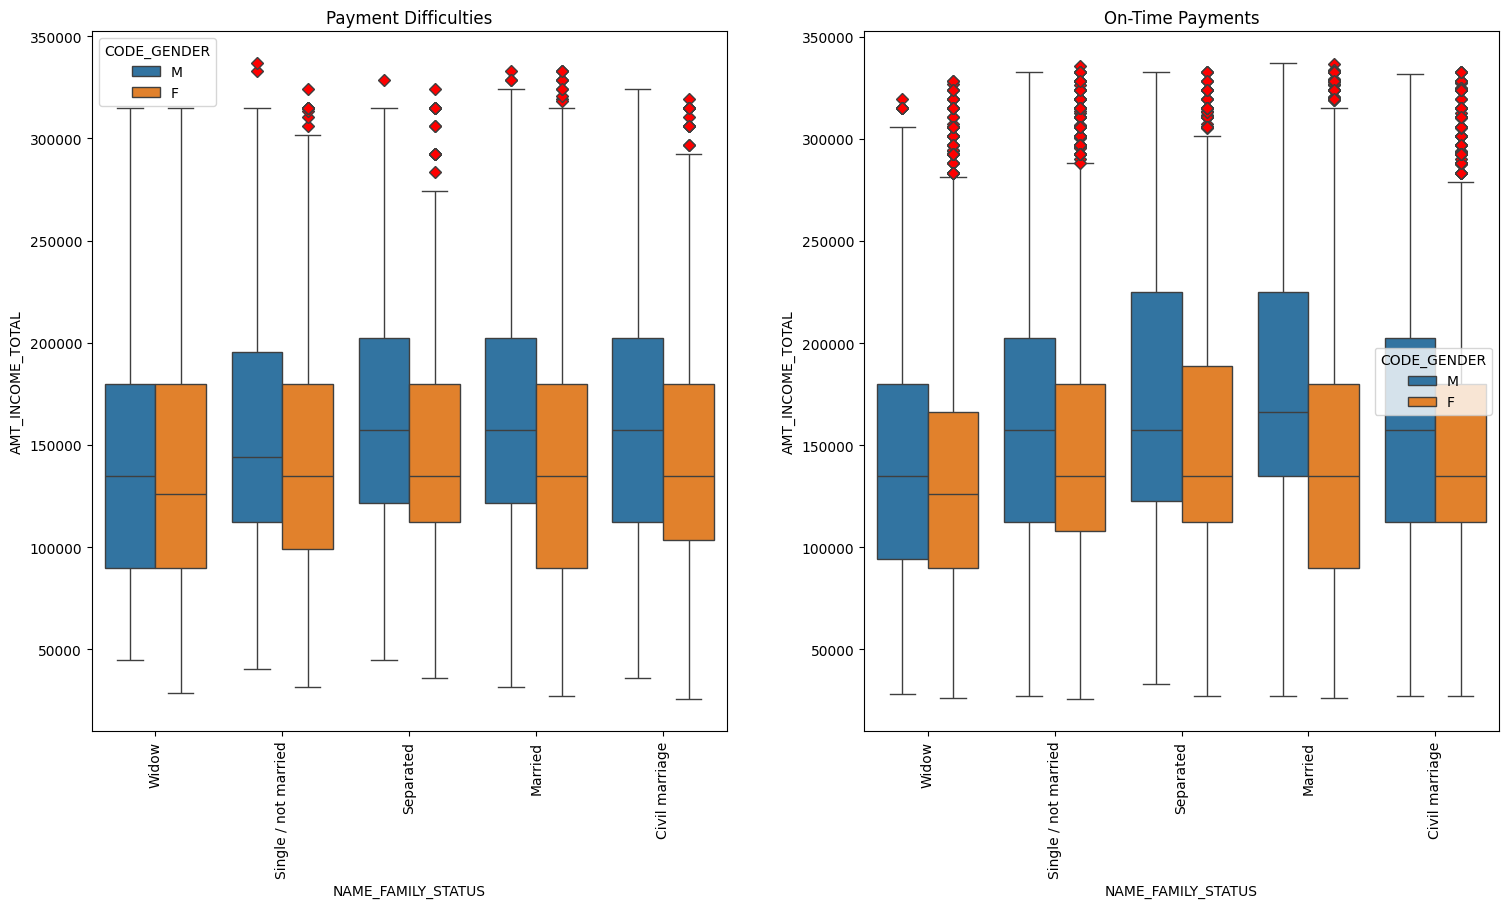

In [312]:
bi_boxplot('NAME_FAMILY_STATUS', 'AMT_INCOME_TOTAL', max_value_df1, max_value_df0, 'CODE_GENDER')


**Спостереження:**
- в категорії вдова/вдовець клієнти, що вчасно сплачують та невчасно сплачують, мають  показники по діапазону доходу та медіани майже однакові. Проте відмінністю є максимальне значення доходу, яке є нижчим у  жінок-вдов,які сплачують кредит вчасно, ніж у тих,які не сплачують вчасно.
- в категорії одиноких неодружених майже відсутні якісь видимі відмінності між тими хто сплачує та не вчасно сплачує
- в категорії розведені чоловіки що сплачують кредит вчасно мають більший діапазон доходу та медіану доходу, ніж чоловіки які розведені та не сплачують кредит вчасно.
- в категорії одружені чоловіки що сплачують вчасно мають більший діапазон доходу та його медіану  ніж чоловіки які одружені та не сплачують вчасно.
- категорія цивільний шлюб не містить якихось яскравих відмінностей між тими хто сплачує та невчасно сплачує кредит
- загалом розвеедені та одружені чоловіки мають вищий дохід ніж інші категорії

**Аналіз колонок AMT_INCOME_TOTAL vs YEARS_BIRTH_CATEGORY vs NAME_HOUSING_TYPE**

In [315]:
max_value_df1, max_value_df0 = max_outlier_value_for_column(df1, df0, 'AMT_INCOME_TOTAL', outlier_range)

In [319]:
column= 'AMT_INCOME_TOTAL'
groupby_columns=['YEARS_BIRTH_CATEGORY','NAME_HOUSING_TYPE' ]
describe_by_group_and_print(df1, df0, column, groupby_columns)

Statistics for df1:
                                           count      mean        std      min       25%       50%       75%          max
YEARS_BIRTH_CATEGORY NAME_HOUSING_TYPE                                                                                   
20-30                Co-op apartment       40.00 148628.70   59516.24 67500.00 110250.00 135000.00 185625.00    360000.00
                     House / apartment   4201.00 151897.22   70874.65 31500.00 112500.00 135000.00 180000.00    810000.00
                     Municipal apartment  153.00 153608.82   78282.79 45000.00 108000.00 135000.00 180000.00    675000.00
                     Office apartment      40.00 147375.00   50817.26 67500.00 112500.00 135000.00 180000.00    270000.00
                     Rented apartment     229.00 144210.10   59998.66 45000.00  99000.00 135000.00 180000.00    405000.00
                     With parents         930.00 143226.04   68189.31 27900.00  99000.00 135000.00 165937.50    990000.00
30-4

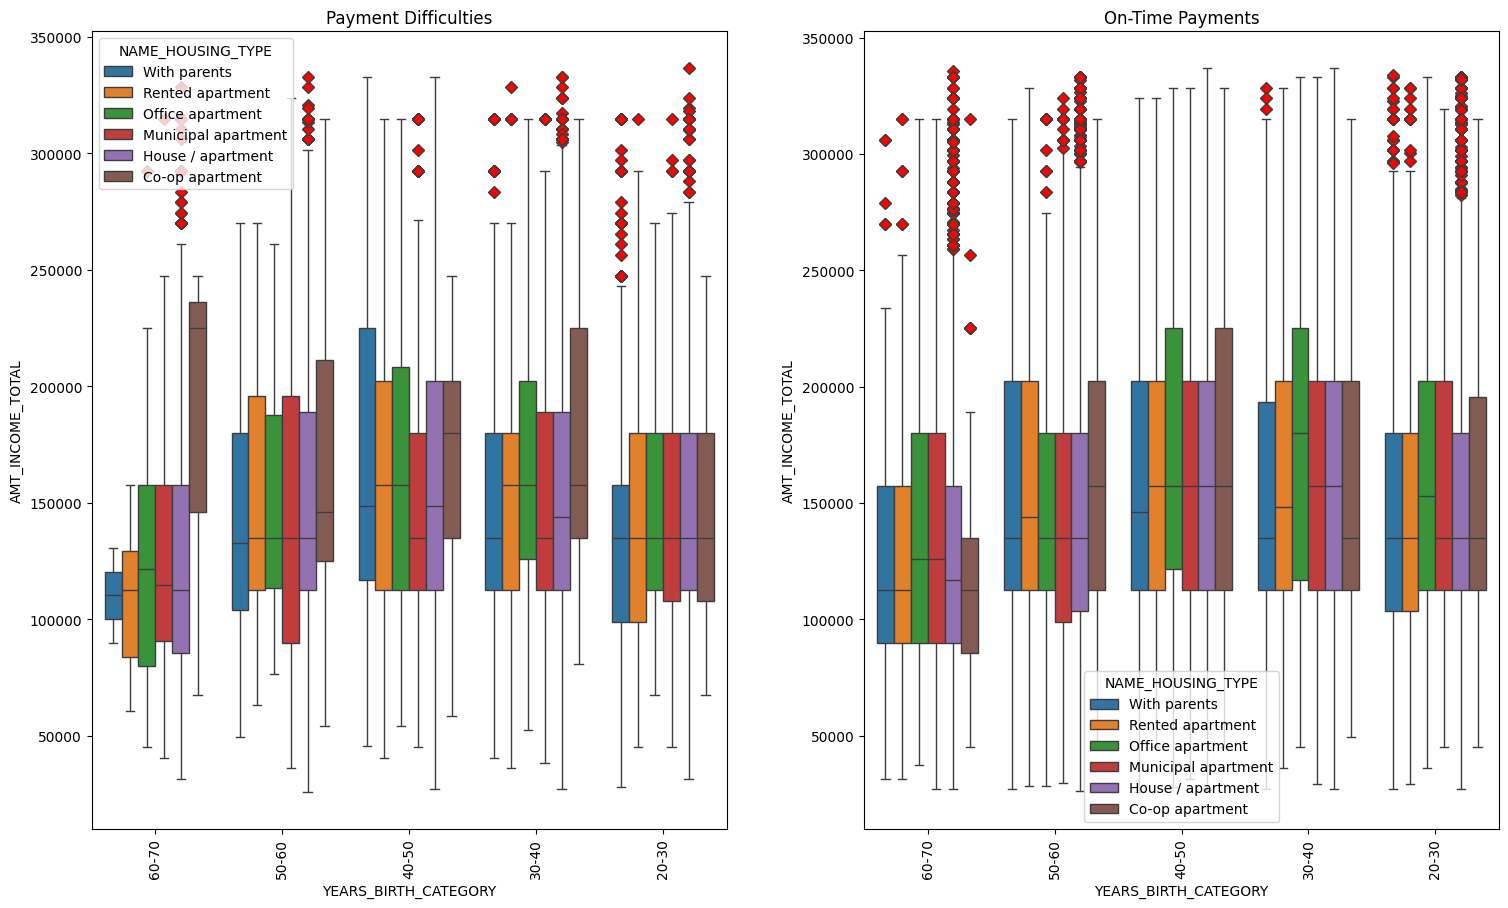

In [320]:
bi_boxplot('YEARS_BIRTH_CATEGORY', 'AMT_INCOME_TOTAL', max_value_df1, max_value_df0, 'NAME_HOUSING_TYPE')

**Спостереження:**
- клієнти, які живуть в кооперативах у віці 60-70 та 30-40 років і не сплачують вчасно кредити мають набагато вищу медіану доходу та більший діапазон доходу в порівнянні з тими, хто сплачує кредит вчасно
- клієнти 60-70 років, які живуть з батьками і несплачують за кредит мають набагато менший дохід (діапазон доходу) ніж ті,які сплачують кредит вчасно
- клієнти у віці 40-50 років, що проживають з батьками, і невчасно сплачують кредит мають більший діапазон доходу, ніж ті що сплачують вчасно.
- клієнти у віці 50-60 що проживають з батьками або орендують житло, і сплачують кредит, мають вищий показник доходу, ніж ті, які не сплачують вчасно.
- клієнти у віці 20-30 років, що сплачують все вчасно, і мешкають в офісних приміщеннях та муніципальних будинках мають більший діапазон доходу ( а ті що в офісних ще й вищу медіану) в порівнянні з тими хто не сплачує
- також клієнти у віці 30-40, які сплачують вчасно,  що мешкають в офісних апартаментах мають вищий діапазон доходу та медіану у порівнянні з тими хто не сплачує.
- дуже суттєвих відмінностей між клієнтами що мешкають в будинках між тими хто платить і не платить вчасно- не помічено

**Аналіз AMT_GOODS_PRICE vs NAME_INCOME_TYPE vs CODE_GENDER**

In [321]:
max_value_df1, max_value_df0 = max_outlier_value_for_column(df1, df0, 'AMT_GOODS_PRICE', outlier_range)

In [322]:
column= 'AMT_GOODS_PRICE'
groupby_columns=['NAME_INCOME_TYPE','CODE_GENDER' ]
describe_by_group_and_print(df1, df0, column, groupby_columns)

Statistics for df1:
                                   count      mean       std       min       25%       50%        75%        max
NAME_INCOME_TYPE     CODE_GENDER                                                                                
Commercial associate F           2968.00 536304.02 353598.52  45000.00 270000.00 450000.00  675000.00 3600000.00
                     M           2392.00 526355.38 335793.33  45000.00 270000.00 450000.00  675000.00 2961000.00
Maternity leave      F              2.00 929250.00 715945.62 423000.00 676125.00 929250.00 1182375.00 1435500.00
Pensioner            F           2243.00 494976.12 316903.86  45000.00 229500.00 450000.00  675000.00 2173500.00
                     M            739.00 486543.08 321104.43  45000.00 229500.00 450000.00  675000.00 1800000.00
State servant        F            847.00 544120.88 336074.93  45000.00 270000.00 450000.00  675000.00 1800000.00
                     M            402.00 536955.22 339694.98  45000.00 27000

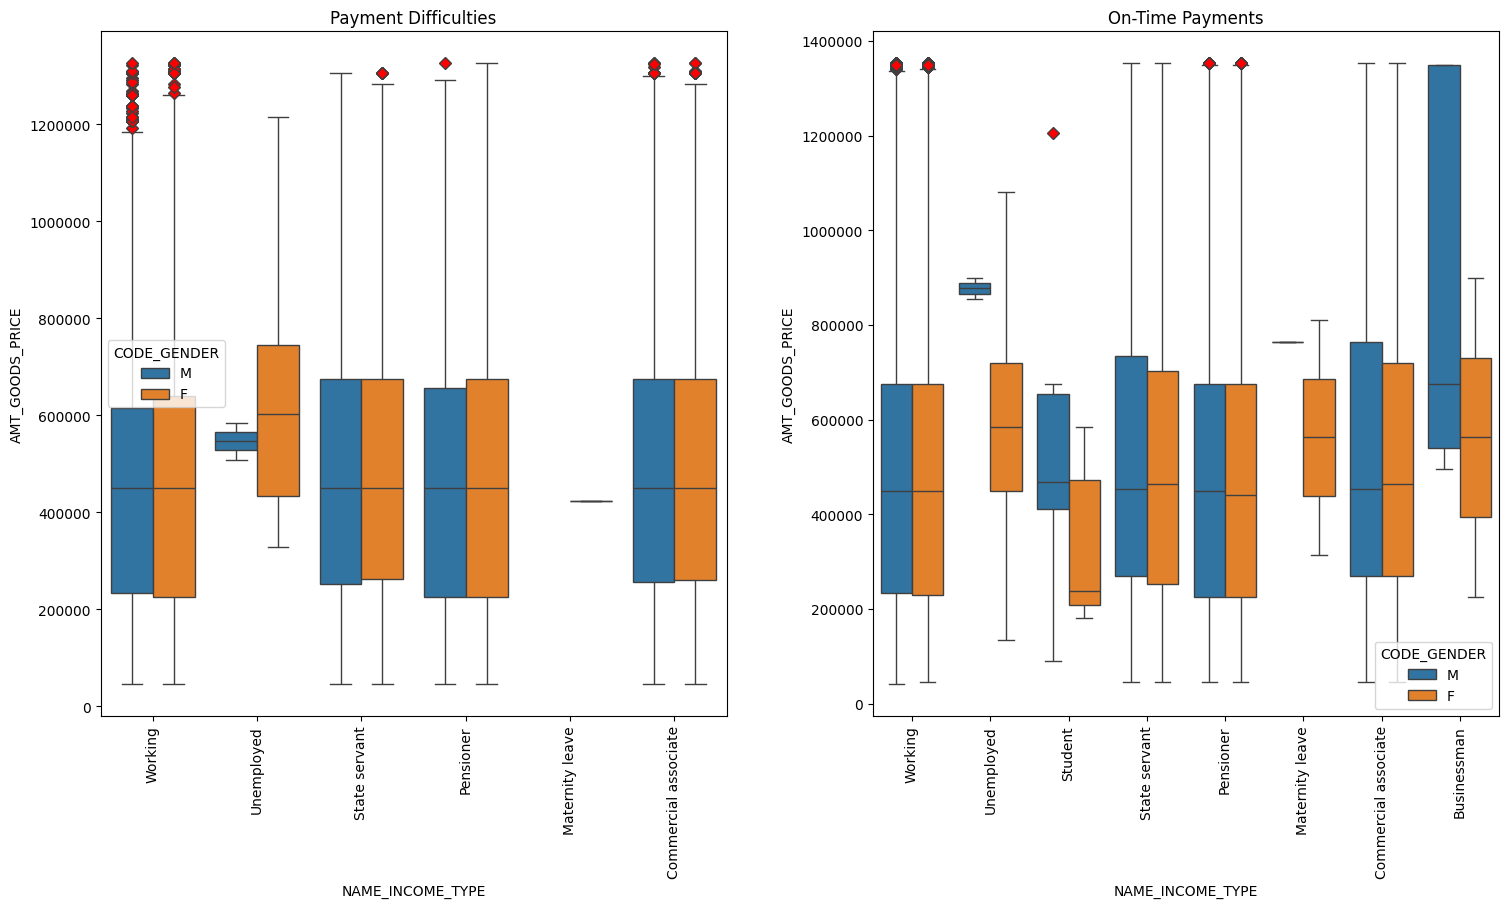

In [323]:
bi_boxplot('NAME_INCOME_TYPE', 'AMT_GOODS_PRICE', max_value_df1, max_value_df0, 'CODE_GENDER')

**Спостереження:**
- не працюючі клієнти чоловіки , які сплачують кредит вчасно, мають набагато вищу ціну товару,на який просять кредит, ніж ті, які не сплачують вчасно
- не працюючі жінки що невчасно сплачують кредит, просять його для товару/майна  що коштує більше, ніж у непрацюючих жінок, що вчасно сплачують кредит
- чоловіки бізнесмени завжди вчасно сплачуююь кредити, і беруть їх для товару чи майна діапазон вартості та медіана якого значно більший ніж у всіх інших категорій
- чоловіки в декреті завжди сплачують за кредит, натомість жінки в декреті, які не сплачують за кредит вчасно просять його на майно, що коштує дешевше ніж така ж категорія жінок,що сплачує кредит.
- студенти завжди платять за кредит, а також майно, на яке дається кредит, у чоловіків має медіану та діапазон виший ніж у жінок студентів.



**Аналіз AMT_INCOME_TOTAL vs OCCUPATION_TYPE vs CODE_GENDER**

In [324]:
max_value_df1, max_value_df0 = max_outlier_value_for_column(df1, df0, 'AMT_INCOME_TOTAL', outlier_range)

In [325]:
column= 'AMT_INCOME_TOTAL'
groupby_columns=['OCCUPATION_TYPE','CODE_GENDER' ]
describe_by_group_and_print(df1, df0, column, groupby_columns)

Statistics for df1:
                                    count      mean        std       min       25%       50%       75%          max
OCCUPATION_TYPE       CODE_GENDER                                                                                  
Accountants           F            457.00 174840.64   79021.04  54000.00 112500.00 157500.00 202500.00    540000.00
                      M             17.00 202367.65   98623.66  81000.00 121500.00 180000.00 252000.00    438750.00
Cleaning staff        F            410.00 128907.99   70328.23  31500.00  90000.00 112500.00 157500.00    720000.00
                      M             37.00 119493.24   45786.21  45000.00  90000.00 112500.00 135000.00    247500.00
Cooking staff         F            555.00 129298.38   55531.88  32400.00  90000.00 112500.00 157500.00    405000.00
                      M             66.00 177136.36   70219.69  54000.00 135000.00 157500.00 202500.00    405000.00
Core staff            F           1300.00 151346.91 

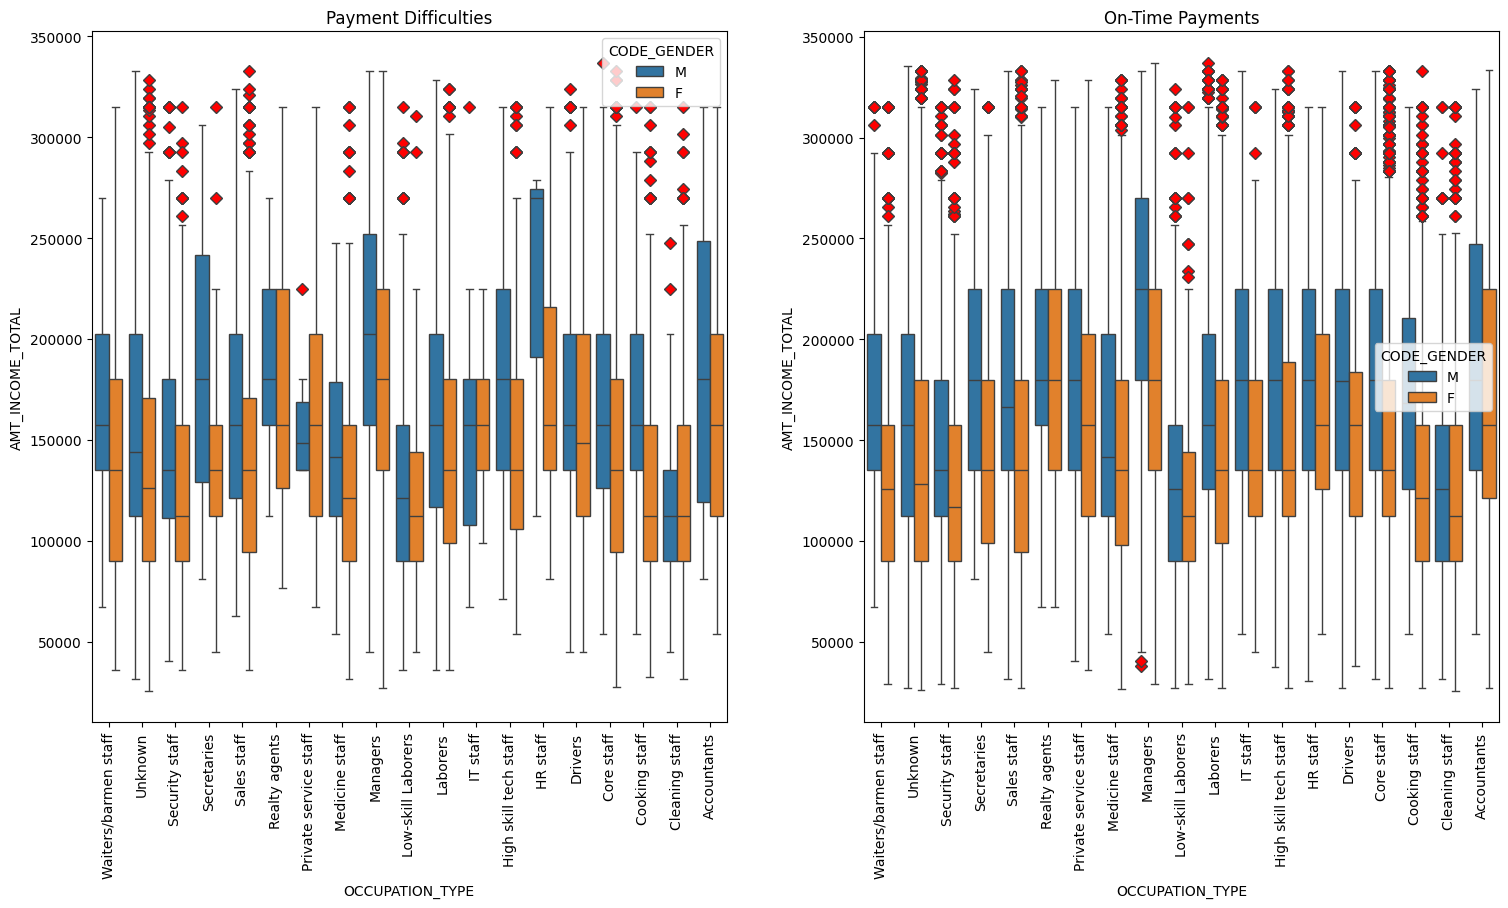

In [326]:
bi_boxplot('OCCUPATION_TYPE', 'AMT_INCOME_TOTAL', max_value_df1, max_value_df0, 'CODE_GENDER')

- чоловіки секретарі, які не виплачують кредит вчасно, мають вищу медіану та більший діапазон доходу ніж такі ж чловіки,але які вчасно сплачуюють кредит
- HR спеціалісти чоловіки, які не виплачують кредит вчасно, мають вищу медіану та більший діапазон доходу ніж такі ж чловіки,але які вчасно сплачуюють кредит
- жінки різних професій в основному мають менший діапазон та медіану доходу ніж чоловіки

## Залежності між категоріальними змінними

### Аналіз стовпців `NAME_INCOME_TYPE` vs `CODE_GENDER`

In [336]:
def bi_countplot_target(df0, df1, column, hue_column):
  group_name = f'Нормалізований розподіл значень за категорією: {column}'
  print(group_name.upper())

  pltname = 'Клієнт зі складнощами щодо платності'
  unique_hue_values = df1[hue_column].unique()
  fig, axes = plt.subplots(nrows=1, ncols=2)
  fig.set_size_inches(14,4)

  proportions = df1.groupby(hue_column)[column].value_counts(normalize=True)
  proportions = (proportions*100).round(2)
  ax = proportions.unstack(hue_column).sort_values(
      by=unique_hue_values[0], ascending=False
      ).plot.bar(ax=axes[0], title=pltname)

  # анотація значень в барплоті
  for container in ax.containers:
      ax.bar_label(container, fmt='{:,.1f}%')

  pltname = 'Клієнти зі своєчасними платежами'
  unique_hue_values = df0[hue_column].unique()

  proportions = df0.groupby(hue_column)[column].value_counts(normalize=True)
  proportions = (proportions*100).round(2)
  ax = proportions.unstack(hue_column).sort_values(
      by=unique_hue_values[0], ascending=False
      ).plot.bar(ax=axes[1], title=pltname)

  for container in ax.containers:
      ax.bar_label(container, fmt='{:,.1f}%')

  plt.show()

  # ---------------
  group_name = f'Кількість значень за категорією: {column}'
  print(group_name.upper())

  pltname = 'Клієнт зі складнощами щодо платності'
  unique_hue_values = df1[hue_column].unique()
  fig, axes = plt.subplots(nrows=1, ncols=2)
  fig.set_size_inches(14,4)

  counts = df1.groupby(hue_column)[column].value_counts()
  ax = counts.unstack(hue_column).sort_values(
      by=unique_hue_values[0], ascending=False
      ).plot.bar(ax=axes[0], title=pltname)

  for container in ax.containers:
    ax.bar_label(container)

  pltname = 'Клієнти зі своєчасними платежами'
  unique_hue_values = df0[hue_column].unique()

  counts = df0.groupby(hue_column)[column].value_counts()
  ax = counts.unstack(hue_column).sort_values(
      by=unique_hue_values[0], ascending=False
      ).plot.bar(ax=axes[1], title=pltname)

  for container in ax.containers:
    ax.bar_label(container)

  plt.show()

НОРМАЛІЗОВАНИЙ РОЗПОДІЛ ЗНАЧЕНЬ ЗА КАТЕГОРІЄЮ: NAME_INCOME_TYPE


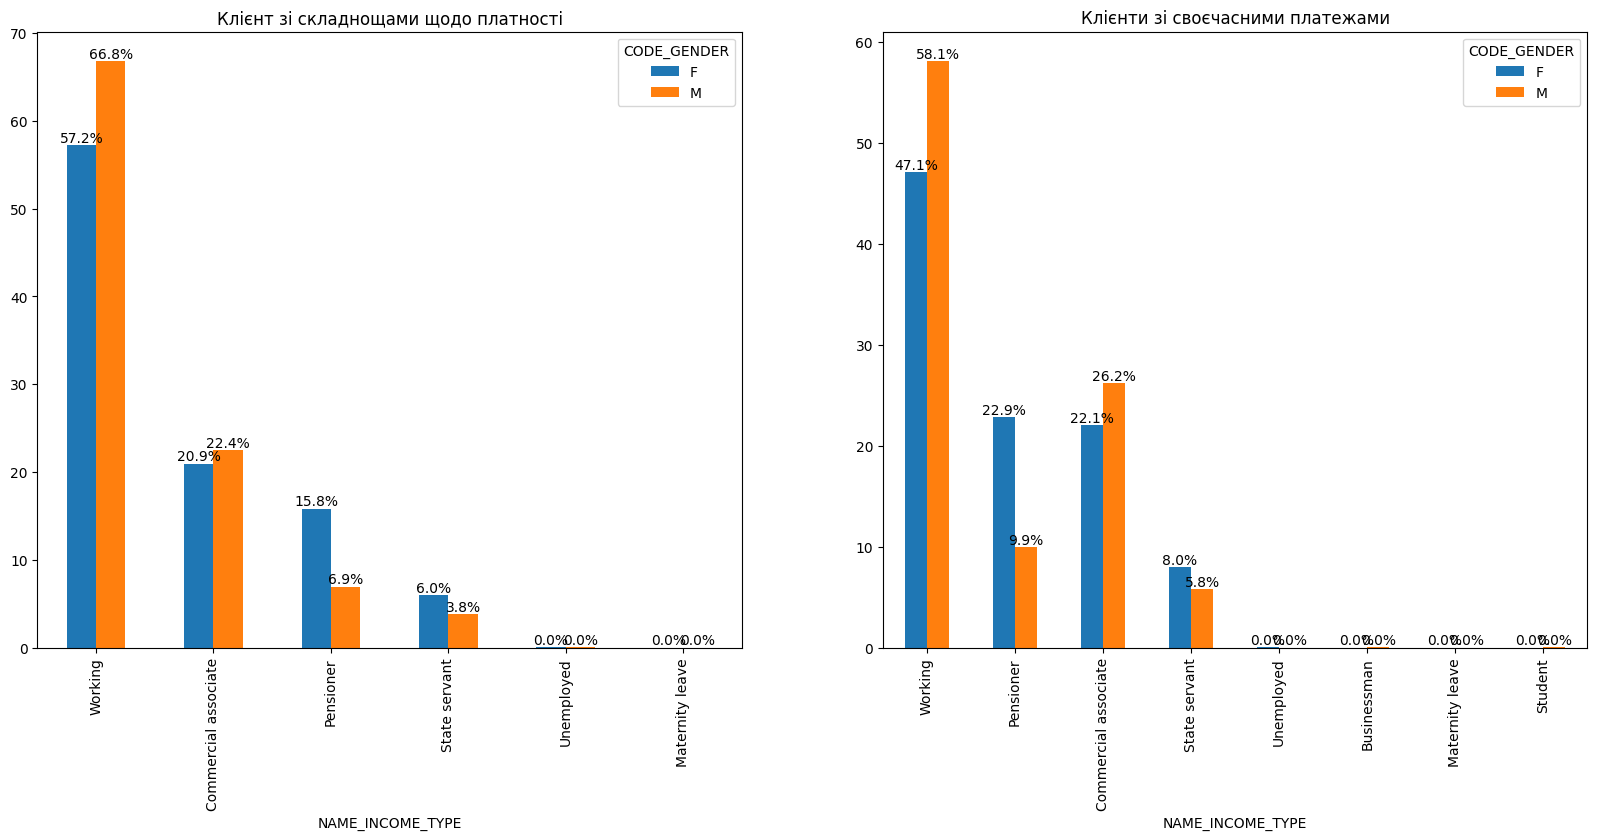

КІЛЬКІСТЬ ЗНАЧЕНЬ ЗА КАТЕГОРІЄЮ: NAME_INCOME_TYPE


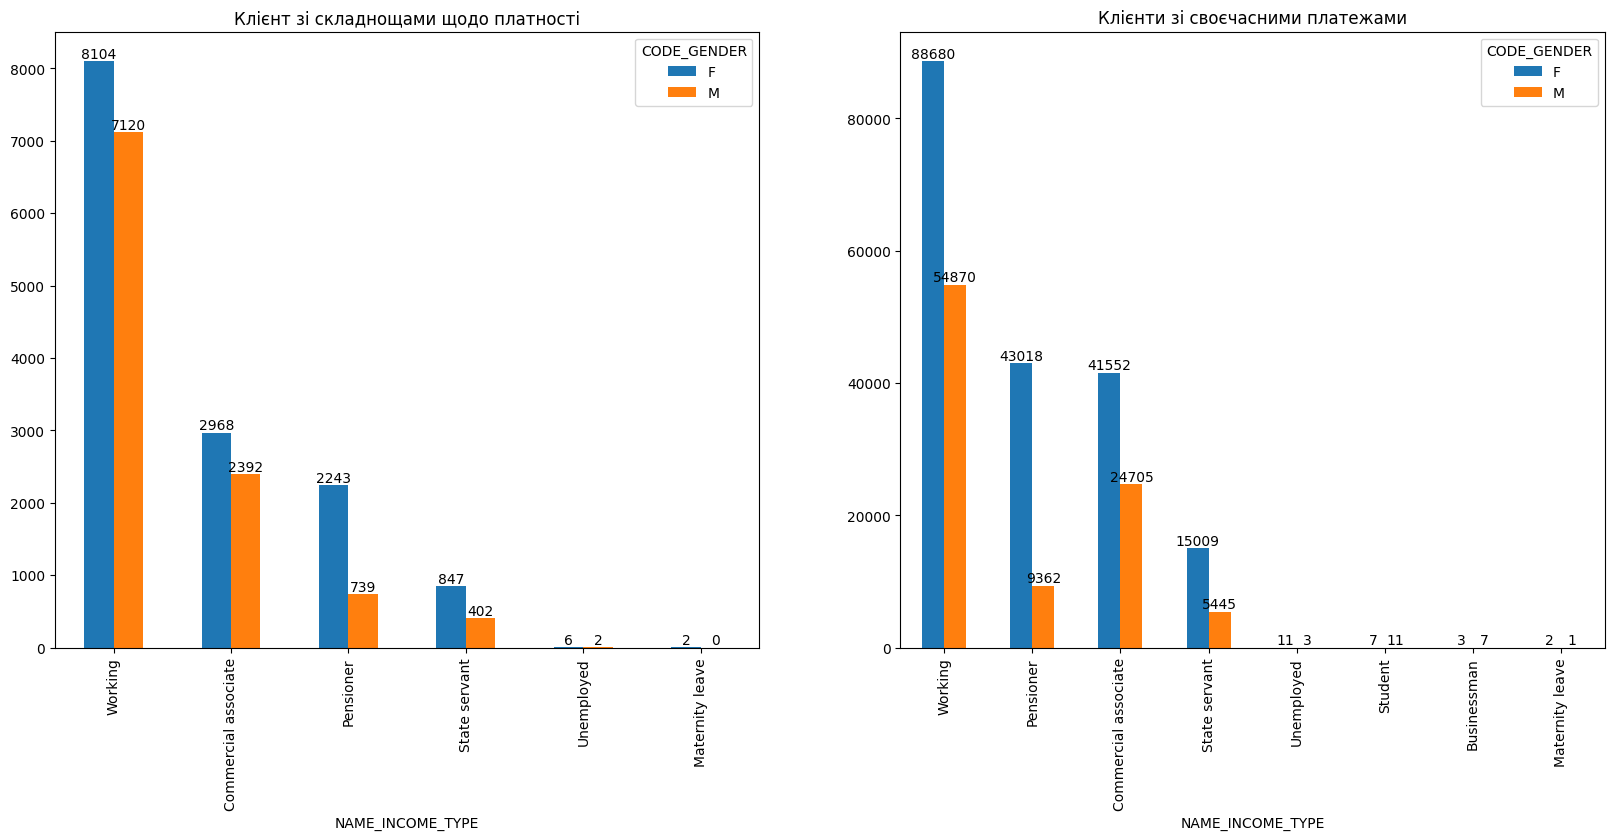

In [334]:
bi_countplot_target(df0, df1, 'NAME_INCOME_TYPE','CODE_GENDER');

**Спостереження**
- Серед клієнтів, які мають складнощі з платністю людей категорії "Працюючі" та "Чоловіки" відсотково значно більше, ніж серед клієнтів, які складнощів з платністю не мають.
- Серед клієнтів, які мають складнощі з платністю людей категорії "Працюючі" та "Жінки" відсотково значно більше, ніж серед клієнтів, які складнощів з платністю не мають.
- Оскільки за обома CODE_GENDER бачимо, що найбільший відсоток клієнтів мають NAME_INCOME_TYPE Working - важливо проаналізувати ще додаткові змінні, які можуть впливати на те, чи буде клієнт мати складнощі з платежами, адже група клієнтів NAME_INCOME_TYPE Working - є в цілому найбільшою в наших даних.
- Клієнти категорії "Бізнесмени" та "Студенти" здійснюють платежі вчасно, хоча їхня історія невелика

# ДЗ 8. Аналіз взаємозалежностей між двома категоріальними змінними

Проведіть подібний до прикладу аналіз залежностей між категоріальними змінними для пар змінних

- NAME_EDUCATION_TYPE vs CODE_GENDER
- NAME_FAMILY_STATUS vs OCCUPATION_TYPE
- OCCUPATION_TYPE vs NAME_CONTRACT_TYPE

Опишіть спостереження щодо того, чи є цікаві знахідки стосовно цільової змінної з цього аналізу.

**Аналіз NAME_EDUCATION_TYPE vs CODE_GENDER**

НОРМАЛІЗОВАНИЙ РОЗПОДІЛ ЗНАЧЕНЬ ЗА КАТЕГОРІЄЮ: NAME_EDUCATION_TYPE


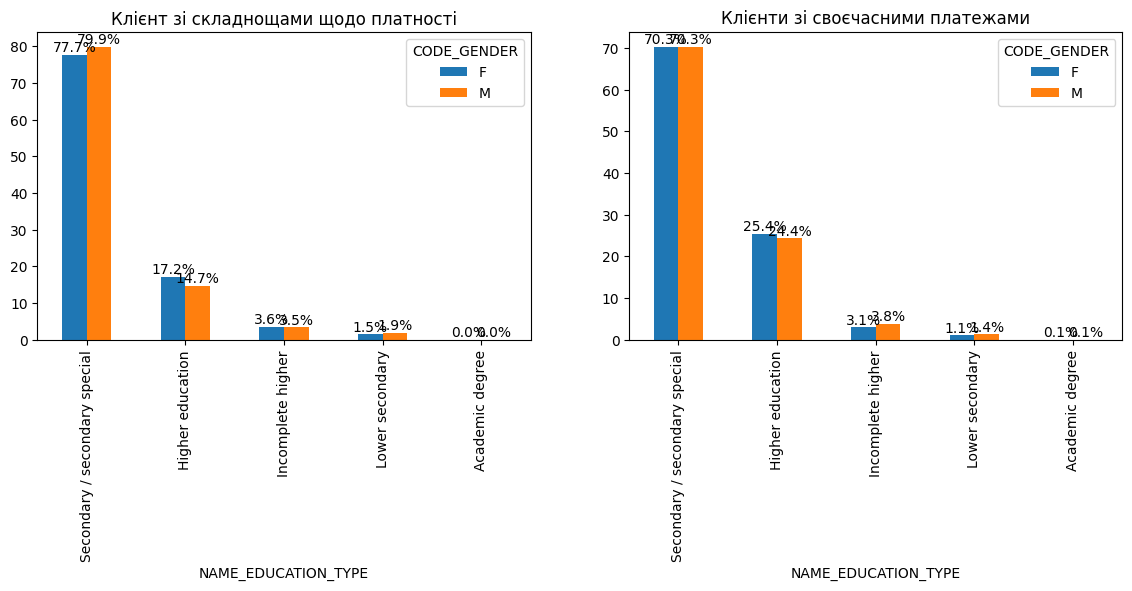

КІЛЬКІСТЬ ЗНАЧЕНЬ ЗА КАТЕГОРІЄЮ: NAME_EDUCATION_TYPE


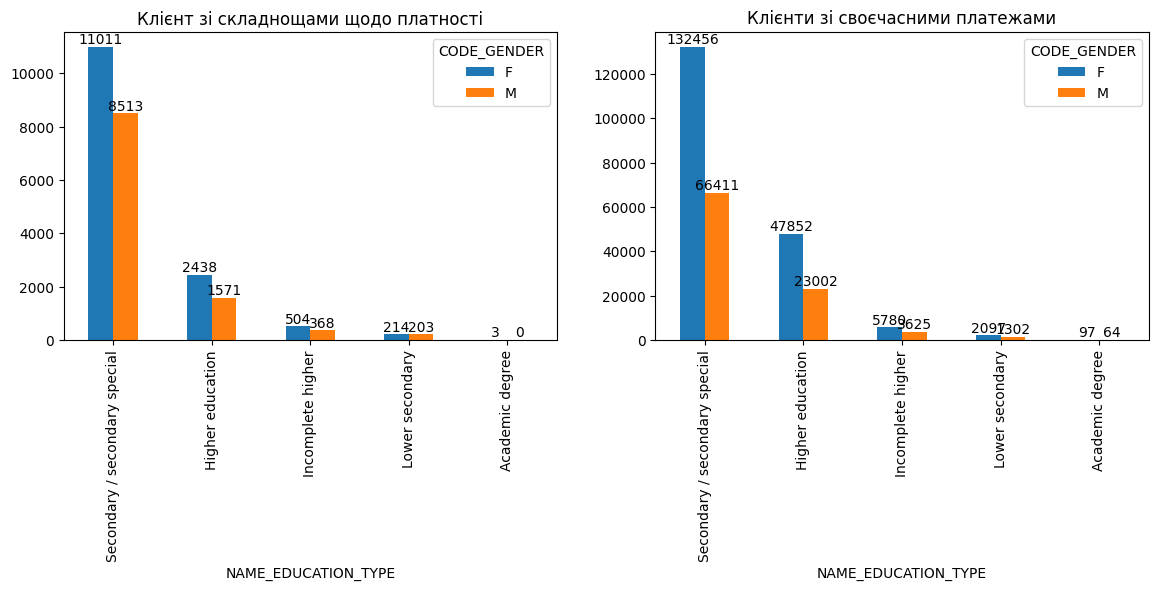

In [329]:
bi_countplot_target(df0, df1, 'NAME_EDUCATION_TYPE','CODE_GENDER');

**Спостереження:**
- Серед клієнтів, які мають складнощі з платністю в категорії освіти "середня спеціальна" жіночої та чоловічої статі,їх відсотково більше (проте незначно), ніж серед клієнтів, які складнощів з платністю не мають. Саме ця категорія людей має найбільше проблем з вчасними платежами по кредиту.
- клієнтів, що мають вищу освіту жін.та чол. статі і з вчасною оплатою кредиту відсотково більше ніж серед такої ж категорії, проте яка не платить вчасно за кредит.
- клієнтів з академічним ступенем жін та чол статі  і які вчасно платять за кредит біьше ніж тих, хто не платить вчасно такої ж категорії.


**Аналіз NAME_FAMILY_STATUS vs OCCUPATION_TYPE**

In [343]:
import seaborn as sns

def bi_countplot_target_updated(df0, df1, column, hue_column):
    group_name = f'Нормалізований розподіл значень за категорією: {column}'
    print(group_name.upper())

    pltname = 'Клієнт зі складнощами щодо платності'
    unique_hue_values = df1[hue_column].unique()
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(24, 12)

    proportions = df1.groupby(hue_column)[column].value_counts(normalize=True)
    proportions = (proportions*100).round(2)


    palette = sns.color_palette("tab20", 20)

    ax = proportions.unstack(hue_column).sort_values(
        by=unique_hue_values[0], ascending=False
        ).plot.bar(ax=axes[0], title=pltname, color=palette)


    for container in ax.containers:
        ax.bar_label(container, fmt='{:,.1f}%')

    pltname = 'Клієнти зі своєчасними платежами'
    unique_hue_values = df0[hue_column].unique()

    proportions = df0.groupby(hue_column)[column].value_counts(normalize=True)
    proportions = (proportions*100).round(2)

    ax = proportions.unstack(hue_column).sort_values(
        by=unique_hue_values[0], ascending=False
        ).plot.bar(ax=axes[1], title=pltname, color=palette)

    for container in ax.containers:
        ax.bar_label(container, fmt='{:,.1f}%')

    plt.show()

    # ---------------
    group_name = f'Кількість значень за категорією: {column}'
    print(group_name.upper())

    pltname = 'Клієнт зі складнощами щодо платності'
    unique_hue_values = df1[hue_column].unique()
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(24, 12)

    counts = df1.groupby(hue_column)[column].value_counts()
    ax = counts.unstack(hue_column).sort_values(
        by=unique_hue_values[0], ascending=False
        ).plot.bar(ax=axes[0], title=pltname, color=palette)

    for container in ax.containers:
        ax.bar_label(container)

    pltname = 'Клієнти зі своєчасними платежами'
    unique_hue_values = df0[hue_column].unique()

    counts = df0.groupby(hue_column)[column].value_counts()
    ax = counts.unstack(hue_column).sort_values(
        by=unique_hue_values[0], ascending=False
        ).plot.bar(ax=axes[1], title=pltname, color=palette)

    for container in ax.containers:
        ax.bar_label(container)

    plt.show()


НОРМАЛІЗОВАНИЙ РОЗПОДІЛ ЗНАЧЕНЬ ЗА КАТЕГОРІЄЮ: NAME_FAMILY_STATUS


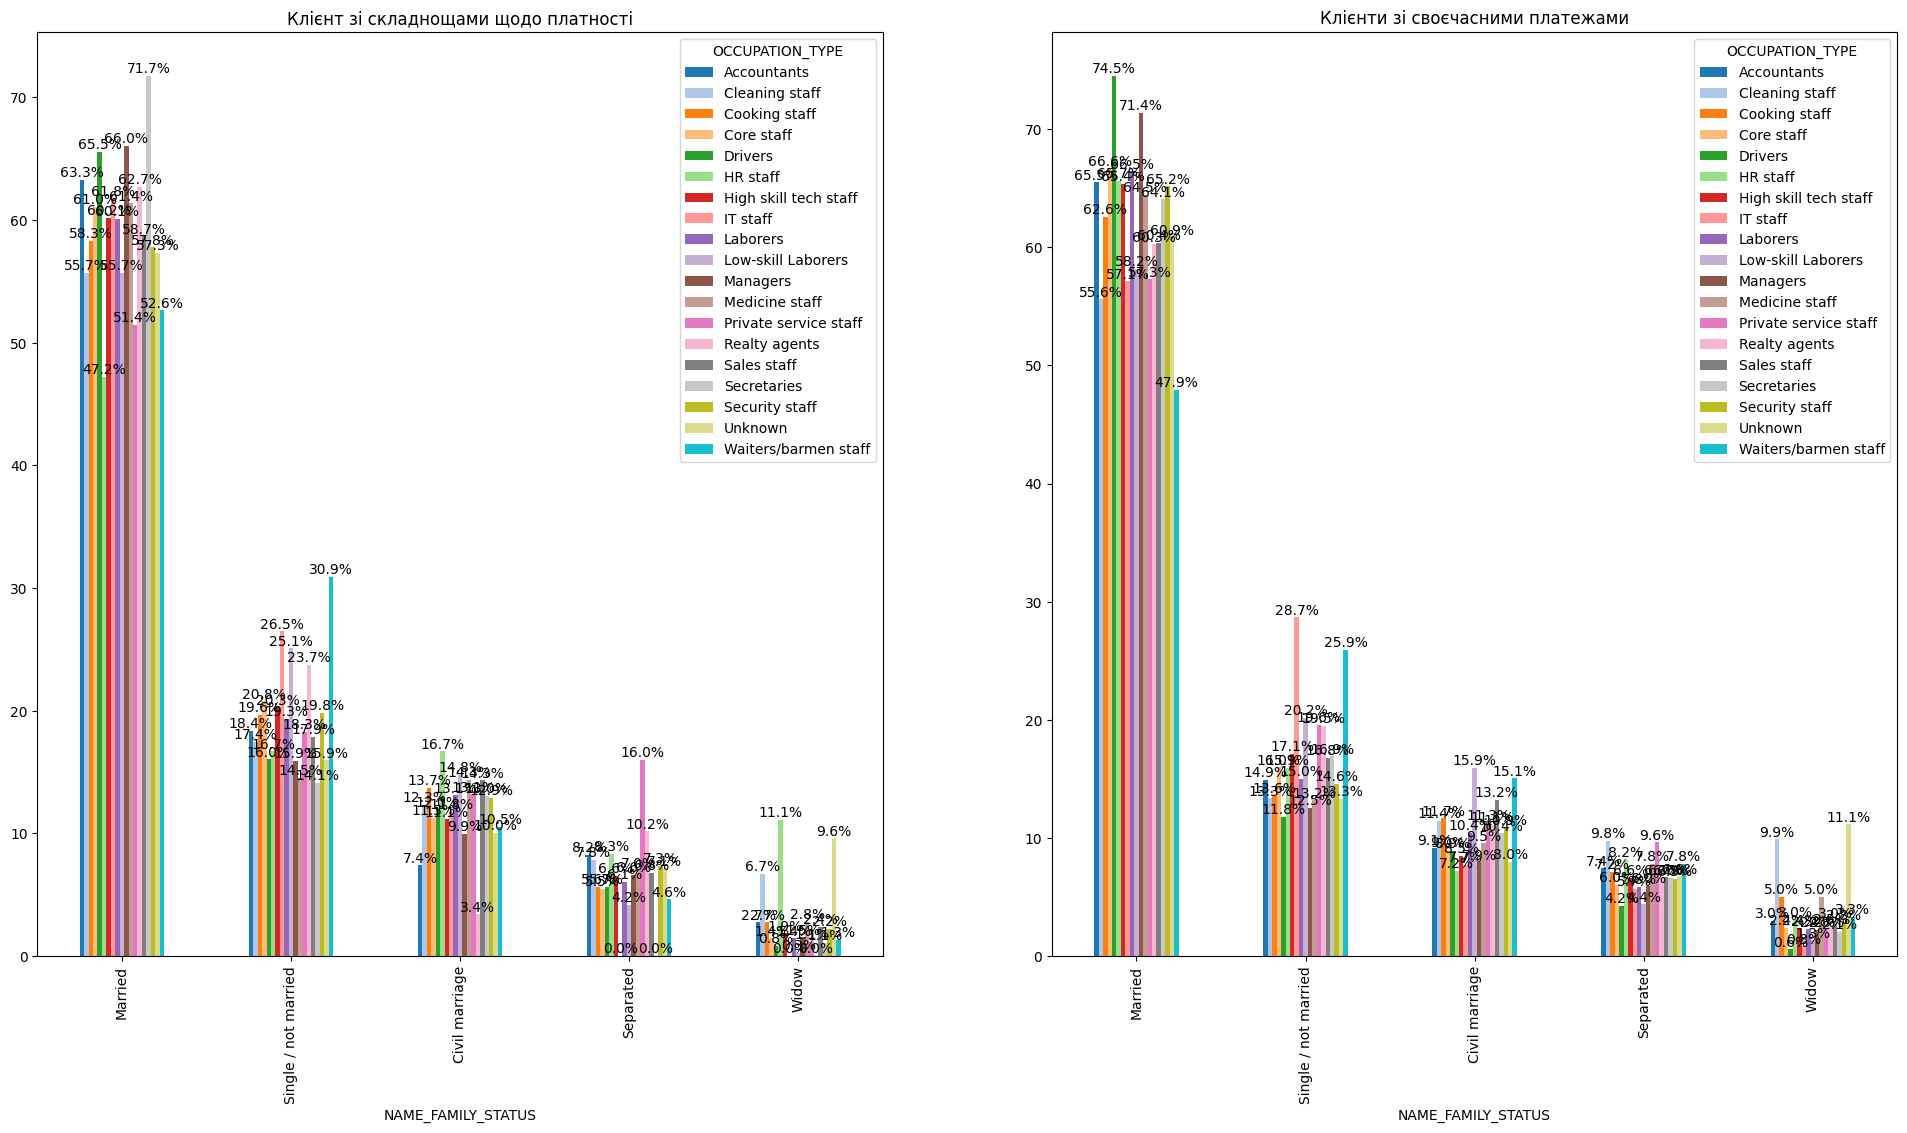

КІЛЬКІСТЬ ЗНАЧЕНЬ ЗА КАТЕГОРІЄЮ: NAME_FAMILY_STATUS


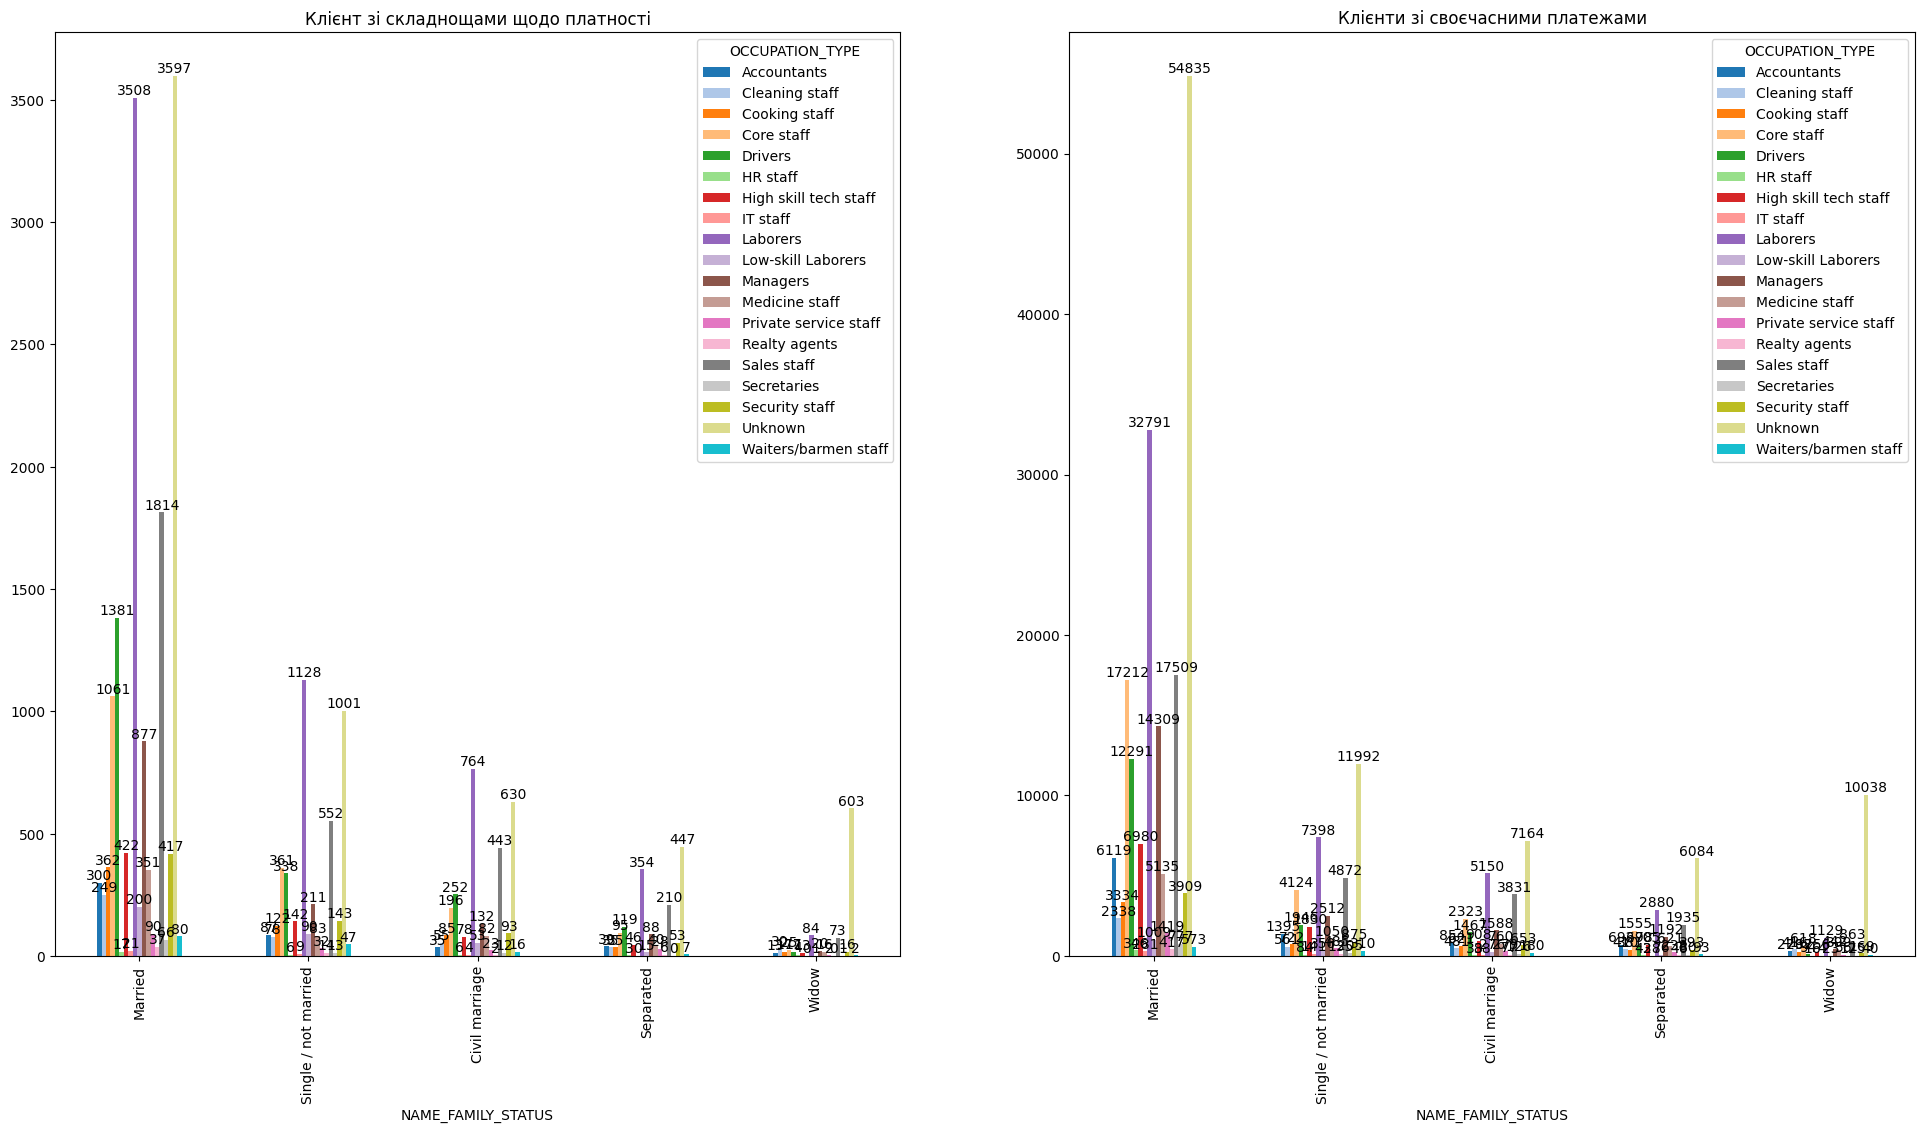

In [344]:
bi_countplot_target_updated(df0, df1, 'NAME_FAMILY_STATUS','OCCUPATION_TYPE');

Спостереження:
- найбільше проблем з виплатою кредитів мають одружені люди.
- серед одружених людей з професією секретар відсотково більше клієнтів, які не виплачують кредит, ніж тих, хто вчасно платить.
- відсоток одружених водіїв та менеджерів, що виплачують кредит вчасно, більше ніж тих, хто не виплачує серед таких категорій.
- відсоток самотніх офіціантів що не виплачують кредит більше ніж серед тих, що виплачуюють
- відсоток розведених приватних сервісних працівників, які не виплачуюють кредит вчасно більше, ніж тих які виплачуюють.
- відсоток вдів та вдовців з професією HR що не виплачують вчасно кредит більше ніж тих,які виплачують.

**Аналіз OCCUPATION_TYPE vs NAME_CONTRACT_TYPE**

НОРМАЛІЗОВАНИЙ РОЗПОДІЛ ЗНАЧЕНЬ ЗА КАТЕГОРІЄЮ: OCCUPATION_TYPE


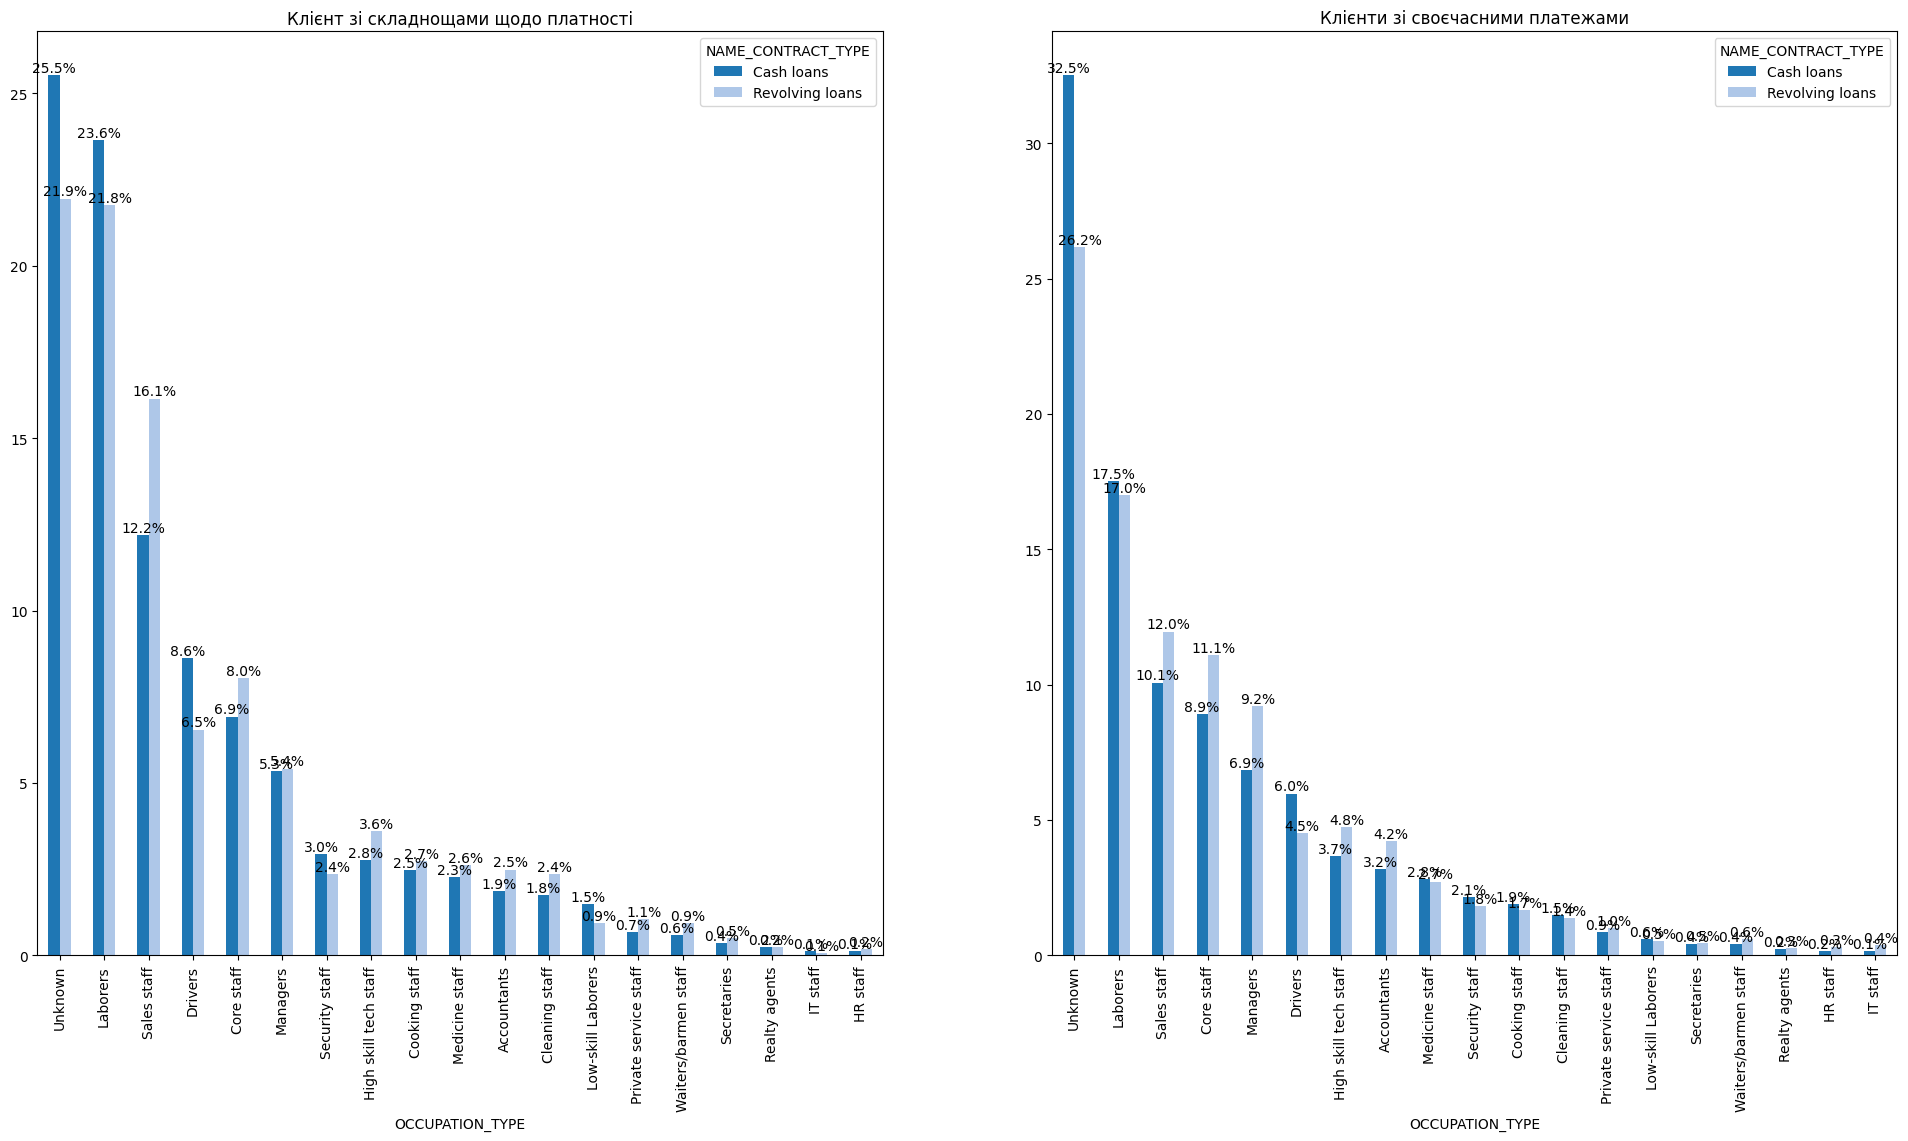

КІЛЬКІСТЬ ЗНАЧЕНЬ ЗА КАТЕГОРІЄЮ: OCCUPATION_TYPE


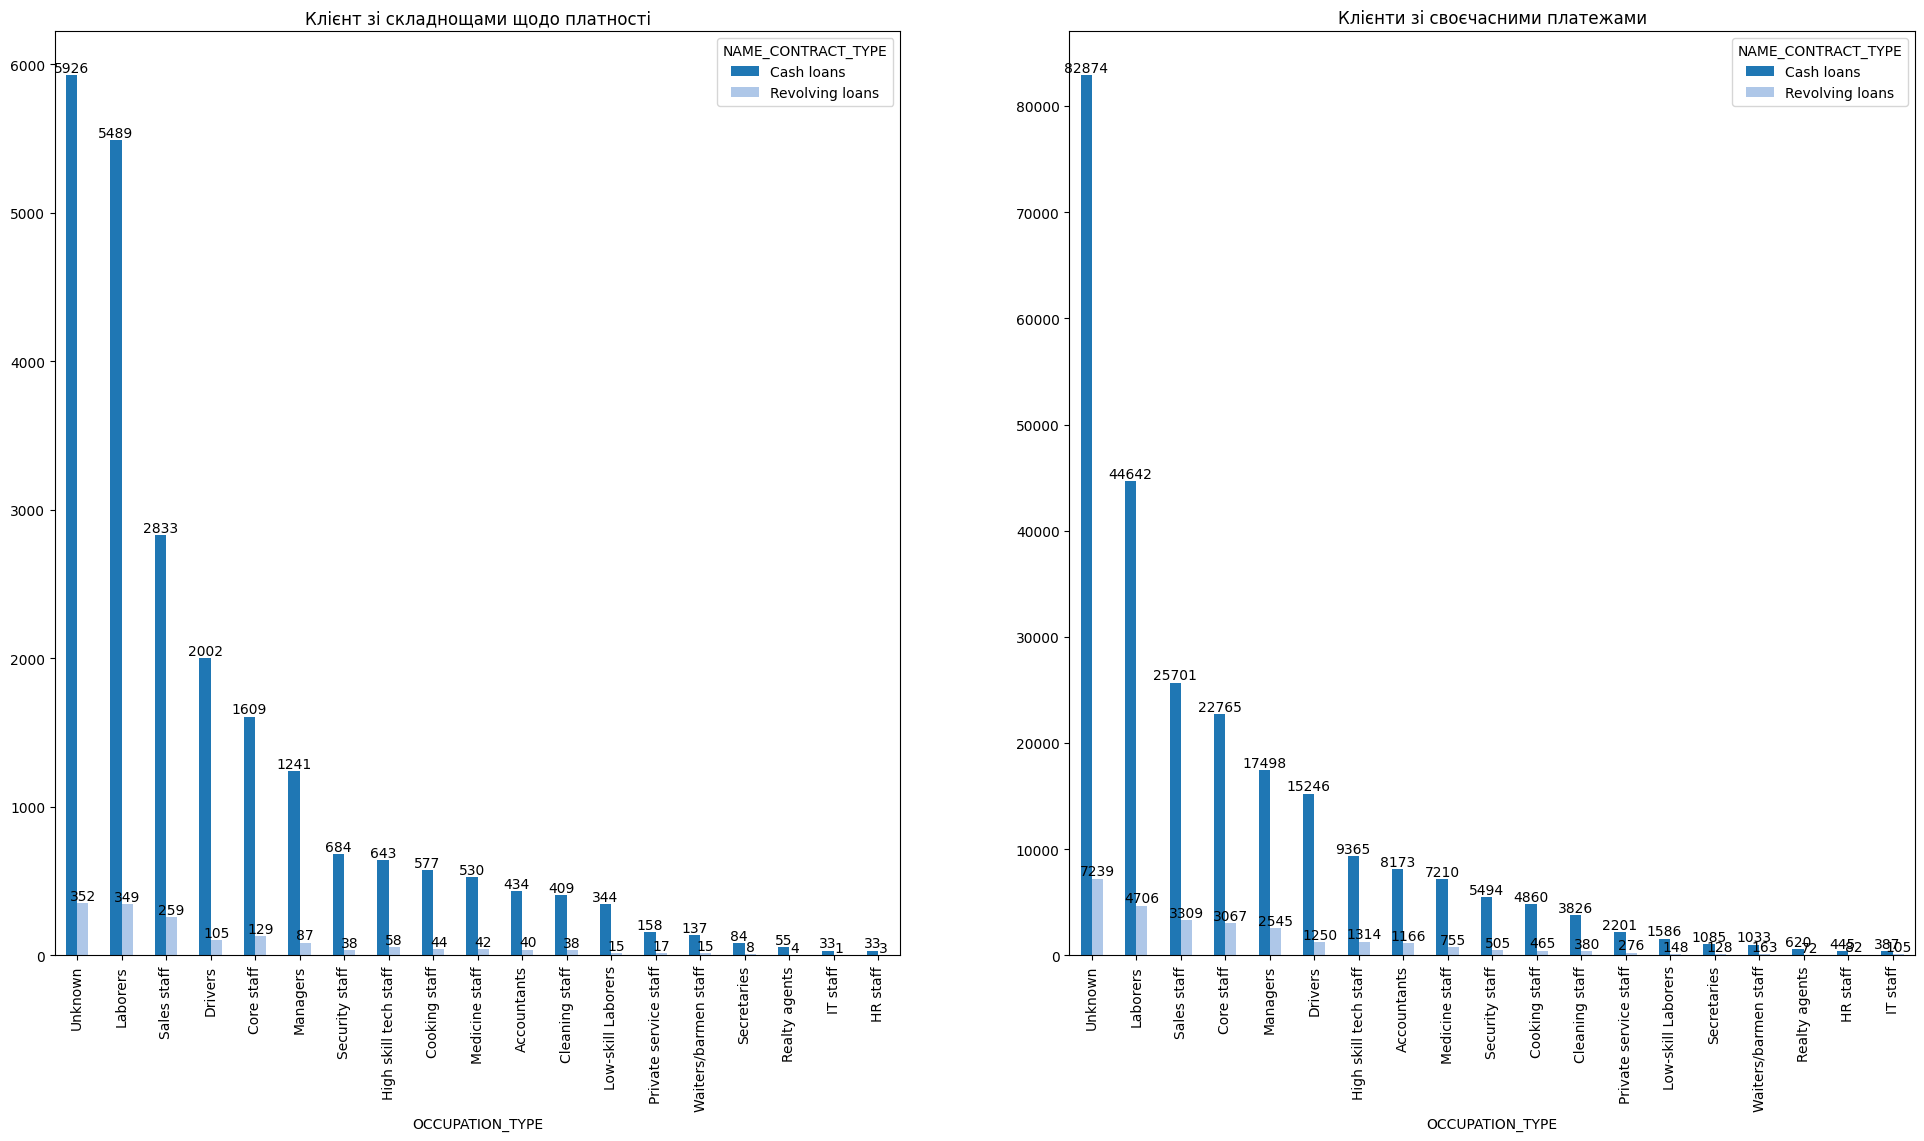

In [345]:
bi_countplot_target_updated(df0, df1, 'OCCUPATION_TYPE','NAME_CONTRACT_TYPE');

- найбільший відсоток клієнтів, що мають проблеми з виплатою кредиту є люди з невідомою професією
- клієнтів з категорією робітники, що не виплачують вчасно кредит, та видом кредиту cash loans, більше ніж серед таких робітників,які виплачують кредит вчасно.
- серед клієнтів що невчасно виплачуюють кредит,мають професію sales staff та вид кредиту revolving loans значно більше ніж серед тих,які сплачуують кредит вчасно.

***
# ДЗ 9. Висновок з проведеного аналізу
Напишіть Ваш висновок з проведеного ананлізу, яким категоріям осіб Ви б видали кредит? Категорія може бути, наприклад, люди з такою-то освітою, з таким-то доходом, з таким-то досвідом роботи.

# Висновок: Категорії клієнтів, на яких слід орієнтуватися при наданні кредиту


- клієнти,які беруть кредит на суму більшу  750000
- клієнти віком від 42 до 70 років
- клієнти які працевлаштовані більше ніж 2100 днів ( 5.7 років)
- клієнти з академічним ступенем та вищою освітою
- розведені,одружені чоловіки та чоловіки в декреті
- клієнти бізнесмени або студенти
- одружені водії та менеджери
- чоловіки пенсіонери
- клієнти у віці 50-60, що проживають з батьками або орендують житло
- клієнти у віці 20-30 років, що мешкають в офісних приміщеннях та муніципальних будинках
- клієнти у віці 30-40, що мешкають в офісних апартаментах
